In [2]:
import pdb
import autograd.numpy as np
import matplotlib.pyplot as plt
import size_contrast_analysis as sca
import pyute as ut
import scipy.optimize as sop
import sim_utils
from autograd import grad
import scipy.stats as sst
import opto_utils
from importlib import reload
import naka_rushton_analysis as nra
reload(ut)
reload(opto_utils)
%matplotlib notebook


/Users/dan/Documents/code/downloads/OASIS/oasis/functions.py:14: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


In [33]:
# npyfile = np.load('../shared_data/calnet_data/vip_halo_data_for_sim.npy',allow_pickle=True)[()]
npyfile = np.load('../shared_data/calnet_data/vip_halo_data_for_sim_vip_full_info.npy',allow_pickle=True)[()]
Yhat_halo_orig = npyfile['Yhat_orig']
Yhat_halo = npyfile['Yhat_opto']
scall_halo = npyfile['scallanimal_aligned']
scvip_halo = npyfile['scvipanimal']
Yhat_halo = Yhat_halo/np.nanmax(Yhat_halo[0::2],0)[np.newaxis,:]

npyfile = np.load('../shared_data/calnet_data/vip_chrimson_data_for_sim.npy',allow_pickle=True)[()]
Yhat_chrimson_orig = npyfile['Yhat_orig']
Yhat_chrimson = npyfile['Yhat_opto']
scall_chrimson = npyfile['scallanimal_aligned']
scvip_chrimson = npyfile['scvipanimal']
Yhat_chrimson = Yhat_chrimson/np.nanmax(Yhat_chrimson[0::2],0)[np.newaxis,:]

npyfile = np.load('../shared_data/calnet_data/vip_chrimson_l4_data.npy',allow_pickle=True)[()]
scall_chrimson_l4 = npyfile['scallanimal_aligned']

matfile = '/Users/dan/Documents/data/julia/VIPHaloSizeContNoInterpLayer.mat'
rrs_orig_layer,rfs_orig_layer = ut.loadmat(matfile,['rrs','rfs'])
# scall_halo_l4 = opto_utils.norm_to_mean_light_off(rrs_orig_layer[0,0])
scall_halo_l4 = rrs_orig_layer[0,0]

matfile = '/Users/dan/Documents/data/julia/VIPHaloSizeContNoInterpLayer.mat'
rrs_orig_layer,rfs_orig_layer = ut.loadmat(matfile,['rrs','rfs'])
scall_halo_run = opto_utils.norm_to_mean_light_off(rrs_orig_layer[1,1])

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: All-NaN slice encountered
  return f_raw(*args, **kwargs)
/Users/dan/Documents/code/adesnal/opto_utils.py:198: RuntimeWarning: Mean of empty slice
  mean_light_off = np.nanmean(mean_light_off,1)


In [4]:
scall_chrimson_l4.shape

(2, 4, 6, 8, 2)

In [5]:
# YY_opto = np.load('../shared_data/opto_sim_data.npy',allow_pickle=True)[()]['YY_opto']
YY_opto = np.load('../shared_data/vip_opto_sim_data_unconstrained_by_opto.npy',allow_pickle=True)[()]['YY_opto']

In [6]:
ilight_halo = 5
ilight_chrimson = 15
ilight_off = 10

scall_halo_sim = YY_opto[:,[ilight_off,ilight_halo]][:,:,:,:,0].transpose((0,2,3,1))
scall_chrimson_sim = YY_opto[:,[ilight_off,ilight_chrimson]][:,:,:,:,0].transpose((0,2,3,1))
scvip_halo_sim = YY_opto[:,[ilight_off,ilight_halo]][:,:,:,:,2].transpose((0,2,3,1))
scvip_chrimson_sim = YY_opto[:,[ilight_off,ilight_chrimson]][:,:,:,:,2].transpose((0,2,3,1))

scall_halo_sim = opto_utils.norm_to_mean_light_off(scall_halo_sim)
scall_chrimson_sim = opto_utils.norm_to_mean_light_off(scall_chrimson_sim)
scvip_halo_sim = opto_utils.norm_to_mean_light_off(scvip_halo_sim)
scvip_chrimson_sim = opto_utils.norm_to_mean_light_off(scvip_chrimson_sim)

<IPython.core.display.Javascript object>


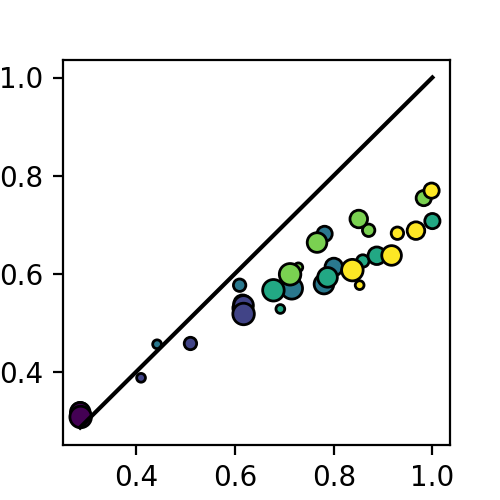

<IPython.core.display.Javascript object>


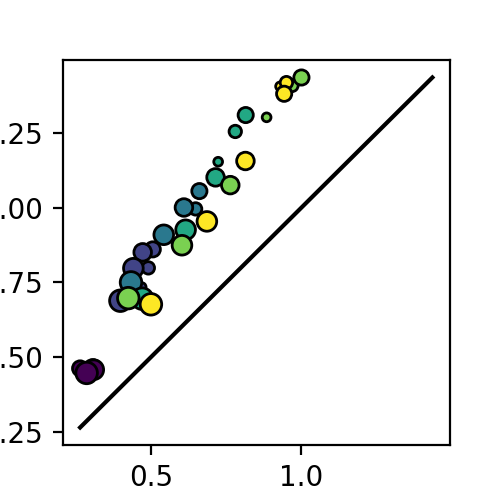

<IPython.core.display.Javascript object>


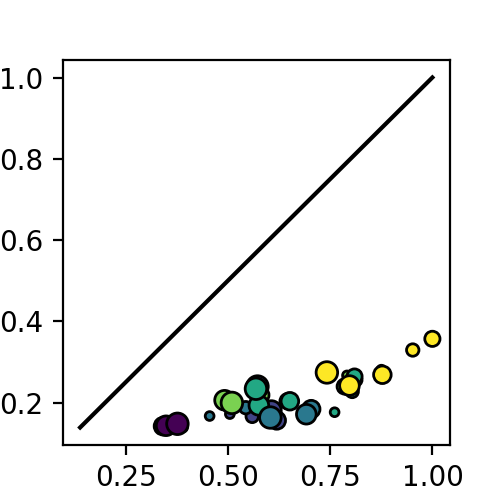

<IPython.core.display.Javascript object>


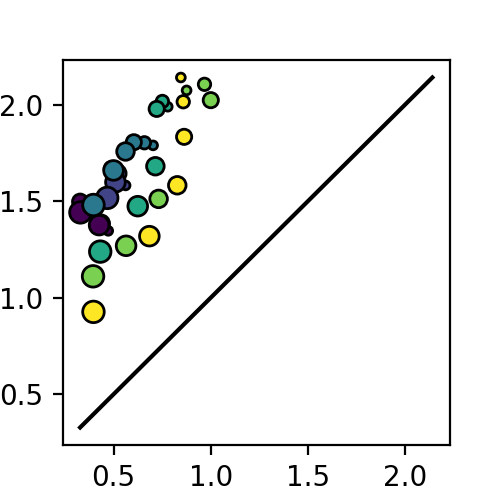

In [15]:
for itype in [0,2]:
    plt.figure(figsize=(2.5,2.5))
    sca.scatter_size_contrast(Yhat_halo[0::2,itype],Yhat_halo[1::2,itype],nsize=6,ncontrast=6)
    plt.figure(figsize=(2.5,2.5))
    sca.scatter_size_contrast(Yhat_chrimson[0::2,itype],Yhat_chrimson[1::2,itype],nsize=6,ncontrast=6)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


<IPython.core.display.Javascript object>


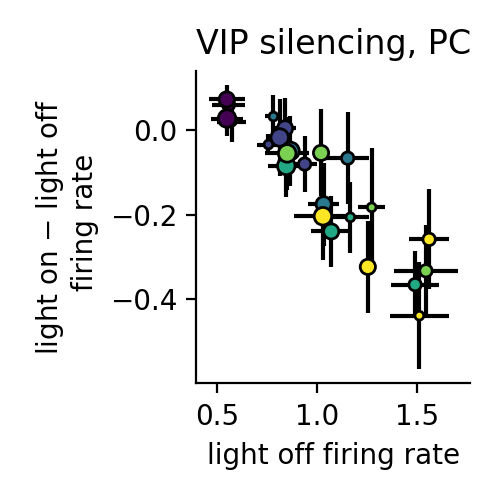

<IPython.core.display.Javascript object>


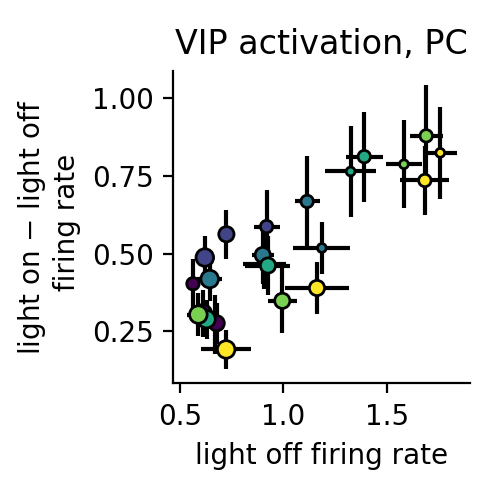

<IPython.core.display.Javascript object>


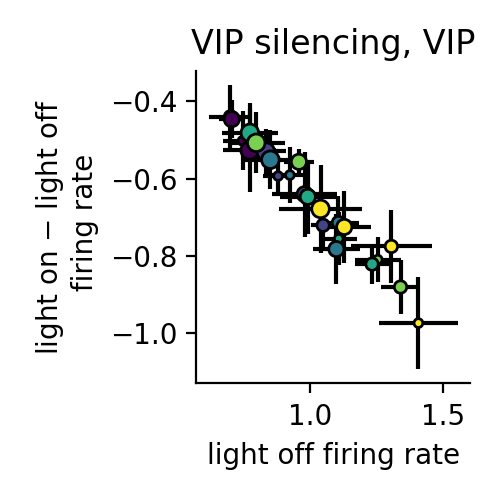

<IPython.core.display.Javascript object>


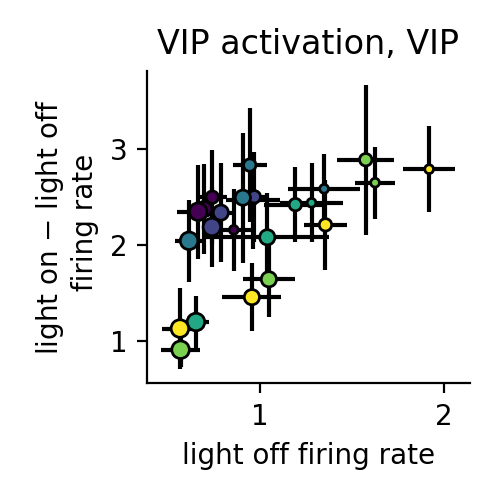

In [16]:
# for data in [np.nanmean(scall_halo,3),np.nanmean(scall_chrimson,3)]:
#     plt.figure(figsize=(2.5,2.5))
#     dif = data[:,:,:,1]-data[:,:,:,0]
#     mn = np.nanmean(dif)
#     sca.scatter_size_contrast_errorbar(data[:,:,:,0],dif,nsize=4,ncontrast=6,equality_line=False,square=False)
#     plt.title('PC')
#     plt.tight_layout()

# for data in [scvip_halo,np.nanmean(scvip_chrimson,3)]:
#     plt.figure(figsize=(2.5,2.5))
#     dif = data[:,:,:,1]-data[:,:,:,0]
#     mn = np.nanmean(dif)
#     sca.scatter_size_contrast_errorbar(data[:,:,:,0],dif,nsize=4,ncontrast=6,equality_line=False,square=False)
#     plt.title('VIP')
#     plt.tight_layout()
    
titles = ['VIP silencing, PC','VIP activation, PC','VIP silencing, VIP','VIP activation, VIP']
filenames = ['figures/exptl_vip_halo_pc_delta.eps','figures/exptl_vip_chrimson_pc_delta.eps',\
             'figures/exptl_vip_halo_vip_delta.eps','figures/exptl_vip_chrimson_vip_delta.eps']
for idata,data in enumerate([np.nanmean(scall_halo,3),np.nanmean(scall_chrimson,3),scvip_halo,np.nanmean(scvip_chrimson,3)]):
    plt.figure(figsize=(2.5,2.5))
    dif = data[:,:,:,1]-data[:,:,:,0]
#     mn = np.nanmean(dif)
    sca.scatter_size_contrast_errorbar(data[:,:,:,0],dif,nsize=6,ncontrast=6,equality_line=False,square=False)
    plt.title(titles[idata])
    plt.xlabel('light off firing rate')
    plt.ylabel('light on $-$ light off \n firing rate')
    ut.erase_top_right()
    plt.tight_layout()
#     plt.savefig(filenames[idata])

<IPython.core.display.Javascript object>


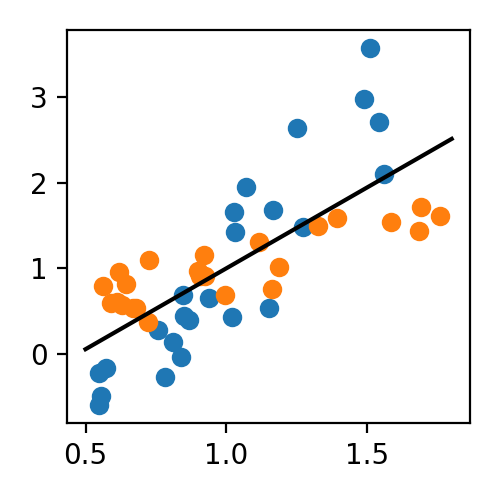

In [17]:
bls = np.zeros((0,4,6))
difs = np.zeros((0,4,6))
mns = np.zeros((0,))
plt.figure(figsize=(2.5,2.5))
for data in [np.nanmean(scall_halo,3),np.nanmean(scall_chrimson,3)]:
    dif = data[:,:,:,1]-data[:,:,:,0]
    mn = np.nanmean(dif)
    plt.scatter(np.nanmean(data[:,:,:,0],0),np.nanmean(dif,0)/mn)
    plt.tight_layout()
    bls = np.concatenate((bls,np.nanmean(data[:,:,:,0],0)[np.newaxis]),axis=0)
    difs = np.concatenate((difs,np.nanmean(dif,0)[np.newaxis]/mn),axis=0)
    mns = np.concatenate((mns,mn[np.newaxis]))
slope,intercept,_,_,_ = sst.linregress(bls.flatten(),difs.flatten())
x = np.array((0.5,1.8))
plt.plot(x,slope*x+intercept,c='k')
alpha_bidi = 1 + slope
x0_bidi = -intercept/slope
ihalo = 0
ichrimson = 1

<IPython.core.display.Javascript object>


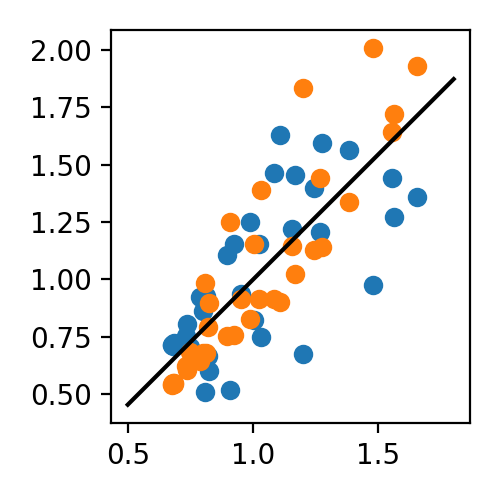

In [18]:
bls_sim = np.zeros((0,6,6))
difs_sim = np.zeros((0,6,6))
mns_sim = np.zeros((0,))
plt.figure(figsize=(2.5,2.5))
for data in [scall_halo_sim,scall_chrimson_sim]:
    dif = data[:,:,:,1]-data[:,:,:,0]
    mn = np.nanmean(dif)
    plt.scatter(np.nanmean(data[:,:,:,0],0),np.nanmean(dif,0)/mn)
    plt.tight_layout()
    bls_sim = np.concatenate((bls_sim,np.nanmean(data[:,:,:,0],0)[np.newaxis]),axis=0)
    difs_sim = np.concatenate((difs_sim,np.nanmean(dif,0)[np.newaxis]/mn),axis=0)
    mns_sim = np.concatenate((mns_sim,mn[np.newaxis]))
slope,intercept,_,_,_ = sst.linregress(bls_sim.flatten(),difs_sim.flatten())
x = np.array((0.5,1.8))
plt.plot(x,slope*x+intercept,c='k')
alpha_bidi_sim = 1 + slope
x0_bidi_sim = -intercept/slope
ihalo = 0
ichrimson = 1

In [4]:
scall_halo_sim.shape

NameError: name 'scall_halo_sim' is not defined

<IPython.core.display.Javascript object>


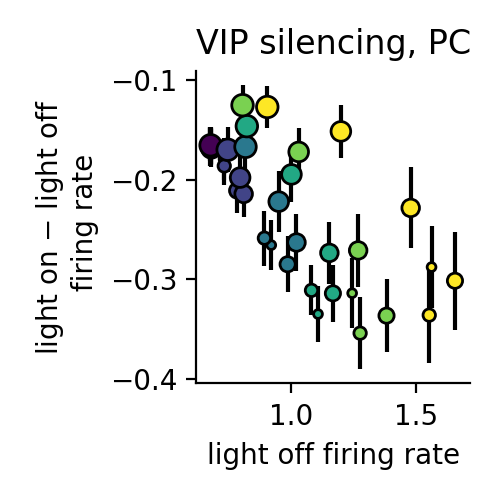

<IPython.core.display.Javascript object>


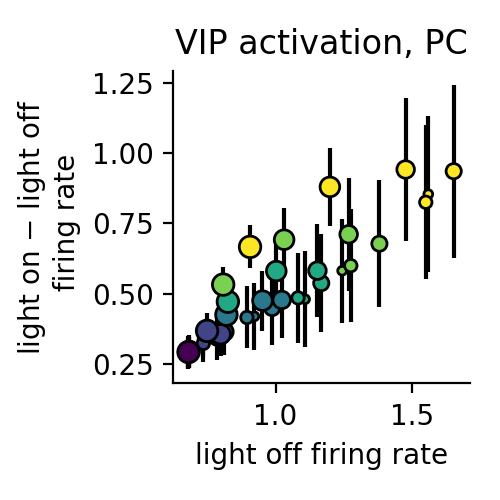

<IPython.core.display.Javascript object>


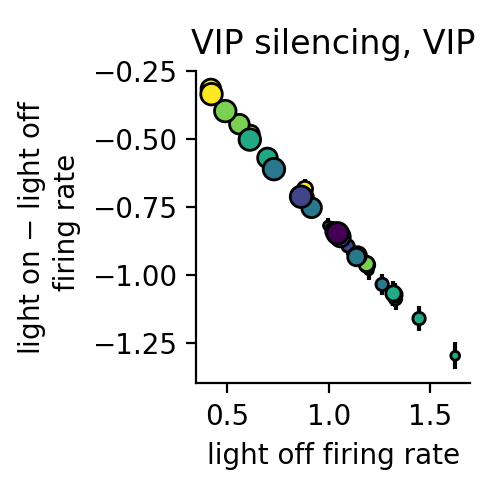

<IPython.core.display.Javascript object>


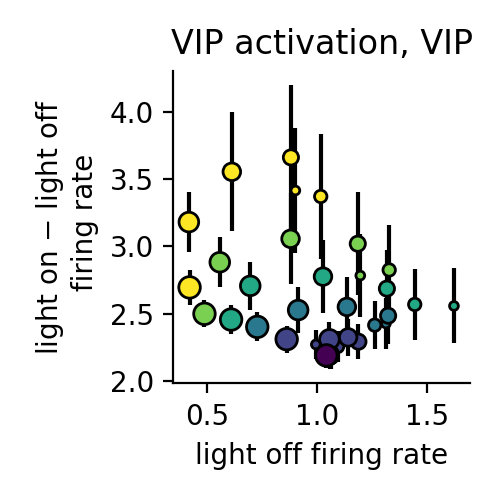

In [19]:
lkat = [3,4,5,10,12,23]#slice(None)#
titles = ['VIP silencing, PC','VIP activation, PC','VIP silencing, VIP','VIP activation, VIP']
filenames = ['figures/sim_vip_halo_pc_delta.eps','figures/sim_vip_chrimson_pc_delta.eps',\
             'figures/sim_vip_halo_vip_delta.eps','figures/sim_vip_chrimson_vip_delta.eps']
for idata,data in enumerate([scall_halo_sim,scall_chrimson_sim,scvip_halo_sim,scvip_chrimson_sim]):
    plt.figure(figsize=(2.5,2.5))
    dif = data[lkat][:,:,:,1]-data[lkat][:,:,:,0]
#     mn = np.nanmean(dif)
    sca.scatter_size_contrast_errorbar(data[:,:,:,0],dif,nsize=6,ncontrast=6,equality_line=False,square=False)
    plt.title(titles[idata])
    plt.xlabel('light off firing rate')
    plt.ylabel('light on $-$ light off \n firing rate')
    ut.erase_top_right()
    plt.tight_layout()
#     plt.savefig(filenames[idata])

In [124]:
# lkat = slice(None)#[3,4,5,10,12,23]#slice(None)#
# for data in [scall_halo_sim[lkat],scall_chrimson_sim[lkat]]:
#     plt.figure(figsize=(10,8.3))
#     dif = data[:,:,:,1]-data[:,:,:,0]
# #     mn = np.nanmean(dif)
#     nfits = data.shape[0]
#     for ifit in range(nfits):
#         plt.subplot(5,6,ifit+1)
#         sca.scatter_size_contrast(data[ifit,:,:,0],dif[ifit],nsize=6,ncontrast=6,equality_line=False,square=False)    
#         plt.title('PC')
#     plt.tight_layout()

# for data in [scvip_halo_sim[lkat],scvip_chrimson_sim[lkat]]:
#     plt.figure(figsize=(10,8.3))
#     dif = data[:,:,:,1]-data[:,:,:,0]
# #     mn = np.nanmean(dif)
#     nfits = data.shape[0]
#     for ifit in range(nfits):
#         plt.subplot(5,6,ifit+1)
#         sca.scatter_size_contrast(data[ifit,:,:,0],dif[ifit],nsize=6,ncontrast=6,equality_line=False,square=False)
#         plt.title('VIP')
#     plt.tight_layout()

In [239]:
scall_halo_sim.shape

(98, 6, 6, 2)

In [218]:
dYY_halo = Yhat_halo[1::2]-Yhat_halo[0::2]
dYY_chrimson = Yhat_chrimson[1::2]-Yhat_chrimson[0::2]

In [21]:
YY_halo_orig,YY_halo_orth = [Yhat_halo_orig[0][0][iangle] for iangle in range(2)]
dYY_halo_orig = YY_halo_orig[:,:,:,1]-YY_halo_orig[:,:,:,0]
YY_chrimson_orig,YY_chrimson_orth = [Yhat_chrimson_orig[0][0][iangle] for iangle in range(2)]
dYY_chrimson_orig = YY_chrimson_orig[:,:,:,1]-YY_chrimson_orig[:,:,:,0]

<IPython.core.display.Javascript object>


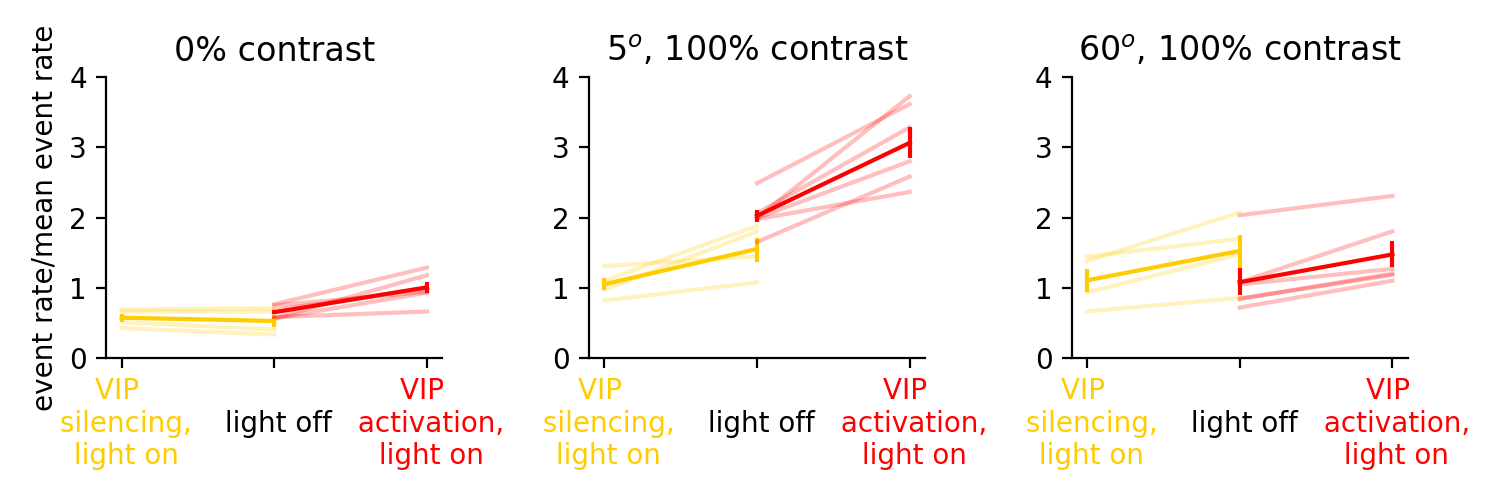

chrimson: WilcoxonResult(statistic=0.0, pvalue=0.03125)
halo: WilcoxonResult(statistic=2.0, pvalue=0.09375)
comparison: MannwhitneyuResult(statistic=14.0, pvalue=0.28758676596009836)
chrimson: WilcoxonResult(statistic=0.0, pvalue=0.03125)
halo: WilcoxonResult(statistic=0.0, pvalue=1.0)
comparison: MannwhitneyuResult(statistic=12.0, pvalue=0.18923879662233944)
chrimson: WilcoxonResult(statistic=0.0, pvalue=0.03125)
halo: WilcoxonResult(statistic=0.0, pvalue=1.0)
comparison: MannwhitneyuResult(statistic=12.0, pvalue=0.18923879662233944)


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


In [22]:
alpha = 0.25

halo_color = np.array((1,0.8,0))
chrimson_color = 'r'

def plot_bars_and_lines(xdata,ydata,alpha=alpha,c='k'):
    plt.plot(xdata,ydata.T,c=c,alpha=alpha)
    lb,ub,mn = ut.bootstrap(ydata,axis=0,pct=(16,84,50),fn=np.nanmean)
    yerr = np.concatenate(((mn-lb)[np.newaxis],(ub-mn)[np.newaxis]),axis=0)
    plt.errorbar(xdata,mn,yerr=yerr,c=c)
    
def opto_bidi_xticks(): 
    plt.xticks((-1,0,1),('VIP \n silencing,\n light on','\n light off','VIP \n activation,\n light on'))
    colors = [halo_color,'k',chrimson_color]
    for xtick, color in zip(plt.gca().get_xticklabels(), colors):
        xtick.set_color(color)
    
ylim = (0,4)

plt.figure(figsize=(7.5,2.5))
plt.subplot(1,3,1)
data = np.nanmean(YY_chrimson_orig[:,:,0],1)
plot_bars_and_lines((0,1),data,c=chrimson_color)
diff_chrimson = data[:,1]-data[:,0]
print('chrimson: '+str(sst.wilcoxon(data[:,0],data[:,1])))
data = np.nanmean(YY_halo_orig[:,:,0],1)
plot_bars_and_lines((0,-1),data,c=halo_color)
diff_halo = data[:,1]-data[:,0]
print('halo: '+str(sst.wilcoxon(data[:,0],data[:,1])))
print('comparison: '+str(sst.mannwhitneyu(diff_chrimson,diff_halo)))
plt.ylim(ylim)
plt.ylabel('event rate/mean event rate')
plt.title(r'0% contrast')
opto_bidi_xticks()
ut.erase_top_right()

ijs = [[0,-1],[-1,-1]]
titles = [r'5$^o$, 100% contrast',r'60$^o$, 100% contrast']

for iij,ij in enumerate(ijs):
    i,j = ij
    plt.subplot(1,3,iij+2)
    # plt.figure(figsize=(2.5,2.5))
    data = YY_chrimson_orig[:,i,j]
    plot_bars_and_lines((0,1),data,c=chrimson_color)
    diff_chrimson = data[:,1]-data[:,0]
    print('chrimson: '+str(sst.wilcoxon(data[:,0],data[:,1])))
    data = YY_halo_orig[:,i,j]
    plot_bars_and_lines((0,-1),data,c=halo_color)
    diff_halo = data[:,1]-data[:,0]
    print('halo: '+str(sst.wilcoxon(data[:,0],data[:,1])))
    print('comparison: '+str(sst.mannwhitneyu(diff_chrimson,diff_halo)))
    plt.ylim(ylim)
    plt.title(titles[iij])
    opto_bidi_xticks()
    ut.erase_top_right()
plt.tight_layout()
# plt.savefig('figures/vip_bidi_3_example_plots.jpg',dpi=300)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


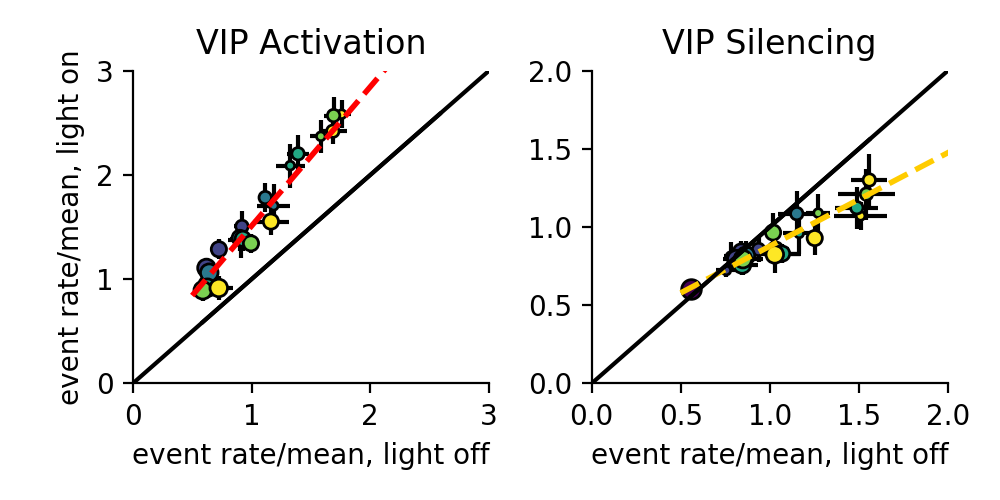

In [119]:
slope = np.zeros((2,))
intercept = np.zeros((2,))
plt.figure(figsize=(5,2.5))
idata = 1
plt.subplot(1,2,idata+1)
xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([YY_halo_orth,YY_halo_orig],[plt.cm.viridis,plt.cm.plasma]):
for data,colormap in zip([np.nanmean(scall_halo,3)],[plt.cm.viridis]):
    sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1],equate_0=True,colormap=colormap)
    lkat = ~np.isnan(data.sum(1).sum(1).sum(1))
    xdata = np.concatenate((xdata,data[lkat,:,:,0].flatten()))
    ydata = np.concatenate((ydata,data[lkat,:,:,1].flatten()))
slope[idata], intercept[idata], r_value, p_value, std_err = sst.linregress(xdata,ydata)
def lin_transform(x):
    return slope[idata]*x+intercept[idata]
plt.plot(np.linspace(0.5,3,100),lin_transform(np.linspace(0.5,3,100)),c=np.array((1,0.8,0)),linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[1]),c='m',linewidth=3,linestyle='dashed')
ut.erase_top_right()
plt.xlabel('event rate/mean, light off')
plt.title('VIP Silencing')
lim = (0,2)
plt.plot(lim,lim,c='k')
plt.xlim(lim)
plt.ylim(lim)
idata = 0
plt.subplot(1,2,idata+1)
xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([YY_chrimson_orth,YY_chrimson_orig],[plt.cm.viridis,plt.cm.plasma]):
for data,colormap in zip([np.nanmean(scall_chrimson,3)],[plt.cm.viridis]):
    sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1],equate_0=True,colormap=colormap)
    lkat = ~np.isnan(data.sum(1).sum(1).sum(1))
    xdata = np.concatenate((xdata,data[lkat,:,:,0].flatten()))
    ydata = np.concatenate((ydata,data[lkat,:,:,1].flatten()))
slope[idata], intercept[idata], r_value, p_value, std_err = sst.linregress(xdata,ydata)
def lin_transform(x):
    return slope[idata]*x+intercept[idata]
plt.plot(np.linspace(0.5,3,100),lin_transform(np.linspace(0.5,3,100)),c='r',linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[0]),c='m',linewidth=3,linestyle='dashed')
ut.erase_top_right()
plt.xlabel('event rate/mean, light off')
plt.ylabel('event rate/mean, light on')
plt.title('VIP Activation')
lim = (0,3)

plt.plot(lim,lim,c='k')
plt.xlim(lim)
plt.ylim(lim)
plt.tight_layout()
# plt.savefig('figures/vip_opto_angle_light_on_light_off_scatter_errorbar_linear_fit.eps')

<IPython.core.display.Javascript object>


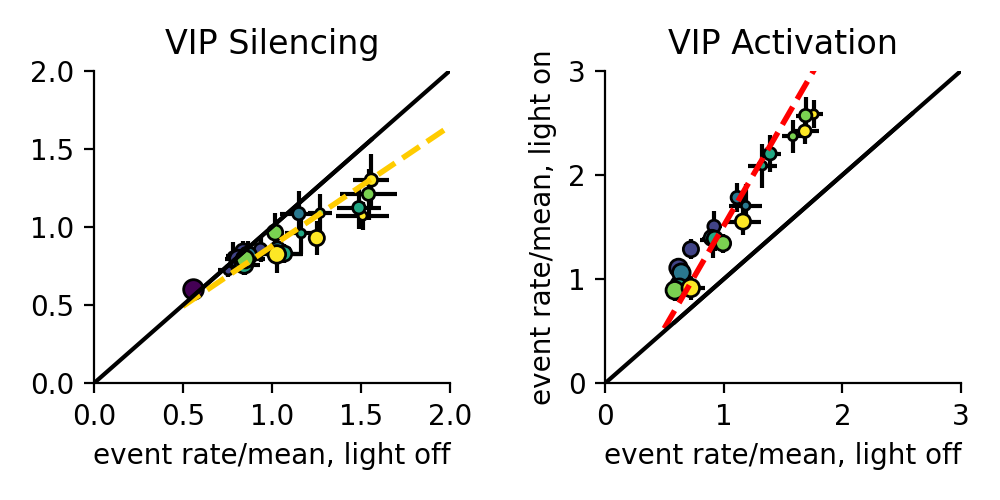

In [24]:
plt.figure(figsize=(5,2.5))

idata = 0
plt.subplot(1,2,idata+1)
xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([YY_halo_orth,YY_halo_orig],[plt.cm.viridis,plt.cm.plasma]):
for data,colormap in zip([np.nanmean(scall_halo,3)],[plt.cm.viridis]):
    sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1],equate_0=True,colormap=colormap)
    lkat = ~np.isnan(data.sum(1).sum(1).sum(1))
    xdata = np.concatenate((xdata,data[lkat,:,:,0].flatten()))
    ydata = np.concatenate((ydata,data[lkat,:,:,1].flatten()))
# slope[idata], intercept[idata], r_value, p_value, std_err = sst.linregress(xdata,ydata)
def lin_transform_halo(x):
    return x + mns[ihalo]*(alpha_bidi-1)*(x-x0_bidi)#slope[idata]*x+intercept[idata]
plt.plot(np.linspace(0.5,3,100),lin_transform_halo(np.linspace(0.5,3,100)),c=np.array((1,0.8,0)),linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[1]),c='m',linewidth=3,linestyle='dashed')
ut.erase_top_right()
plt.xlabel('event rate/mean, light off')
plt.title('VIP Silencing')
lim = (0,2)
plt.plot(lim,lim,c='k')
plt.xlim(lim)
plt.ylim(lim)

idata = 1
plt.subplot(1,2,idata+1)
xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([YY_chrimson_orth,YY_chrimson_orig],[plt.cm.viridis,plt.cm.plasma]):
for data,colormap in zip([np.nanmean(scall_chrimson,3)],[plt.cm.viridis]):
    sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1],equate_0=True,colormap=colormap)
    lkat = ~np.isnan(data.sum(1).sum(1).sum(1))
    xdata = np.concatenate((xdata,data[lkat,:,:,0].flatten()))
    ydata = np.concatenate((ydata,data[lkat,:,:,1].flatten()))
# slope[idata], intercept[idata], r_value, p_value, std_err = sst.linregress(xdata,ydata)
def lin_transform_chrimson(x):
    return x + mns[ichrimson]*(alpha_bidi-1)*(x-x0_bidi)#slope[idata]*x+intercept[idata]
plt.plot(np.linspace(0.5,3,100),lin_transform_chrimson(np.linspace(0.5,3,100)),c='r',linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[0]),c='m',linewidth=3,linestyle='dashed')
ut.erase_top_right()
plt.xlabel('event rate/mean, light off')
plt.ylabel('event rate/mean, light on')
plt.title('VIP Activation')
lim = (0,3)

plt.plot(lim,lim,c='k')
plt.xlim(lim)
plt.ylim(lim)
plt.tight_layout()
# plt.savefig('figures/vip_opto_angle_light_on_light_off_scatter_errorbar_linear_fit.eps')

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


<IPython.core.display.Javascript object>


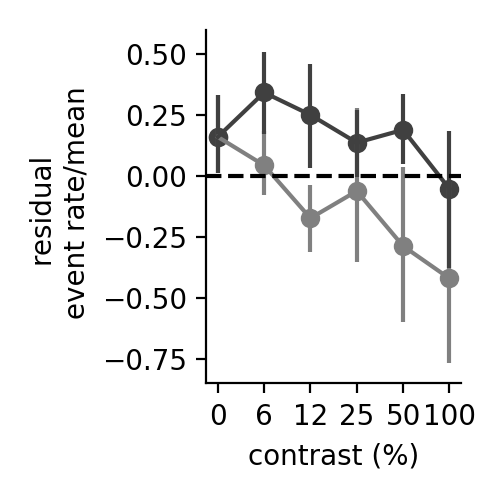

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.17232780560768518
linewidth: 1
plotting
linewidth: 1
plotting


<IPython.core.display.Javascript object>


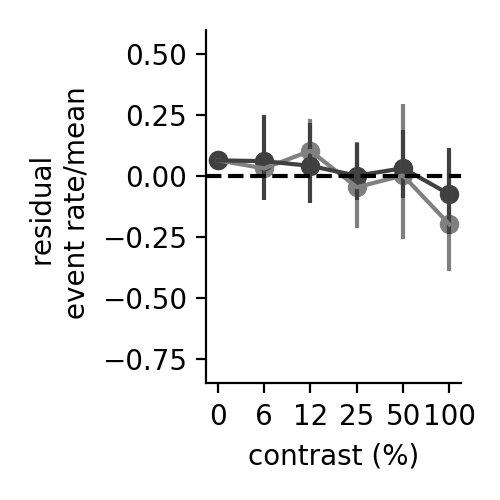

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)
/Users/dan/Documents/code/adesnal/pyute.py:140: RuntimeWarning: Mean of empty slice
  stat = fn(resamp,axis=axis)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.04733198815290315
linewidth: 1
plotting
linewidth: 1
plotting


In [25]:
ucontrast = np.array((0,6,12,25,50,100))
this_ncontrast = len(ucontrast)
usize = np.array((5,11,25,60))
cfrac = np.linspace(1,0,this_ncontrast+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

these_sizes = [0,3]

lim = (-0.85,0.6)

for this_data,lin_transform,lbl in zip([np.nanmean(scall_chrimson,3),np.nanmean(scall_halo,3)],[lin_transform_chrimson,lin_transform_halo],['chrimson','halo']):
    plt.figure(figsize=(2.5,2.5))
    mn = np.nanmean(np.nanmean(this_data[:,:,:,0],1),1)[:,np.newaxis,np.newaxis,np.newaxis]
    this_data = this_data/mn
    this_data[:,:,0,:] = np.nanmean(this_data[:,:,0,:],1)[:,np.newaxis,:]
    pred = lin_transform(this_data[:,:,:,0])
    actual = this_data[:,:,:,1]
    ut.plot_bootstrapped_errorbars_hillel(np.arange(this_ncontrast),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes])
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xticks(np.arange(this_ncontrast),ucontrast)
    ut.erase_top_right()
    plt.xlabel('contrast (%)')
    plt.ylabel('residual \n event rate/mean')
    plt.ylim(lim)
    plt.tight_layout()
#     plt.savefig('figures/vip_%s_residual_over_exp.eps'%lbl)

In [183]:
lkat

array([ True])

<IPython.core.display.Javascript object>


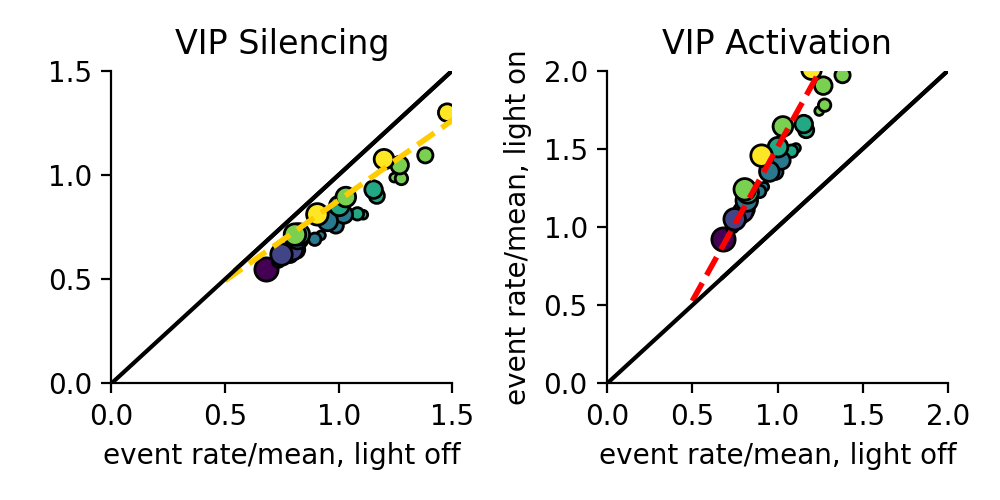

In [26]:
plt.figure(figsize=(5,2.5))

xplot = np.linspace(0.5,3,100)

idata = 0
plt.subplot(1,2,idata+1)
xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([YY_halo_orth,YY_halo_orig],[plt.cm.viridis,plt.cm.plasma]):
for data,colormap in zip([scall_halo_sim],[plt.cm.viridis]):
#     sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1],equate_0=True,colormap=colormap)
    mn = np.nanmean(data[:,:,:,0])
    sca.scatter_size_contrast(np.nanmean(data[:,:,:,0],0)/mn,np.nanmean(data[:,:,:,1],0)/mn,equate_0=True,colormap=colormap)    
    xdata = np.concatenate((xdata,data[:,:,:,0].flatten()))
    ydata = np.concatenate((ydata,data[:,:,:,1].flatten()))
# slope[idata], intercept[idata], r_value, p_value, std_err = sst.linregress(xdata,ydata)
def lin_transform(x):
    return x + mns[ihalo]*(alpha_bidi-1)*(x-x0_bidi)#slope[idata]*x+intercept[idata]
plt.plot(xplot,lin_transform(xplot),c=np.array((1,0.8,0)),linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[1]),c='m',linewidth=3,linestyle='dashed')
ut.erase_top_right()
plt.xlabel('event rate/mean, light off')
plt.title('VIP Silencing')
lim = (0,1.5)
plt.plot(lim,lim,c='k')
plt.xlim(lim)
plt.ylim(lim)

idata = 1
plt.subplot(1,2,idata+1)
xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([YY_chrimson_orth,YY_chrimson_orig],[plt.cm.viridis,plt.cm.plasma]):
for data,colormap in zip([scall_chrimson_sim],[plt.cm.viridis]):
#     sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1],equate_0=True,colormap=colormap)
    mn = np.nanmean(data[:,:,:,0])
    sca.scatter_size_contrast(np.nanmean(data[:,:,:,0],0)/mn,np.nanmean(data[:,:,:,1],0)/mn,equate_0=True,colormap=colormap)
    xdata = np.concatenate((xdata,data[:,:,:,0].flatten()))
    ydata = np.concatenate((ydata,data[:,:,:,1].flatten()))
# slope[idata], intercept[idata], r_value, p_value, std_err = sst.linregress(xdata,ydata)
def lin_transform(x):
    return x + mns[ichrimson]*(alpha_bidi-1)*(x-x0_bidi)#slope[idata]*x+intercept[idata]
plt.plot(xplot,lin_transform(xplot),c='r',linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[0]),c='m',linewidth=3,linestyle='dashed')
ut.erase_top_right()
plt.xlabel('event rate/mean, light off')
plt.ylabel('event rate/mean, light on')
plt.title('VIP Activation')
lim = (0,2)

plt.plot(lim,lim,c='k')
plt.xlim(lim)
plt.ylim(lim)
plt.tight_layout()
# plt.savefig('figures/vip_opto_angle_light_on_light_off_scatter_errorbar_linear_fit_sim.eps')

In [276]:
top_smimi = np.ones((scall_chrimson_sim.shape[0],),dtype='bool')

<IPython.core.display.Javascript object>


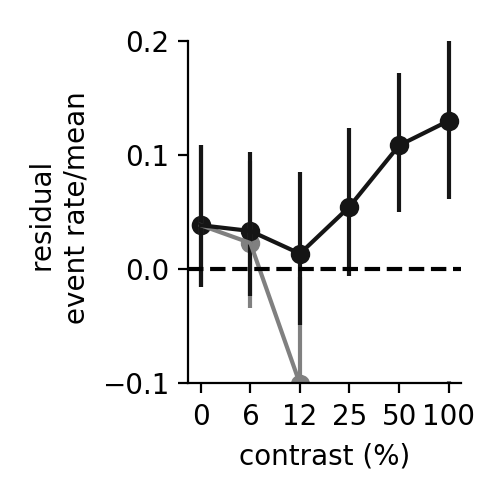

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.06119976583445173
linewidth: 1
plotting
linewidth: 1
plotting


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


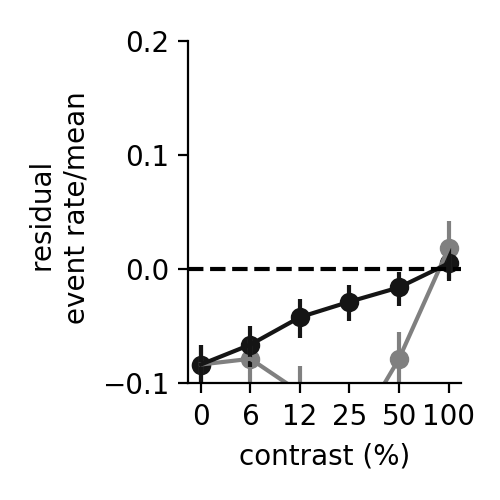

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


-0.008933824044115291
linewidth: 1
plotting
linewidth: 1
plotting


In [27]:
ucontrast = np.array((0,6,12,25,50,100))
this_ncontrast = len(ucontrast)
usize = np.array((5,11,25,60))
cfrac = np.linspace(1,0,this_ncontrast+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

these_sizes = [0,-1]

lim = (-0.1,0.2)

for this_data,lin_transform,lbl in zip([scall_chrimson_sim,scall_halo_sim],[lin_transform_chrimson,lin_transform_halo],['chrimson','halo']):
    plt.figure(figsize=(2.5,2.5))
    mn = np.nanmean(np.nanmean(this_data[:,:,:,0],1),1)[:,np.newaxis,np.newaxis,np.newaxis]
    this_data = this_data/mn
    this_data[:,:,0,:] = np.nanmean(this_data[:,:,0,:],1)[:,np.newaxis,:]
    pred = lin_transform(this_data[:,:,:,0])
    actual = this_data[:,:,:,1]
    ut.plot_bootstrapped_errorbars_hillel(np.arange(this_ncontrast),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes])
    plt.xticks(np.arange(this_ncontrast),ucontrast)
    plt.axhline(0,c='k',linestyle='dashed')
    ut.erase_top_right()
    plt.xlabel('contrast (%)')
    plt.ylabel('residual \n event rate/mean')
    plt.ylim(lim)
    plt.tight_layout()
#     plt.savefig('figures/vip_%s_sim_residual_over_exp.eps'%lbl)

In [29]:
def safe_log(z,floor=-5):
    ok = z>np.exp(floor)
    to_return = np.zeros_like(z)
    to_return[ok] = np.log(z[ok])
    to_return[~ok] = floor
    return to_return
# idata = 1
# x0 = intercept[idata]/(1-slope[idata])
# alpha_halo = slope[idata]
# x1 = np.nanmean(scall_halo[:,:,:,:,0],0)
# x2 = np.nanmean(scall_halo[:,:,:,:,1],0)
# u = 0.5*(-safe_log(x1-x0)/(alpha_halo-1) + -safe_log(x2-x0)/(alpha_halo-1) + 1)
# xvals_halo = np.concatenate((u[:,:,:,np.newaxis],u[:,:,:,np.newaxis]-1),axis=3)
# scall_halo_sim = x0 + np.exp((1 - alpha_halo)*xvals_halo)

# idata = 0
# alpha_chrimson = np.mean(ydata-x0)/np.mean(xdata-x0)
# x1 = np.nanmean(scall_chrimson[:,:,:,:,0],0)
# x2 = np.nanmean(scall_chrimson[:,:,:,:,1],0)
# h = -(alpha_chrimson-1)/(alpha_halo-1)
# u = 0.5*(-safe_log(x1-x0)/(alpha_halo-1) + -safe_log(x2-x0)/(alpha_halo-1) - h)
# xvals_chrimson = np.concatenate((u[:,:,:,np.newaxis],u[:,:,:,np.newaxis]+h),axis=3)
# scall_chrimson_sim = x0 + np.exp((1 - alpha_halo)*xvals_chrimson)

In [8]:
# derivation in Notes 9 pg. 8
x0 = x0_bidi.copy()
h_halo = mns[ihalo]*(alpha_bidi - 1)
h_chrimson = mns[ichrimson]*(alpha_bidi - 1)

x1 = scall_halo[:,:,:,:,0]
x2 = scall_halo[:,:,:,:,1]
u = safe_log(x1-x0)*0.5 + (safe_log(x2-x0) - h_halo)*0.5
xvals_halo = np.concatenate((u[:,:,:,:,np.newaxis],u[:,:,:,:,np.newaxis]+h_halo),axis=4)
# scall_halo_sim = x0 + np.exp((1 - alpha_halo)*xvals_halo)
scall_halo_exp = scall_halo.copy()
scall_halo_exp[:,:,:,:,1] = scall_halo[:,:,:,:,0] + h_halo*(scall_halo[:,:,:,:,0] - x0)

plt.figure()
plt.scatter(u,x1)
plt.scatter(u+h_halo,x2)

idata = 0
alpha_chrimson = np.mean(ydata-x0)/np.mean(xdata-x0)
x1 = scall_chrimson[:,:,:,:,0]
x2 = scall_chrimson[:,:,:,:,1]
u = safe_log(x1-x0)*0.5 + (safe_log(x2-x0) - h_chrimson)*0.5
xvals_chrimson = np.concatenate((u[:,:,:,:,np.newaxis],u[:,:,:,:,np.newaxis]+h_chrimson),axis=4)
# scall_chrimson_sim = x0 + np.exp((1 - alpha_halo)*xvals_chrimson)
scall_chrimson_exp = scall_chrimson.copy()
scall_chrimson_exp[:,:,:,:,1] = scall_chrimson[:,:,:,:,0] + h_chrimson*(scall_chrimson[:,:,:,:,0] - x0)

plt.figure()
plt.scatter(u,x1)
plt.scatter(u+h_chrimson,x2)

NameError: name 'x0_bidi' is not defined

In [31]:
def process_opto_data(scall_halo_sim,x0,h_halo,log_floor=-5):
    x1 = scall_halo_sim[:,:,:,0]
    x2 = scall_halo_sim[:,:,:,1]
    u = safe_log(x1-x0,floor=log_floor)#*0.5 + (safe_log(x2-x0,floor=log_floor) - h_halo)*0.5
    xvals_halo = np.concatenate((u[:,:,:,np.newaxis],u[:,:,:,np.newaxis]+h_halo),axis=3)
    # scall_halo_sim = x0 + np.exp((1 - alpha_halo)*xvals_halo)
    scall_halo_exp = scall_halo_sim.copy()
    scall_halo_exp[:,:,:,1] = scall_halo_sim[:,:,:,0] + h_halo*(scall_halo_sim[:,:,:,0] - x0)
    return u,x1,x2,scall_halo_exp

def plot_ref_curve(x0,x):
    plt.plot(x,x0+np.exp(x),c='k',linestyle='dashed',alpha=0.5)

def plot_opto_data(u,x1,x2,x0,h_halo,x,c=np.array((1,0.8,0))):
    plt.figure(figsize=(7.5,2.5))
    
    plt.subplot(1,3,1)
    sca.scatter_size_contrast_errorbar(u,x1,equality_line=False,square=False)
    plot_ref_curve(x0,x)
    ut.erase_top_right()
    
    plt.subplot(1,3,2)
    sca.scatter_size_contrast_errorbar(u+h_halo,x2,equality_line=False,square=False)
    plot_ref_curve(x0,x)
    ut.erase_top_right()
    
    plt.subplot(1,3,3)
    mean_data = np.concatenate((np.nanmean(x1,0).flatten()[:,np.newaxis],np.nanmean(x2,0).flatten()[:,np.newaxis]),axis=1)
    xflat = np.nanmean(u,0).flatten()[:,np.newaxis]
    mean_xval = np.concatenate((xflat,xflat+h_halo*np.ones_like(xflat)),axis=1)
    print((mean_xval.shape,mean_data.shape))
    for iline in range(mean_data.shape[0]):
        plt.plot(mean_xval[iline,:],mean_data[iline,:],c=c,alpha=0.5,zorder=1)
    plot_ref_curve(x0,x)
    ut.erase_top_right()
    
    plt.subplot(1,3,1)
    plt.xlabel('log (event rate/mean \n $-$ baseline)')
    plt.ylabel('event rate/mean')
    plt.subplot(1,3,2)
    plt.xlabel('log (event rate/mean \n $-$ baseline) + $h_{opto}$')
    plt.subplot(1,3,3)
    plt.xlabel('log (event rate/mean \n $-$ baseline) ( + $h_{opto}$)')
    
    plt.tight_layout()

<IPython.core.display.Javascript object>


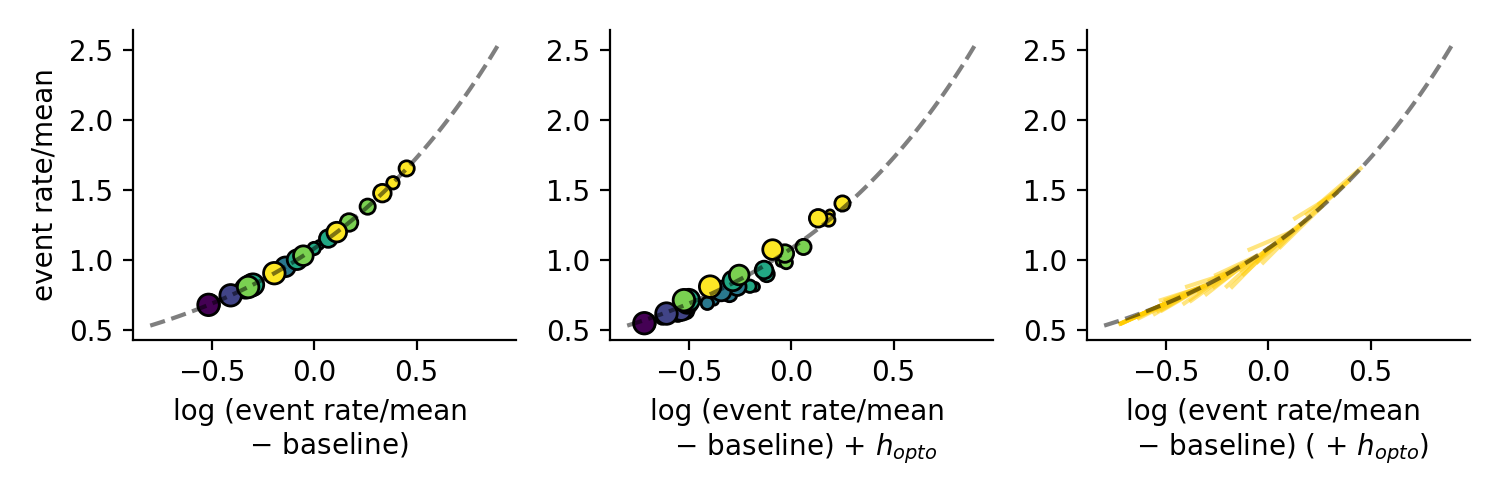

((36, 2), (36, 2))


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the 

<IPython.core.display.Javascript object>


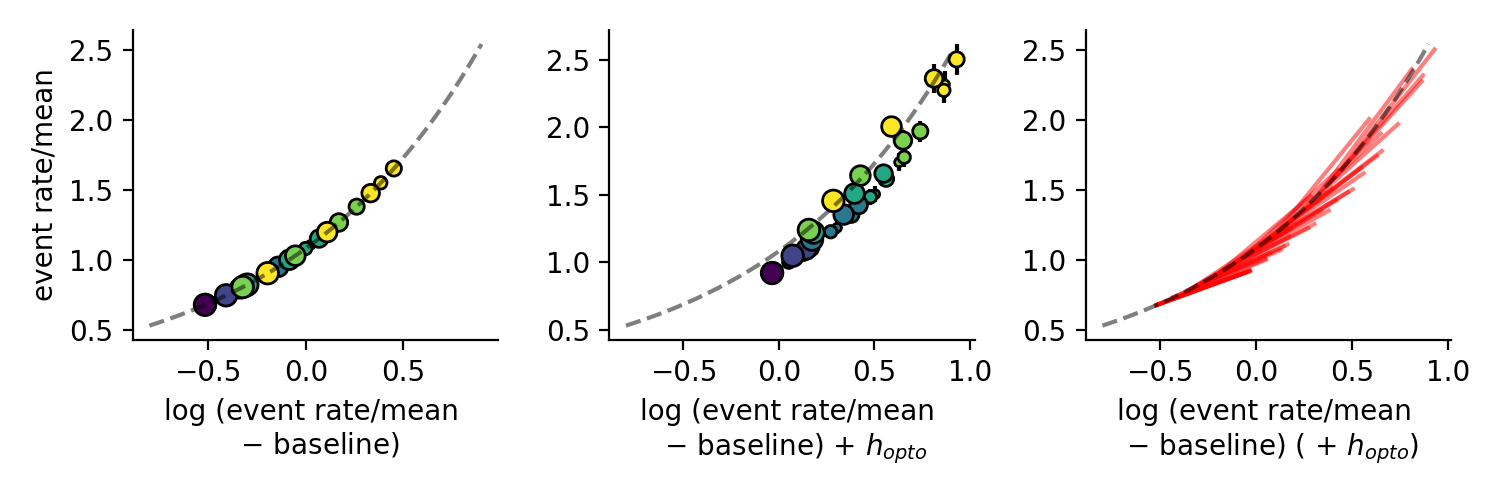

((36, 2), (36, 2))


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the 

In [32]:
# derivation in Notes 9 pg. 8
x0 = x0_bidi_sim.copy()
h_halo = mns_sim[ihalo]*(alpha_bidi_sim - 1)
h_chrimson = mns_sim[ichrimson]*(alpha_bidi_sim - 1)

u,x1,x2,scall_halo_sim_exp = process_opto_data(scall_halo_sim,x0,h_halo)

x = np.linspace(-0.8,0.9,100)

# plt.figure(figsize=(2.5,2.5))
# sca.scatter_size_contrast_errorbar(u,x1,equality_line=False,square=False)
# sca.scatter_size_contrast_errorbar(u+h_halo,x2,equality_line=False,square=False)
# plt.plot(x,x0+np.exp(x),c='k',linestyle='dashed')
plot_opto_data(u,x1,x2,x0,h_halo,x,c=np.array((1,0.8,0)))

u,x1,x2,scall_chrimson_sim_exp = process_opto_data(scall_chrimson_sim,x0,h_chrimson)

# plt.figure(figsize=(2.5,2.5))
# sca.scatter_size_contrast_errorbar(u,x1,equality_line=False,square=False)
# sca.scatter_size_contrast_errorbar(u+h_chrimson,x2,equality_line=False,square=False)
# plt.plot(x,x0+np.exp(x),c='k',linestyle='dashed')
# ut.erase_top_right()
plot_opto_data(u,x1,x2,x0,h_chrimson,x,c=np.array((1,0,0)))

<IPython.core.display.Javascript object>


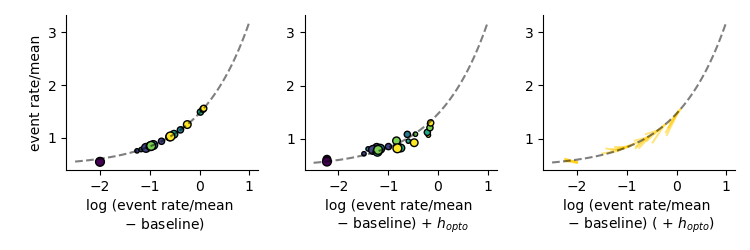

((24, 2), (24, 2))


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the 

<IPython.core.display.Javascript object>


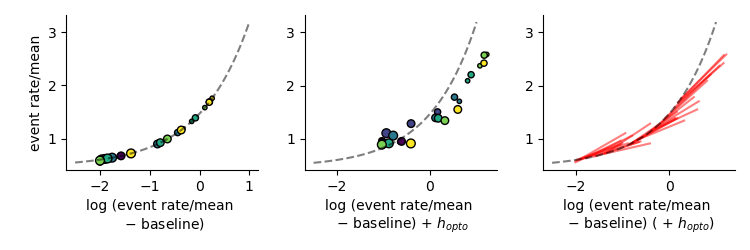

((24, 2), (24, 2))


In [524]:
log_floor = -2

x0 = x0_bidi.copy()
h_halo = mns[ihalo]*(alpha_bidi - 1)
h_chrimson = mns[ichrimson]*(alpha_bidi - 1)

lkat = ut.mult_apply(~np.isnan(np.nanmean(scall_halo,3)),np.all,[1,2,3])
# u,x1,x2,scall_halo_sim_exp = process_opto_data(np.nanmean(scall_halo[lkat],3),x0,h_halo,log_floor=log_floor)
u,x1,x2,scall_halo_sim_exp = process_opto_data(np.nanmean(np.nanmean(scall_halo[lkat],3),0)[np.newaxis],x0,h_halo,log_floor=log_floor)

x = np.linspace(-2.5,1,100)

# plt.figure(figsize=(2.5,2.5))
# sca.scatter_size_contrast_errorbar(u,x1,equality_line=False,square=False)
# sca.scatter_size_contrast_errorbar(u+h_halo,x2,equality_line=False,square=False)
# plt.plot(x,x0+np.exp(x),c='k',linestyle='dashed')
plot_opto_data(u,x1,x2,x0,h_halo,x,c=np.array((1,0.8,0)))

lkat = ut.mult_apply(~np.isnan(np.nanmean(scall_chrimson,3)),np.all,[1,2,3])
# u,x1,x2,scall_chrimson_sim_exp = process_opto_data(np.nanmean(scall_chrimson[lkat],3),x0,h_chrimson,log_floor=log_floor)
u,x1,x2,scall_chrimson_sim_exp = process_opto_data(np.nanmean(np.nanmean(scall_chrimson[lkat],3),0)[np.newaxis],x0,h_chrimson,log_floor=log_floor)

# plt.figure(figsize=(2.5,2.5))
# sca.scatter_size_contrast_errorbar(u,x1,equality_line=False,square=False)
# sca.scatter_size_contrast_errorbar(u+h_chrimson,x2,equality_line=False,square=False)
# plt.plot(x,x0+np.exp(x),c='k',linestyle='dashed')
# ut.erase_top_right()
plot_opto_data(u,x1,x2,x0,h_chrimson,x,c=np.array((1,0,0)))

In [375]:
u.shape

(38, 6, 6)

In [372]:
x0

0.08298088477672384

In [351]:
scall_halo_sim_exp.shape

(38, 6, 6, 2)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


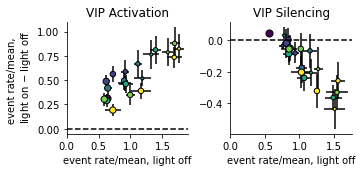

In [10]:
slope = np.zeros((2,))
intercept = np.zeros((2,))
plt.figure(figsize=(5,2.5))
idata = 1
plt.subplot(1,2,idata+1)
xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([YY_halo_orth,YY_halo_orig],[plt.cm.viridis,plt.cm.plasma]):
for data,colormap in zip([np.nanmean(scall_halo,3)],[plt.cm.viridis]):
    sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1]-data[:,:,:,0],equate_0=True,\
                                       colormap=colormap,equality_line=False,square=False)
    lkat = ~np.isnan(data.sum(1).sum(1).sum(1))
    xdata = np.concatenate((xdata,data[lkat,:,:,0].flatten()))
    ydata = np.concatenate((ydata,data[lkat,:,:,1].flatten()))
plt.axhline(0,c='k',linestyle='dashed')
plt.gca().set_xlim(left=0)
# slope[idata], intercept[idata], r_value, p_value, std_err = sst.linregress(xdata,ydata)
def lin_transform(x):
    return mns[1-idata]*(alpha_bidi-1)*(x-x0_bidi)#slope[idata]*x+intercept[idata]
# plt.plot(np.linspace(x0,1.8,100),lin_transform(np.linspace(x0,1.8,100)),c=np.array((1,0.8,0)),linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(0.5,3,100),lin_transform(np.linspace(0.5,3,100)),c=np.array((1,0.8,0)),linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[1]),c='m',linewidth=3,linestyle='dashed')
ut.erase_top_right()
plt.xlabel('event rate/mean, light off')
plt.title('VIP Silencing')
lim = (0,2)
# plt.plot(lim,lim,c='k')
# plt.xlim(lim)
# plt.ylim(lim)
idata = 0
plt.subplot(1,2,idata+1)
xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([YY_chrimson_orth,YY_chrimson_orig],[plt.cm.viridis,plt.cm.plasma]):
for data,colormap in zip([np.nanmean(scall_chrimson,3)],[plt.cm.viridis]):
    sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1]-data[:,:,:,0],equate_0=True,\
                                       colormap=colormap,equality_line=False,square=False)
    lkat = ~np.isnan(data.sum(1).sum(1).sum(1))
    xdata = np.concatenate((xdata,data[lkat,:,:,0].flatten()))
    ydata = np.concatenate((ydata,data[lkat,:,:,1].flatten()))
plt.gca().set_xlim(left=0)
plt.axhline(0,c='k',linestyle='dashed')
# slope[idata], intercept[idata], r_value, p_value, std_err = sst.linregress(xdata,ydata)
def lin_transform(x):
    return mns[1-idata]*(alpha_bidi-1)*(x-x0_bidi)#slope[idata]*x+intercept[idata]
# plt.plot(np.linspace(x0,1.8,100),lin_transform(np.linspace(x0,1.8,100)),c='r',linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[0]),c='m',linewidth=3,linestyle='dashed')
ut.erase_top_right()
plt.xlabel('event rate/mean, light off')
plt.ylabel('event rate/mean, \n light on $-$ light off')
plt.title('VIP Activation')
lim = (0,3)

# plt.plot(lim,lim,c='k')
# plt.xlim(lim)
# plt.ylim(lim)
plt.tight_layout()
# plt.savefig('figures/vip_opto_delta_light_on_light_off_scatter_errorbar_linear_fit.eps')

In [59]:
np.nanmean(np.nanmean(np.nanmean(scall_chrimson,3),1),1)

array([[1.        , 1.52441166],
       [1.        , 1.40121072],
       [1.        , 1.20157561],
       [1.        , 1.80462273],
       [1.        , 1.46874192],
       [1.        , 1.66167152]])

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


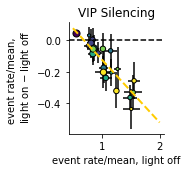

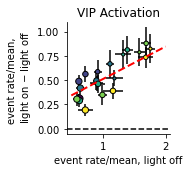

In [11]:
xs = np.linspace(0.5,2,100)
slope = np.zeros((2,))
intercept = np.zeros((2,))
# plt.figure(figsize=(5,2.5))
idata_halo = 1
plt.figure(figsize=(2.5,2.5))
xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([YY_halo_orth,YY_halo_orig],[plt.cm.viridis,plt.cm.plasma]):
for data,colormap in zip([np.nanmean(scall_halo,3)],[plt.cm.viridis]):
    sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1]-data[:,:,:,0],equate_0=True,\
                                       colormap=colormap,equality_line=False,square=False)
    lkat = ~np.isnan(data.sum(1).sum(1).sum(1))
    xdata = np.concatenate((xdata,data[lkat,:,:,0].flatten()))
    ydata = np.concatenate((ydata,data[lkat,:,:,1].flatten()-data[lkat,:,:,0].flatten()))
plt.axhline(0,c='k',linestyle='dashed')
# plt.gca().set_xlim(left=0)
slope[idata_halo], intercept[idata_halo], r_value, p_value, std_err = sst.linregress(xdata,ydata)
def lin_transform_halo(x):
    return slope[idata_halo]*x+intercept[idata_halo]
# plt.plot(np.linspace(x0,1.8,100),lin_transform(np.linspace(x0,1.8,100)),c=np.array((1,0.8,0)),linewidth=2,linestyle='dashed')
plt.plot(xs,lin_transform_halo(xs),c=np.array((1,0.8,0)),linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[1]),c='m',linewidth=3,linestyle='dashed')
ut.erase_top_right()
plt.xlabel('event rate/mean, light off')
plt.ylabel('event rate/mean, \n light on $-$ light off')
plt.title('VIP Silencing')
lim = (0,2)

scall_halo_exp = scall_halo.copy()
scall_halo_exp[:,:,:,:,1] = scall_halo_exp[:,:,:,:,0] + slope[idata_halo]*scall_halo_exp[:,:,:,:,0] + intercept[idata_halo]

# plt.plot(lim,lim,c='k')
# plt.xlim(lim)
# plt.ylim(lim)
idata_chrimson = 0
plt.tight_layout()
# plt.savefig('figures/vip_halo_delta_light_on_light_off_scatter_errorbar_linear_fit.eps')

plt.figure(figsize=(2.5,2.5))
xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([YY_chrimson_orth,YY_chrimson_orig],[plt.cm.viridis,plt.cm.plasma]):
for data,colormap in zip([np.nanmean(scall_chrimson,3)],[plt.cm.viridis]):
    sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1]-data[:,:,:,0],equate_0=True,\
                                       colormap=colormap,equality_line=False,square=False)
    lkat = ~np.isnan(data.sum(1).sum(1).sum(1))
    xdata = np.concatenate((xdata,data[lkat,:,:,0].flatten()))
    ydata = np.concatenate((ydata,data[lkat,:,:,1].flatten()-data[lkat,:,:,0].flatten()))
# plt.gca().set_xlim(left=0)
plt.axhline(0,c='k',linestyle='dashed')
slope[idata_chrimson], intercept[idata_chrimson], r_value, p_value, std_err = sst.linregress(xdata,ydata)
def lin_transform_chrimson(x):
    return slope[idata_chrimson]*x+intercept[idata_chrimson]
plt.plot(xs,lin_transform_chrimson(xs),c='r',linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[0]),c='m',linewidth=3,linestyle='dashed')
ut.erase_top_right()
plt.xlabel('event rate/mean, light off')
plt.ylabel('event rate/mean, \n light on $-$ light off')
plt.title('VIP Activation')
lim = (0,3)

scall_chrimson_exp = scall_chrimson.copy()
scall_chrimson_exp[:,:,:,:,1] = scall_chrimson_exp[:,:,:,:,0] + slope[idata_chrimson]*scall_chrimson_exp[:,:,:,:,0] + intercept[idata_chrimson]

# plt.plot(lim,lim,c='k')
# plt.xlim(lim)
# plt.ylim(lim)
plt.tight_layout()
# plt.savefig('figures/vip_chrimson_delta_light_on_light_off_scatter_errorbar_linear_fit.eps')

In [32]:
scall_chrimson.shape

(6, 4, 6, 8, 2)

<IPython.core.display.Javascript object>


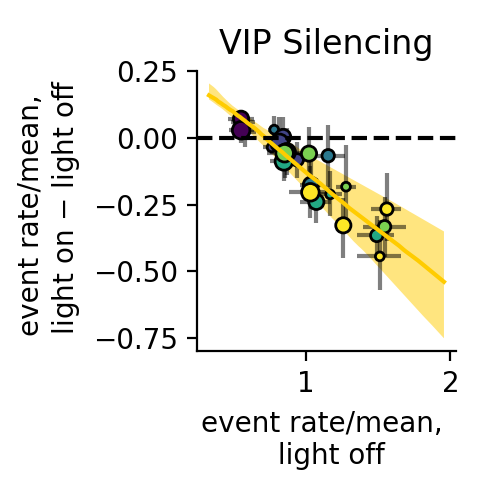

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)
/Users/dan/Documents/code/adesnal/pyute.py:140: RuntimeWarning: Mean of empty slice
  stat = fn(resamp,axis=axis)
/Users/dan/Documents/code/adesnal/opto_utils.py:386: RuntimeWarning: Mean of empty slice
  x = np.nanmean(animal_data[:,:,:,0],0)
/Users/dan/Documents/code/adesnal/opto_utils.py:388: RuntimeWarning: Mean of empty slice
  y = np.nanmean(animal_data[:,:,:,1],0)
/Users/dan/Documents/code/adesnal/opto_utils.py:374: RuntimeWarning: Mean of empty slice
  xy_ = np.nanmean(x*y,axis=axis)
/Users/dan/Documents/code/adesnal/opto_utils.py:375: RuntimeWarning: Mean of empty slice
  x_ = np.nanmean(x,axis=axis)
/Users/dan/Documents/code/adesnal/opto_utils.py:376: RuntimeWarning: Mean of empty slice
  y_ = np.nanmean(y,axis=axis)
/Users/dan/Documents/code/adesnal/opto_utils.py:377: RuntimeWarning: Mean of empty slice
  x2_ = np.nanmean(x**2,axis=ax

<IPython.core.display.Javascript object>


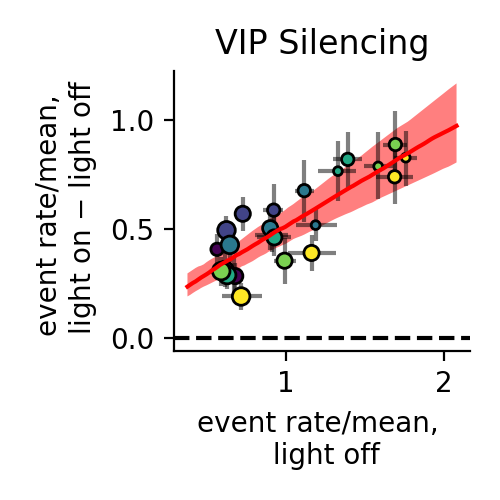

In [33]:
reload(opto_utils)

plt.figure(figsize=(2.5,2.5))
opto_utils.scatter_size_contrast_x_dx_errorbar(np.nanmean(scall_halo,3),opto_color=np.array((1,0.8,0)))
ut.erase_top_right()
plt.xlabel('event rate/mean, \n light off')
plt.ylabel('event rate/mean, \n light on $-$ light off')
plt.title('VIP Silencing')
plt.tight_layout()
# plt.savefig('figures/vip_halo_delta_light_on_light_off_scatter_errorbar_linear_fit.jpg',dpi=300)

plt.figure(figsize=(2.5,2.5))
opto_utils.scatter_size_contrast_x_dx_errorbar(np.nanmean(scall_chrimson,3),opto_color=np.array((1,0,0)))
ut.erase_top_right()
plt.xlabel('event rate/mean, \n light off')
plt.ylabel('event rate/mean, \n light on $-$ light off')
plt.title('VIP Silencing')
plt.tight_layout()

plt.tight_layout()
# plt.savefig('figures/vip_chrimson_delta_light_on_light_off_scatter_errorbar_linear_fit.jpg',dpi=300)

In [17]:
for data in [scall_halo,scall_chrimson]:
    x,y = [np.nanmean(data,3)[:,:,:,ilight].flatten() for ilight in range(2)]
    slope, intercept, r_value, p_value, std_err = sst.linregress(x[~np.isnan(x)], y[~np.isnan(x)]-x[~np.isnan(x)])
    print((r_value,p_value))

(-0.6416758744070353, 1.8627076832439673e-12)
(0.44957185707577424, 1.5805437596809398e-08)


In [35]:
scall_halo_l4.shape

(21, 3, 6, 2)

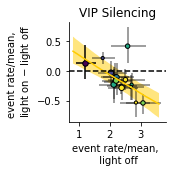

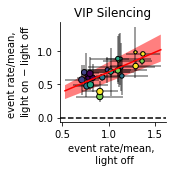

In [38]:
reload(opto_utils)

plt.figure(figsize=(2.5,2.5))
# opto_utils.scatter_size_contrast_x_dx_errorbar(scall_halo_l4,opto_color=np.array((1,0.8,0)),mn_plot=0.4,mx_plot=1.8)
opto_utils.scatter_size_contrast_x_dx_errorbar(scall_halo_l4,opto_color=np.array((1,0.8,0)),mn_plot=0.8,mx_plot=3.6)
ut.erase_top_right()
plt.xlabel('event rate/mean, \n light off')
plt.ylabel('event rate/mean, \n light on $-$ light off')
plt.title('VIP Silencing')
plt.tight_layout()
plt.savefig('figures/vip_halo_l4_delta_light_on_light_off_scatter_errorbar_linear_fit.jpg',dpi=300)

plt.figure(figsize=(2.5,2.5))
opto_utils.scatter_size_contrast_x_dx_errorbar(np.nanmean(scall_chrimson_l4,3),opto_color=np.array((1,0,0)))
ut.erase_top_right()
plt.xlabel('event rate/mean, \n light off')
plt.ylabel('event rate/mean, \n light on $-$ light off')
plt.title('VIP Silencing')
plt.tight_layout()

plt.tight_layout()
# plt.savefig('figures/vip_chrimson_l4_delta_light_on_light_off_scatter_errorbar_linear_fit.jpg',dpi=300)


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


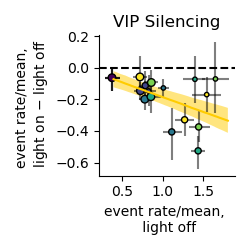

In [527]:
plt.figure(figsize=(2.5,2.5))
opto_utils.scatter_size_contrast_x_dx_errorbar(scall_halo_run,opto_color=np.array((1,0.8,0)),mn_plot=0.4,mx_plot=1.8)
ut.erase_top_right()
plt.xlabel('event rate/mean, \n light off')
plt.ylabel('event rate/mean, \n light on $-$ light off')
plt.title('VIP Silencing')
plt.tight_layout()

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)
/Users/dan/Documents/code/adesnal/pyute.py:140: RuntimeWarning: Mean of empty 

0.030100368904547772
linewidth: 1
plotting
linewidth: 1
plotting
-0.004182078360414829
linewidth: 1
plotting
linewidth: 1
plotting


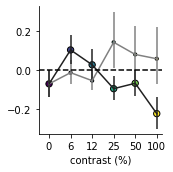

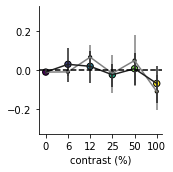

In [14]:
reload(ut)
these_sizes = [0,3]

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,11,25,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))


lim = (-0.33,0.33)

for this_data,lin_transform,lbl in zip([np.nanmean(scall_chrimson,3),np.nanmean(scall_halo,3)],[lin_transform_chrimson,lin_transform_halo],['chrimson','halo']):
    plt.figure(figsize=(2.5,2.5))
    mn = np.nanmean(np.nanmean(this_data[:,:,:,0],1),1)[:,np.newaxis,np.newaxis,np.newaxis]
    this_data = this_data/mn
    this_data[:,:,0,:] = np.nanmean(this_data[:,:,0,:],1)[:,np.newaxis,:]
#     xdata = this_data[:,:,:,0]
#     ydata = this_data[:,:,:,1]
#     lkat = ~np.isnan(xdata.sum(1).sum(1))
#     slope, intercept, r_value, p_value, std_err = sst.linregress(xdata[lkat].flatten(),ydata[lkat].flatten())
#     def lin_transform(xdata):
#         return slope*xdata + intercept
    pred = lin_transform(this_data[:,:,:,0])
    actual = this_data[:,:,:,1] - this_data[:,:,:,0]
    ut.plot_bootstrapped_errorbars_hillel(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84),markersize=0)
#     ut.plot_parametric_fn_errorbars(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],fit_fn=nra.fit_opt_params_two_asymptote_fn,plot_fn=nra.two_asymptote_fn,colors=c_l23[these_sizes],markersize=0,errorstyle='bs')
    xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
    for this_size in these_sizes:
        sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)    
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xticks(np.arange(this_ncontrast),ucontrast)
    ut.erase_top_right()
    plt.xlabel('contrast (%)')
#     plt.ylabel('residual \n $\Delta$ event rate/mean')
    plt.ylim(lim)
    plt.tight_layout()
    plt.savefig('figures/vip_%s_residual_over_line.eps'%lbl)

In [9]:
plt.close('all')

<IPython.core.display.Javascript object>


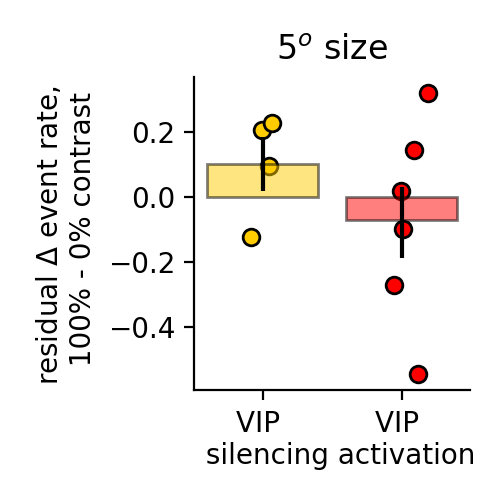

Ttest_indResult(statistic=1.0295941763174525, pvalue=0.33332066725897286)
Ttest_indResult(statistic=-1.6410177712631946, pvalue=0.1394220538761983)


<IPython.core.display.Javascript object>


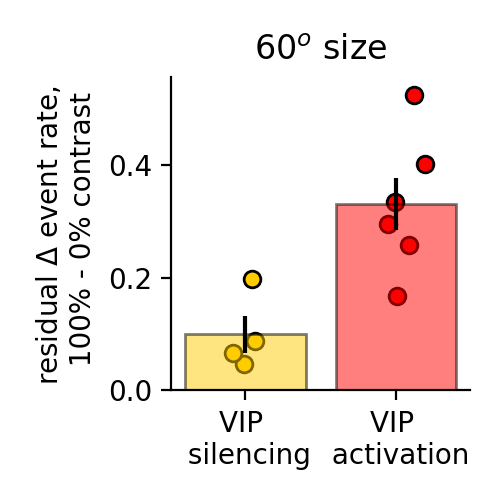

Ttest_indResult(statistic=-3.379985018706238, pvalue=0.00964186765202023)
Ttest_indResult(statistic=-1.6410177712631946, pvalue=0.1394220538761983)


In [55]:
these_sizes = [0,3]

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,11,25,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

for isize in [0,3]:

    isize1 = isize
    isize2 = isize
    icontrast1 = 1
    icontrast2 = 5

    lim = (-0.33,0.33)

    mean_res = [[] for idir in range(2)]
    diff_res = [[] for idir in range(2)]

    for idir,(this_data,lin_transform,lbl) in enumerate(zip([np.nanmean(scall_halo,3),np.nanmean(scall_chrimson,3)],[lin_transform_halo,lin_transform_chrimson],['halo','chrimson'])):
        mn = np.nanmean(np.nanmean(this_data[:,:,:,0],1),1)[:,np.newaxis,np.newaxis,np.newaxis]
        this_data = this_data/mn
        this_data[:,:,0,:] = np.nanmean(this_data[:,:,0,:],1)[:,np.newaxis,:]
        pred = lin_transform(this_data[:,:,:,0])
        actual = this_data[:,:,:,1] - this_data[:,:,:,0]
        mean_res[idir] = np.nanmean(np.nanmean(np.abs(actual-pred),axis=1),axis=1)
        diff_res[idir] = (actual-pred)[:,isize1,icontrast1] - (actual-pred)[:,isize2,icontrast2]
    plt.figure(figsize=(2.5,2.5))
    ut.bar_with_dots(diff_res,colors=[np.array((1,0.8,0)),'r'],tick_labels=['VIP \n silencing','VIP \n activation'])
    plt.ylabel('residual $\Delta$ event rate, \n 100% - 0% contrast')
    plt.title('%d$^o$ size'%usize[isize])
    ut.erase_top_right()
    plt.tight_layout()
    plt.savefig('figures/exptl_residual_vip_effect_size_%d.jpg'%isize,dpi=300)
    print(sst.ttest_ind(diff_res[0][~np.isnan(diff_res[0])],diff_res[1][~np.isnan(diff_res[1])]))
    print(sst.ttest_ind(mean_res[0][~np.isnan(mean_res[0])],mean_res[1][~np.isnan(mean_res[1])]))
    #     plt.savefig('figures/vip_%s_residual_over_line.eps'%lbl)

<IPython.core.display.Javascript object>


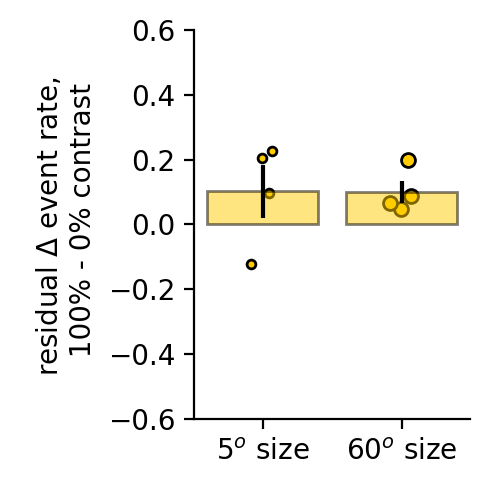

Ttest_indResult(statistic=0.025379086311355454, pvalue=0.9805756165615331)
Ttest_indResult(statistic=0.0, pvalue=1.0)


<IPython.core.display.Javascript object>


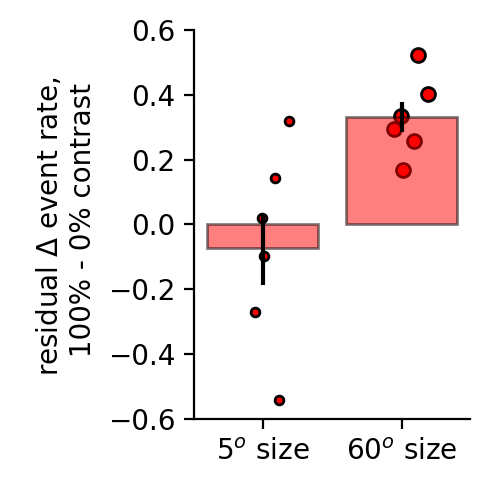

Ttest_indResult(statistic=-2.9834992701696024, pvalue=0.013725332410794665)
Ttest_indResult(statistic=0.0, pvalue=1.0)


In [79]:
    reload(ut)

    these_sizes = [0,3]

    dot_sizes = 10+np.arange(4)*5

    ucontrast = np.array((0,6,12,25,50,100))
    usize = np.array((5,11,25,60))
    this_nsize = len(usize)
    this_ncontrast = len(ucontrast)
    cfrac = np.linspace(1,0,this_nsize+1)[:-1]
    c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))
    c_opto = [np.array((1,0.8,0)),'r']

    idir = 2

    for idir,(this_data,lin_transform,lbl) in enumerate(zip([np.nanmean(scall_halo,3),np.nanmean(scall_chrimson,3)],[lin_transform_halo,lin_transform_chrimson],['halo','chrimson'])):

        icontrast1 = 1
        icontrast2 = 5

        lim = (-0.33,0.33)
        
        mn = np.nanmean(np.nanmean(this_data[:,:,:,0],1),1)[:,np.newaxis,np.newaxis,np.newaxis]
        this_data = this_data/mn
        this_data[:,:,0,:] = np.nanmean(this_data[:,:,0,:],1)[:,np.newaxis,:]
        pred = lin_transform(this_data[:,:,:,0])
        actual = this_data[:,:,:,1] - this_data[:,:,:,0]

        mean_res = [[] for this_isize in range(2)]
        diff_res = [[] for this_isize in range(2)]

        for this_isize in range(2):
            
            isize = these_sizes[this_isize]
            
            mean_res[this_isize] = np.nanmean(np.nanmean(np.abs(actual-pred),axis=1),axis=1)
            diff_res[this_isize] = (actual-pred)[:,isize,icontrast1] - (actual-pred)[:,isize,icontrast2]
            
        plt.figure(figsize=(2.5,2.5))
        ut.bar_with_dots(diff_res,colors=[c_opto[idir] for this_isize in range(2)],tick_labels=['%d$^o$ size'%u for u in usize[these_sizes]],s=[dot_sizes[isize] for isize in these_sizes])
        plt.ylabel('residual $\Delta$ event rate, \n 100% - 0% contrast')
#         plt.title('%d$^o$ size'%usize[isize])
        ut.erase_top_right()
        plt.tight_layout()
        plt.ylim((-0.6,0.6))
        plt.savefig('figures/exptl_residual_vip_%s_effect.jpg'%(lbl),dpi=300)
        print(sst.ttest_ind(diff_res[0][~np.isnan(diff_res[0])],diff_res[1][~np.isnan(diff_res[1])]))
        print(sst.ttest_ind(mean_res[0][~np.isnan(mean_res[0])],mean_res[1][~np.isnan(mean_res[1])]))

In [73]:
import pdb
ut.bar_with_dots(diff_res)

TypeError: only integer scalar arrays can be converted to a scalar index

In [74]:
pdb.pm()

> /Users/dan/Documents/code/adesnal/pyute.py(1954)bar_with_dots()
-> lb,ub = bootstrap(data[itype][~np.isnan(data[itype])],pct=pct,axis=0,fn=np.mean)
(Pdb) data[itype]
[]
(Pdb) u
> <ipython-input-73-fb899abfd28d>(2)<module>()
-> ut.bar_with_dots(diff_res)
(Pdb) diff_res
[array([0.04704834, 0.08662358, 0.06597075,        nan,        nan,
       0.19773005]), []]
(Pdb) exit


In [66]:
[c_opto[idir] for this_isize in range(2)]

[array([1. , 0.8, 0. ]), array([1. , 0.8, 0. ])]

In [65]:
[dot_sizes[isize] for isize in these_sizes]

[10, 25]

<IPython.core.display.Javascript object>


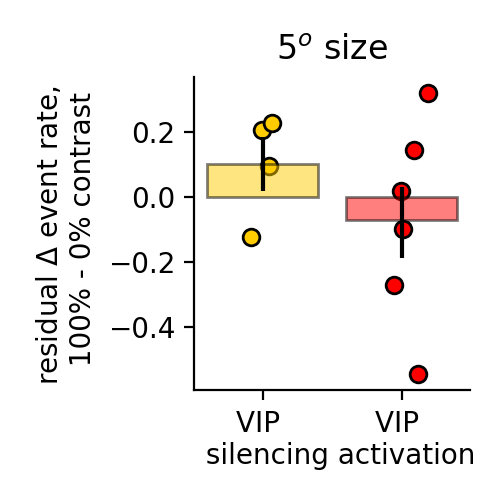

Ttest_indResult(statistic=1.0295941763174525, pvalue=0.33332066725897286)
Ttest_indResult(statistic=-1.6410177712631946, pvalue=0.1394220538761983)


<IPython.core.display.Javascript object>


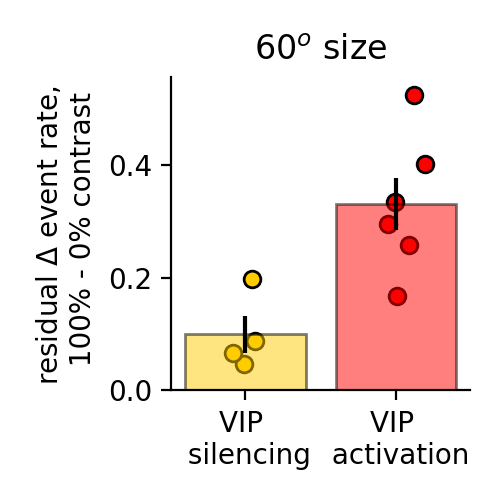

Ttest_indResult(statistic=-3.379985018706238, pvalue=0.00964186765202023)
Ttest_indResult(statistic=-1.6410177712631946, pvalue=0.1394220538761983)


In [60]:
these_sizes = [0,3]

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,11,25,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))
c_opto = [np.array((1,0.8,0)),'r']

for isize in [0,3]:

    isize1 = isize
    isize2 = isize
    icontrast1 = 1
    icontrast2 = 5

    lim = (-0.33,0.33)

    mean_res = [[] for idir in range(2)]
    diff_res = [[] for idir in range(2)]

    for idir,(this_data,lin_transform,lbl) in enumerate(zip([np.nanmean(scall_halo,3),np.nanmean(scall_chrimson,3)],[lin_transform_halo,lin_transform_chrimson],['halo','chrimson'])):
        mn = np.nanmean(np.nanmean(this_data[:,:,:,0],1),1)[:,np.newaxis,np.newaxis,np.newaxis]
        this_data = this_data/mn
        this_data[:,:,0,:] = np.nanmean(this_data[:,:,0,:],1)[:,np.newaxis,:]
        pred = lin_transform(this_data[:,:,:,0])
        actual = this_data[:,:,:,1] - this_data[:,:,:,0]
        mean_res[idir] = np.nanmean(np.nanmean(np.abs(actual-pred),axis=1),axis=1)
        diff_res[idir] = (actual-pred)[:,isize1,icontrast1] - (actual-pred)[:,isize2,icontrast2]
    plt.figure(figsize=(2.5,2.5))
    ut.bar_with_dots(diff_res,colors=c_opto[idir],tick_labels=['VIP \n silencing','VIP \n activation'])
    plt.ylabel('residual $\Delta$ event rate, \n 100% - 0% contrast')
    plt.title('%d$^o$ size'%usize[isize])
    ut.erase_top_right()
    plt.tight_layout()
#     plt.savefig('figures/exptl_residual_vip_effect_size_%d.jpg'%isize,dpi=300)
    print(sst.ttest_ind(diff_res[0][~np.isnan(diff_res[0])],diff_res[1][~np.isnan(diff_res[1])]))
    print(sst.ttest_ind(mean_res[0][~np.isnan(mean_res[0])],mean_res[1][~np.isnan(mean_res[1])]))
    #     plt.savefig('figures/vip_%s_residual_over_line.eps'%lbl)

<IPython.core.display.Javascript object>


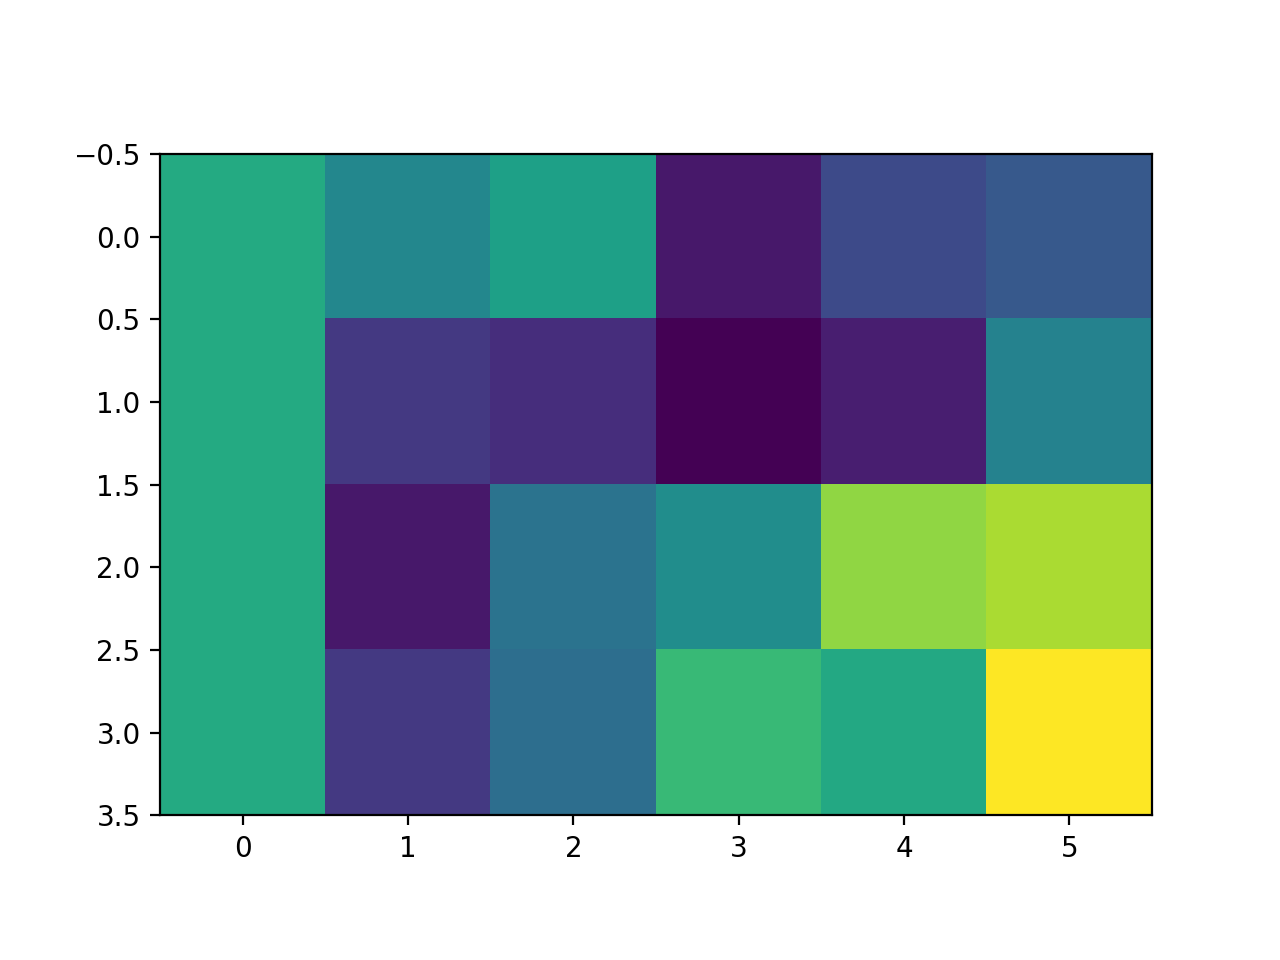

In [21]:
plt.figure()
plt.imshow(np.nanmean(pred-actual,0))

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


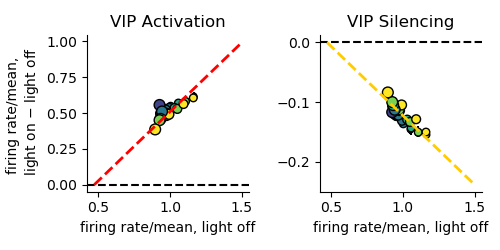

In [295]:
x1 = 1.5
slope = np.zeros((2,))
intercept = np.zeros((2,))
plt.figure(figsize=(5,2.5))
idata = 1
plt.subplot(1,2,idata+1)
xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([YY_halo_orth,YY_halo_orig],[plt.cm.viridis,plt.cm.plasma]):
for data,colormap in zip([scall_halo_sim],[plt.cm.viridis]):
    mn = np.nanmean(np.nanmean(data[:,:,:,0],axis=1),axis=1)[:,np.newaxis,np.newaxis]
    sca.scatter_size_contrast_errorbar(data[:,:,:,0]/mn,(data[:,:,:,1]-data[:,:,:,0])/mn,equate_0=True,\
                                       colormap=colormap,equality_line=False,square=False)
    xdata = np.concatenate((xdata,data[lkat,:,:,0].flatten()))
    ydata = np.concatenate((ydata,data[lkat,:,:,1].flatten()))
plt.axhline(0,c='k',linestyle='dashed')
# plt.gca().set_xlim(left=0)
# slope[idata], intercept[idata], r_value, p_value, std_err = sst.linregress(xdata,ydata)
def lin_transform(x):
    return mns[1-idata]*(alpha_bidi-1)*(x-x0_bidi)#slope[idata]*x+intercept[idata]
plt.plot(np.linspace(x0,x1,100),lin_transform(np.linspace(x0,x1,100)),c=np.array((1,0.8,0)),linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(0.5,3,100),lin_transform(np.linspace(0.5,3,100)),c=np.array((1,0.8,0)),linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[1]),c='m',linewidth=3,linestyle='dashed')
ut.erase_top_right()
plt.xlabel('firing rate/mean, light off')
plt.title('VIP Silencing')
# lim = (0,2)
# plt.plot(lim,lim,c='k')
# plt.xlim(lim)
# plt.ylim(lim)
idata = 0
plt.subplot(1,2,idata+1)
xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([YY_chrimson_orth,YY_chrimson_orig],[plt.cm.viridis,plt.cm.plasma]):
for data,colormap in zip([scall_chrimson_sim],[plt.cm.viridis]):
    mn = np.nanmean(np.nanmean(data[:,:,:,0],axis=1),axis=1)[:,np.newaxis,np.newaxis]
    sca.scatter_size_contrast_errorbar(data[:,:,:,0]/mn,(data[:,:,:,1]-data[:,:,:,0])/mn,equate_0=True,\
                                       colormap=colormap,equality_line=False,square=False)
    lkat = ~np.isnan(data.sum(1).sum(1).sum(1))
    xdata = np.concatenate((xdata,data[lkat,:,:,0].flatten()))
    ydata = np.concatenate((ydata,data[lkat,:,:,1].flatten()))
# plt.gca().set_xlim(left=0)
plt.axhline(0,c='k',linestyle='dashed')
# slope[idata], intercept[idata], r_value, p_value, std_err = sst.linregress(xdata,ydata)
def lin_transform(x):
    return mns[1-idata]*(alpha_bidi-1)*(x-x0_bidi)#slope[idata]*x+intercept[idata]
plt.plot(np.linspace(x0,x1,100),lin_transform(np.linspace(x0,x1,100)),c='r',linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[0]),c='m',linewidth=3,linestyle='dashed')
ut.erase_top_right()
plt.xlabel('firing rate/mean, light off')
plt.ylabel('firing rate/mean, \n light on $-$ light off')
plt.title('VIP Activation')
# lim = (0,3)

# plt.plot(lim,lim,c='k')
# plt.xlim(lim)
# plt.ylim(lim)
plt.tight_layout()
# plt.savefig('figures/vip_opto_delta_light_on_light_off_scatter_errorbar_linear_fit_sim.eps')

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


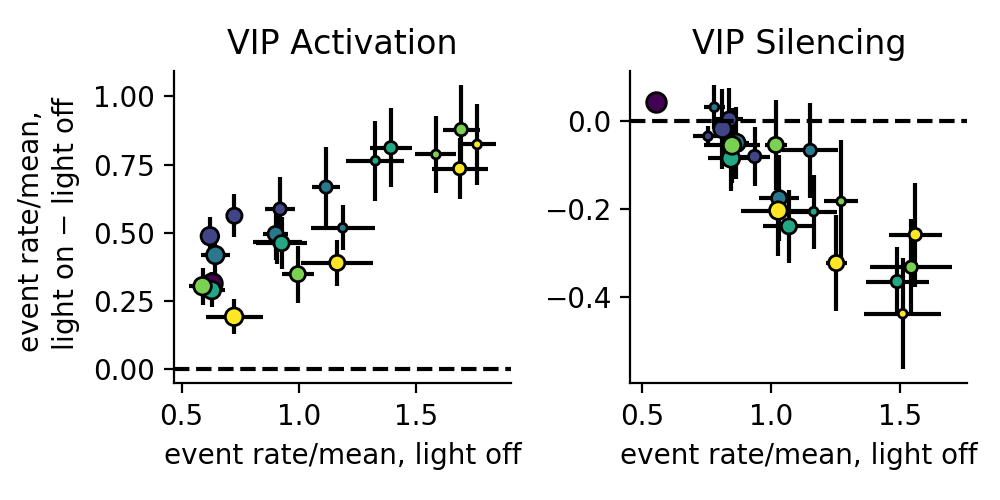

In [112]:
slope = np.zeros((2,))
intercept = np.zeros((2,))
plt.figure(figsize=(5,2.5))
idata = 1
plt.subplot(1,2,idata+1)
xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([YY_halo_orth,YY_halo_orig],[plt.cm.viridis,plt.cm.plasma]):
for data,colormap in zip([np.nanmean(scall_halo,3)],[plt.cm.viridis]):
    sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1]-data[:,:,:,0],equate_0=True,\
                                       colormap=colormap,equality_line=False,square=False)
    lkat = ~np.isnan(data.sum(1).sum(1).sum(1))
    xdata = np.concatenate((xdata,data[lkat,:,:,0].flatten()))
    ydata = np.concatenate((ydata,data[lkat,:,:,1].flatten()))
plt.axhline(0,c='k',linestyle='dashed')
slope[idata], intercept[idata], r_value, p_value, std_err = sst.linregress(xdata,ydata)
def lin_transform(x):
    return slope[idata]*x+intercept[idata]
# plt.plot(np.linspace(0.5,3,100),lin_transform(np.linspace(0.5,3,100)),c=np.array((1,0.8,0)),linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[1]),c='m',linewidth=3,linestyle='dashed')
ut.erase_top_right()
plt.xlabel('event rate/mean, light off')
plt.title('VIP Silencing')
lim = (0,2)
# plt.plot(lim,lim,c='k')
# plt.xlim(lim)
# plt.ylim(lim)
idata = 0
plt.subplot(1,2,idata+1)
xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([YY_chrimson_orth,YY_chrimson_orig],[plt.cm.viridis,plt.cm.plasma]):
for data,colormap in zip([np.nanmean(scall_chrimson,3)],[plt.cm.viridis]):
    sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1]-data[:,:,:,0],equate_0=True,\
                                       colormap=colormap,equality_line=False,square=False)
    lkat = ~np.isnan(data.sum(1).sum(1).sum(1))
    xdata = np.concatenate((xdata,data[lkat,:,:,0].flatten()))
    ydata = np.concatenate((ydata,data[lkat,:,:,1].flatten()))
plt.axhline(0,c='k',linestyle='dashed')
slope[idata], intercept[idata], r_value, p_value, std_err = sst.linregress(xdata,ydata)
def lin_transform(x):
    return slope[idata]*x+intercept[idata]
# plt.plot(np.linspace(0.5,3,100),lin_transform(np.linspace(0.5,3,100)),c='r',linewidth=2,linestyle='dashed')
# plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[0]),c='m',linewidth=3,linestyle='dashed')
ut.erase_top_right()
plt.xlabel('event rate/mean, light off')
plt.ylabel('event rate/mean, \n light on $-$ light off')
plt.title('VIP Activation')
lim = (0,3)

# plt.plot(lim,lim,c='k')
# plt.xlim(lim)
# plt.ylim(lim)
plt.tight_layout()
# plt.savefig('figures/vip_opto_angle_light_on_light_off_scatter_errorbar_linear_fit.eps')

In [94]:
# plt.figure(figsize=(5,2.5))
# idata = 1
# plt.subplot(1,2,idata+1)
# xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([np.nanmean(scall_halo,3)],[plt.cm.viridis]):
#     sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1],equate_0=True,colormap=colormap)
#     lkat = ~np.isnan(data.sum(1).sum(1).sum(1))
#     xdata = np.concatenate((xdata,data[lkat,:,:,0].flatten()))
#     ydata = np.concatenate((ydata,data[lkat,:,:,1].flatten()))
# def lin_transform(x):
#     return alpha_halo*(x-x0)+x0
# plt.plot(np.linspace(0.5,3,100),lin_transform(np.linspace(0.5,3,100)),c=np.array((1,0.8,0)),linewidth=2,linestyle='dashed')
# # plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[1]),c='m',linewidth=3,linestyle='dashed')
# ut.erase_top_right()
# plt.xlabel('event rate/mean, light off')
# plt.title('VIP Silencing')
# lim = (0,2)
# plt.plot(lim,lim,c='k')
# plt.xlim(lim)
# plt.ylim(lim)

# idata = 0
# plt.subplot(1,2,idata+1)
# xdata,ydata = [np.zeros((0,)) for idata in range(2)]
# for data,colormap in zip([np.nanmean(scall_chrimson,3)],[plt.cm.viridis]):
#     sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1],equate_0=True,colormap=colormap)
#     lkat = ~np.isnan(data.sum(1).sum(1).sum(1))
#     xdata = np.concatenate((xdata,data[lkat,:,:,0].flatten()))
#     ydata = np.concatenate((ydata,data[lkat,:,:,1].flatten()))
# def lin_transform(x):
#     return alpha_chrimson*(x-x0)+x0
# plt.plot(np.linspace(0.5,3,100),lin_transform(np.linspace(0.5,3,100)),c='r',linewidth=2,linestyle='dashed')
# # plt.plot(np.linspace(offset,3,100),opto_transform(np.linspace(0.5,3,100),hs[0]),c='m',linewidth=3,linestyle='dashed')
# ut.erase_top_right()
# plt.xlabel('event rate/mean, light off')
# plt.ylabel('event rate/mean, light on')
# plt.title('VIP Activation')
# lim = (0,3.5)

# plt.plot(lim,lim,c='k')
# plt.xlim(lim)
# plt.ylim(lim)
# plt.tight_layout()
# # plt.savefig('figures/vip_opto_angle_light_on_light_off_scatter_errorbar_exponential_fit.eps')

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


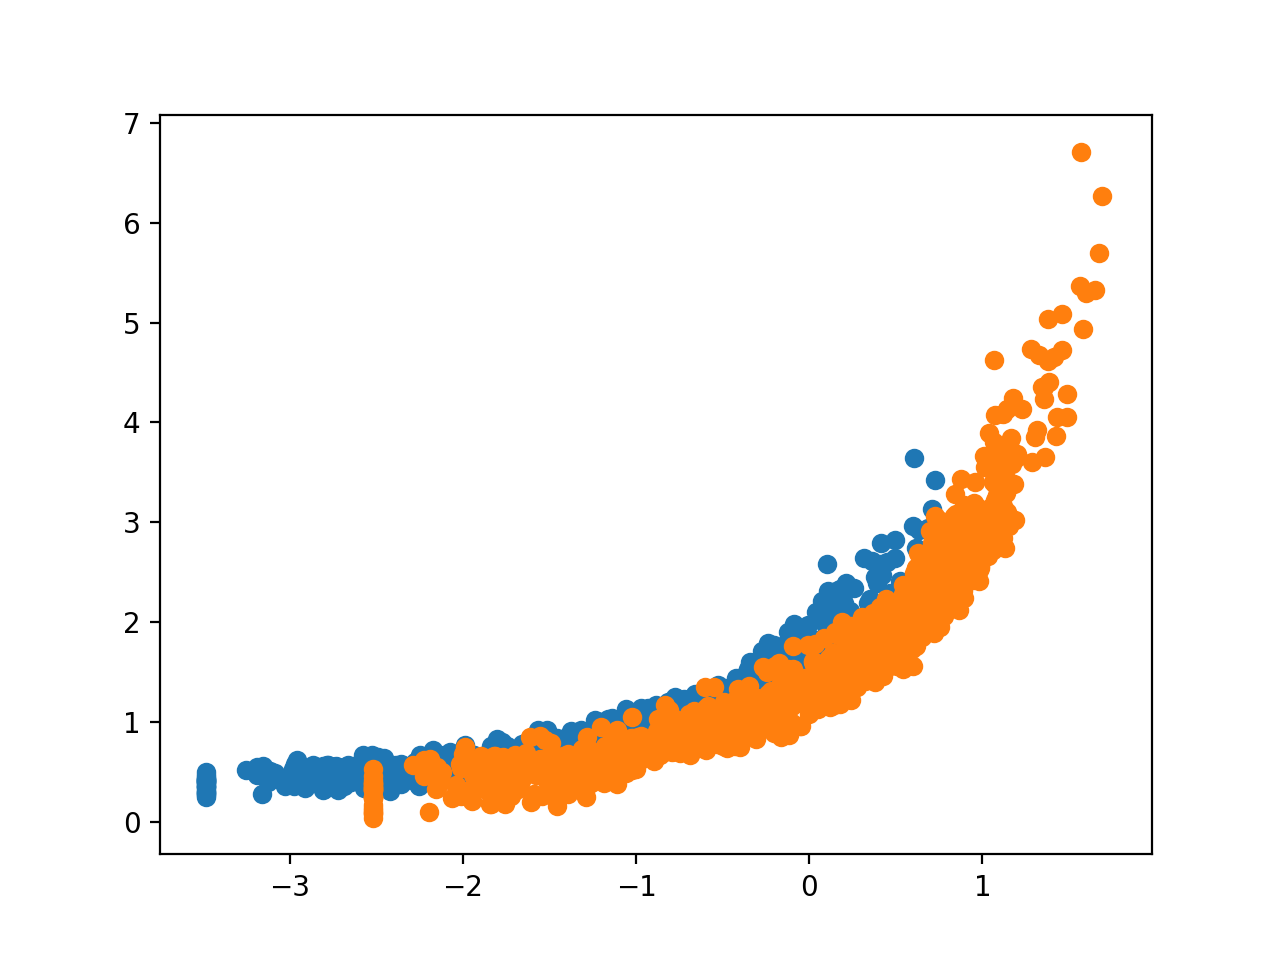

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


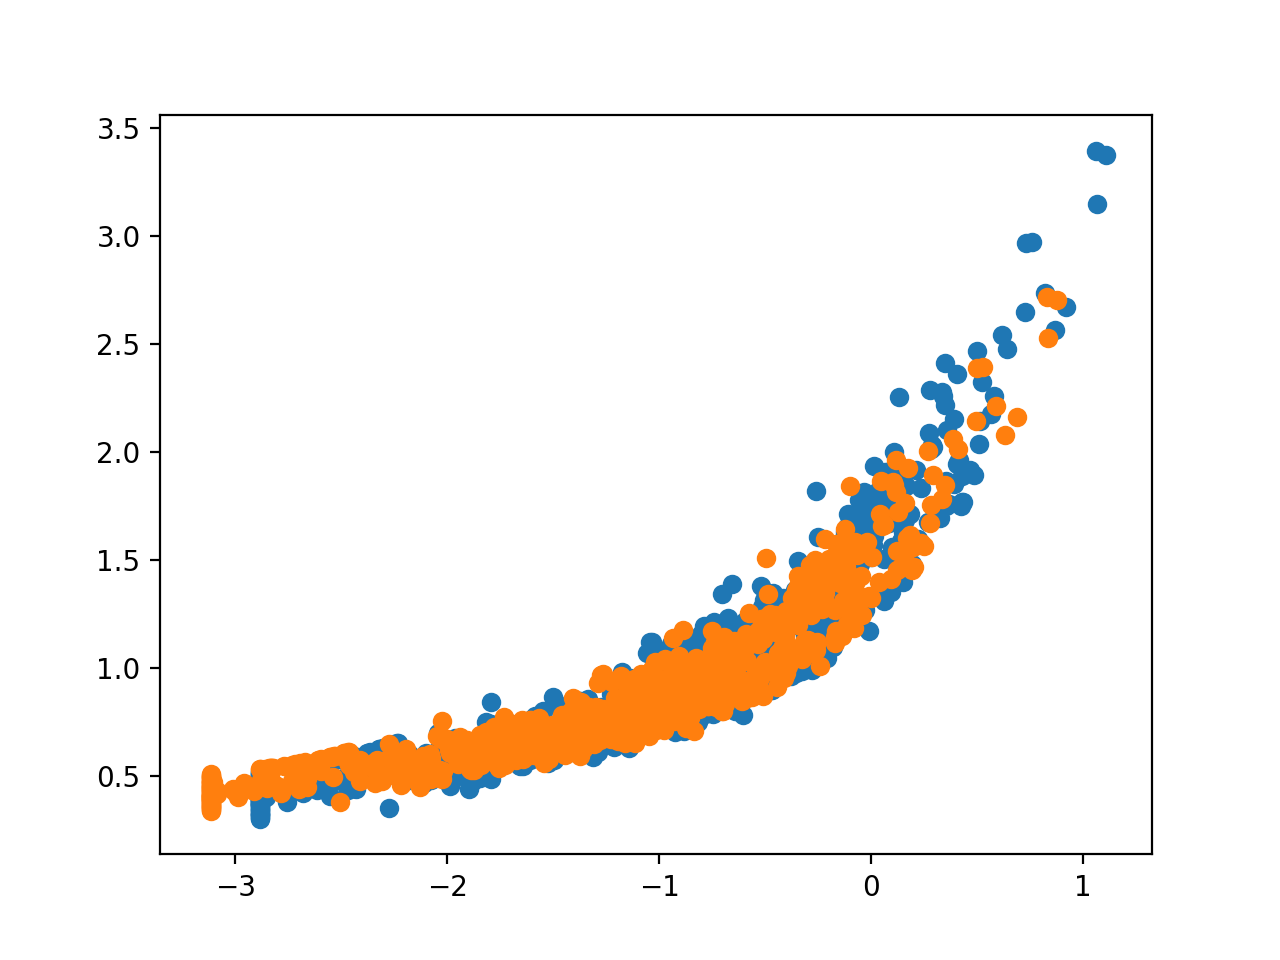

In [96]:
plt.figure()
for ilight in range(2):
    plt.scatter(xvals_chrimson[:,:,:,:,ilight].flatten(),scall_chrimson_exp[:,:,:,:,ilight].flatten())

plt.figure()
for ilight in range(2):
    plt.scatter(xvals_halo[:,:,:,:,ilight].flatten(),scall_halo_exp[:,:,:,:,ilight].flatten())
    
    

In [197]:
plt.figure()
x_to_plot = xvals_halo.reshape((-1,2))
y_to_plot = np.nanmean(scall_halo,0).reshape((-1,2))
for iline in range(x_to_plot.shape[0]):
    plt.plot(x_to_plot[iline],y_to_plot[iline],c=np.array((1,0.8,0)),alpha=0.2)
x_to_plot = xvals_chrimson.reshape((-1,2))
y_to_plot = np.nanmean(scall_chrimson,0).reshape((-1,2))
for iline in range(x_to_plot.shape[0]):
    plt.plot(x_to_plot[iline],y_to_plot[iline],c='r',alpha=0.2)
xplot = np.linspace(-10,4,100)
plt.plot(xplot,x0+np.exp(-(alpha_halo-1)*xplot),c='k',linestyle='dashed')


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

IndexError: index 192 is out of bounds for axis 0 with size 192

In [42]:

osi_halo = ut.compute_osi(scall_halo,np.arange(0,360,45))
osi_halo_sim = ut.compute_osi(scall_halo_sim,np.arange(0,360,45))

In [43]:
scall_halo_sim.shape

(6, 4, 6, 8, 2)

<IPython.core.display.Javascript object>


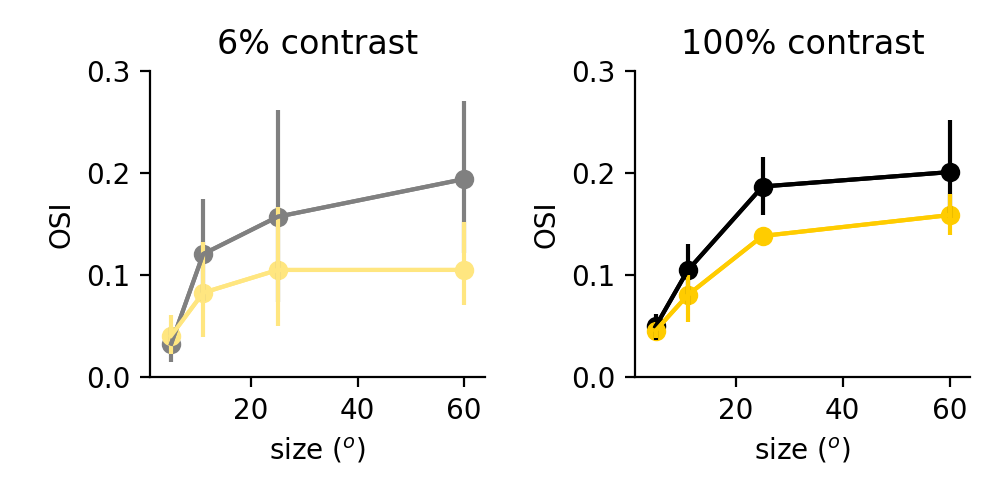

/Users/dan/Documents/code/adesnal/pyute.py:138: RuntimeWarning: Mean of empty slice
  stat = fn(resamp,axis=axis)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single nume

0.11812071622080982
0.15806322880984425


<IPython.core.display.Javascript object>


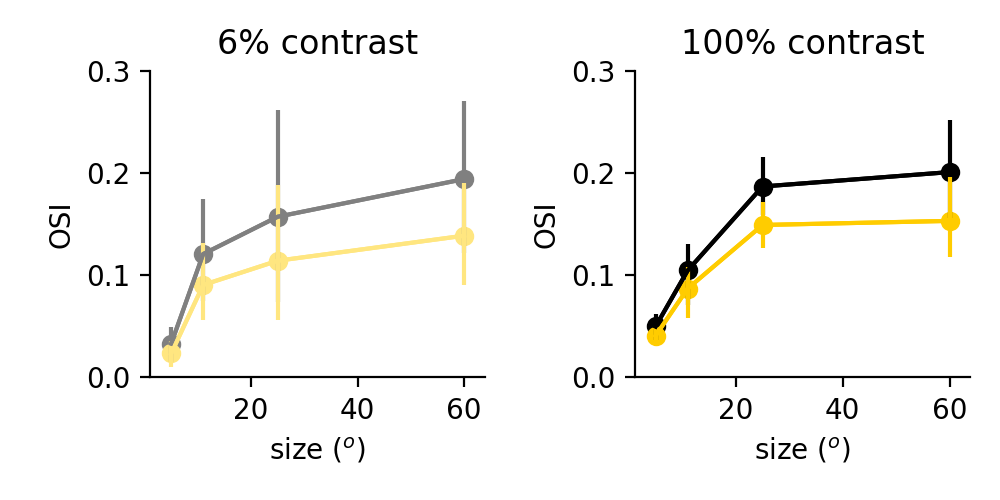

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.11812071622080982
0.15806322880984425


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [44]:
colors = [np.array(((0.5,0.5,0.5),(1,0.9,0.5))),np.array(((0,0,0),(1,0.8,0)))]
reload(ut)
for osi in [osi_halo,osi_halo_sim]:
    plt.figure(figsize=(5,2.5))
    usize = np.array((5,11,25,60))
    ucontrast = np.array((0,6,12,25,50,100))
    for iicontrast,icontrast in enumerate([1,5]):
        plt.subplot(1,2,iicontrast+1)
        ut.plot_bootstrapped_errorbars_hillel(usize,osi[:,:,icontrast,:].transpose((0,2,1)),colors=colors[iicontrast])
        plt.xlabel('size ($^o$)')
        plt.ylabel('OSI')
        plt.tight_layout()
        plt.ylim((0,0.3))
        plt.title('%d%% contrast'%ucontrast[icontrast])
        ut.erase_top_right()
        

In [181]:
def opto_transform(x,h):
    u = safe_log(x-x0)/(1-alpha_halo)
    transformed = x0 + np.exp((1-alpha_halo)*(u+h))
    return transformed

<IPython.core.display.Javascript object>


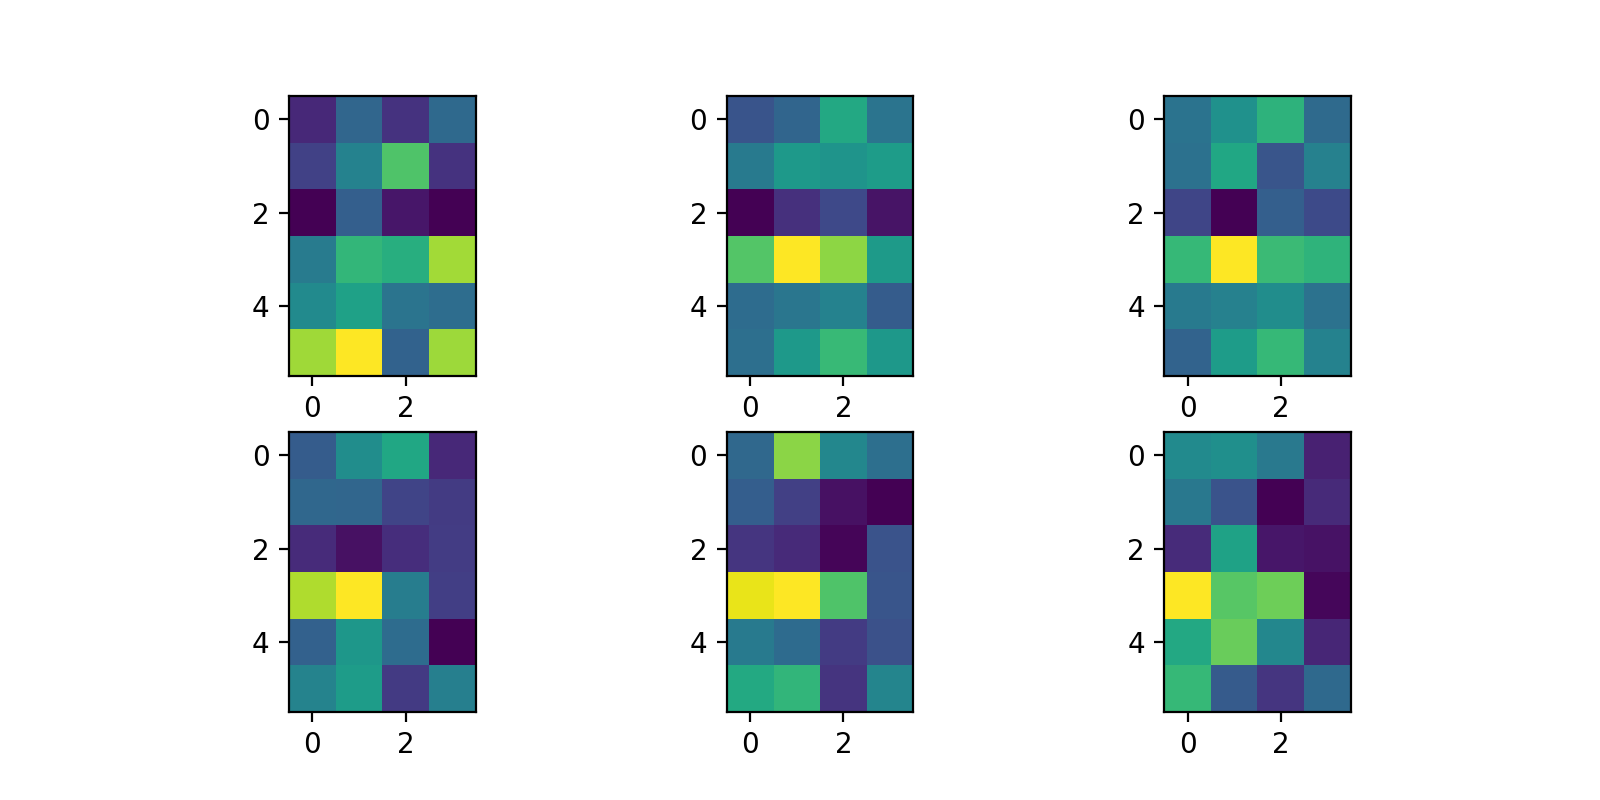

In [183]:
# plt.figure(figsize=(5,2.5))
# plt.subplot(1,2,1)
# plt.scatter(scall_halo_sim[:,:,:,0].flatten(),scall_halo_sim[:,:,:,1].flatten(),s=5)
# plt.plot((0,4),(0,4))
# plt.subplot(1,2,2)
# plt.scatter(scall_halo[:,:,:,:,0].flatten(),scall_halo[:,:,:,:,1].flatten(),s=5)
# plt.plot((0,4),(0,4))

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(np.nanmean(scall_halo_sim[:,:,:,0],0).flatten(),np.nanmean(scall_halo_sim[:,:,:,1],0).flatten(),s=5)
plt.plot((0,4),(0,4),c='k')
plt.subplot(1,2,2)
xdata_halo = np.zeros((0,))
ydata_halo = np.zeros((0,))
for angles in [[0,4],[2,6]]:
    xdata_halo = np.concatenate((xdata_halo,np.nanmean(scall_halo[:,:,:,angles,0],0).flatten()))
    ydata_halo = np.concatenate((ydata_halo,np.nanmean(scall_halo[:,:,:,angles,1],0).flatten()))
    plt.scatter(np.nanmean(scall_halo[:,:,:,angles,0],0).flatten(),np.nanmean(scall_halo[:,:,:,angles,1],0).flatten(),s=5)

xdata_chrimson = np.zeros((0,))
ydata_chrimson = np.zeros((0,))
for angles in [[0,4],[2,6]]:
    xdata_chrimson = np.concatenate((xdata_chrimson,np.nanmean(scall_chrimson[:,:,:,angles,0],0).flatten()))
    ydata_chrimson = np.concatenate((ydata_chrimson,np.nanmean(scall_chrimson[:,:,:,angles,1],0).flatten()))
    plt.scatter(np.nanmean(scall_chrimson[:,:,:,angles,0],0).flatten(),np.nanmean(scall_chrimson[:,:,:,angles,1],0).flatten(),s=5)
# plt.plot(np.linspace(0.5,3,100),opto_transform(np.linspace(0.5,3,100),-1),c='k')
# plt.plot(np.linspace(0.5,3,100),opto_transform(np.linspace(0.5,3,100),h),c='k')

# plt.scatter(scall_halo_sim[:,:,:,0].flatten(),scall_halo_sim[:,:,:,1].flatten(),s=5)
# plt.scatter(scall_chrimson_sim[:,:,:,0].flatten(),scall_chrimson_sim[:,:,:,1].flatten(),s=5)

slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_chrimson, ydata_chrimson)
plt.plot(np.linspace(0.5,3,100),alpha_chrimson*(np.linspace(0.5,3,100)-x0)+x0,c='r')
slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_halo, ydata_halo)
plt.plot(np.linspace(0.5,3,100),alpha_halo*(np.linspace(0.5,3,100)-x0)+x0,c=np.array((1,0.8,0)))

plt.plot((0,4),(0,4),c='k')

In [192]:
data = np.nanmean(np.diff(scall_chrimson,axis=4)[:,:,:,[0,4],0],3)

<IPython.core.display.Javascript object>


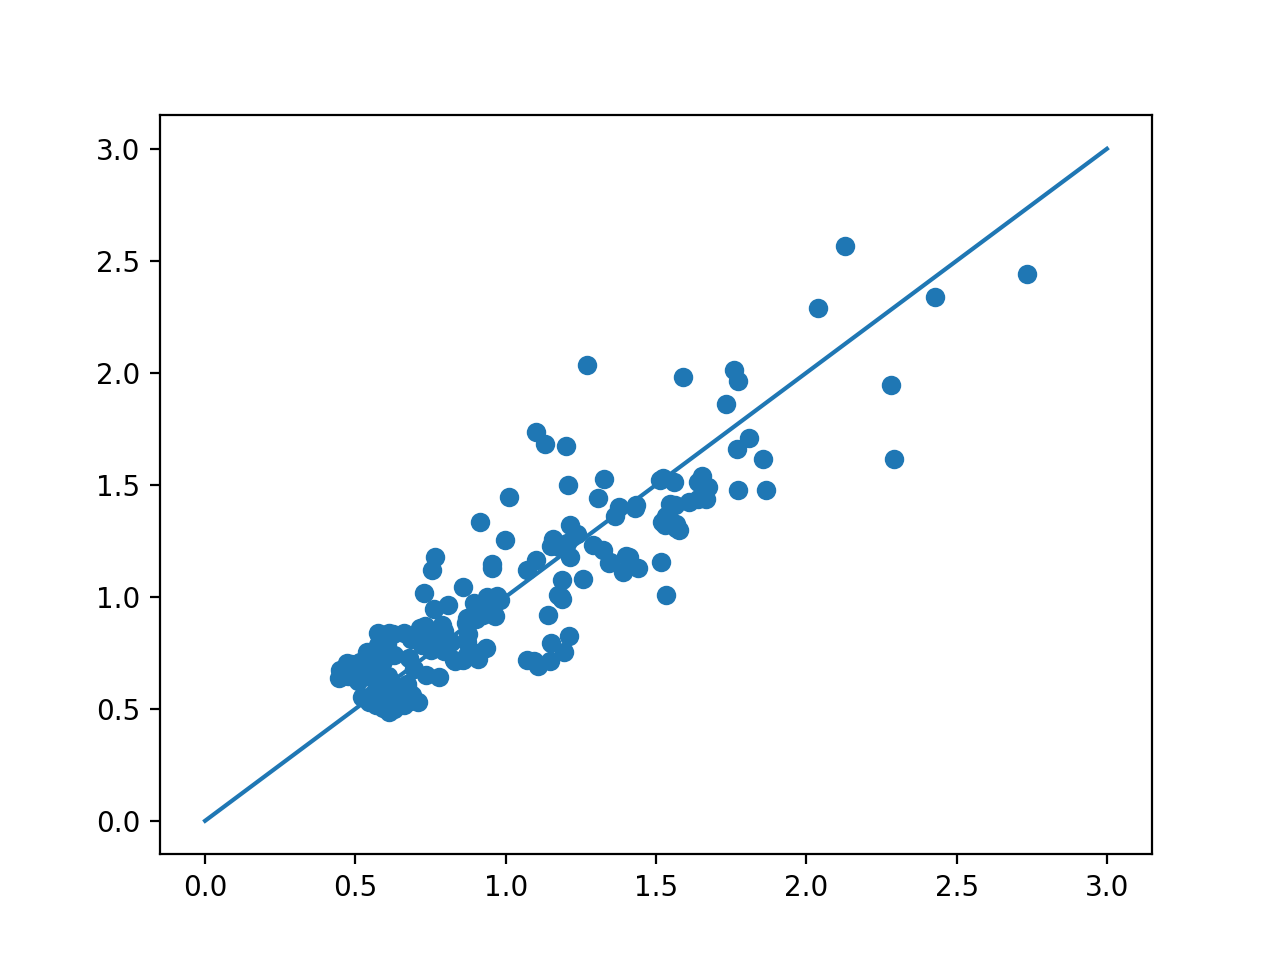

In [180]:
plt.figure()
plt.scatter(np.nanmean(scall_chrimson[:,:,:,:,0],0),np.nanmean(scall_halo[:,:,:,:,0],0))
plt.plot((0,3),(0,3))

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


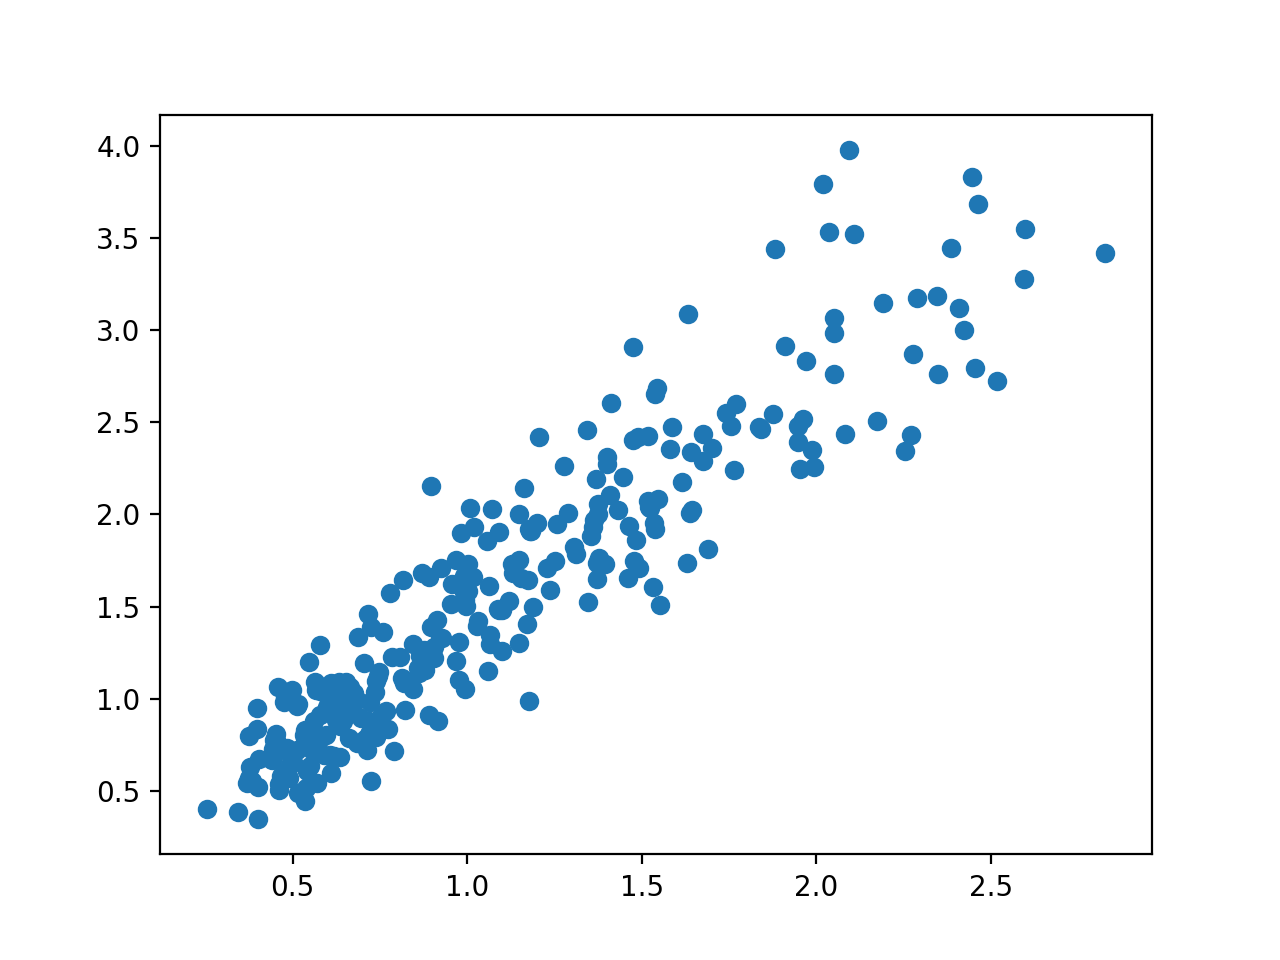

In [1112]:
plt.figure()
plt.scatter(xdata,ydata)
slope, intercept, r_value, p_value, std_err = sst.linregress(xdata, ydata)
xtemp = np.linspace(0.5,3,10)
# scall_halo_lin = np.nanmean(scall_halo,0)
# scall_halo_lin[:,:,:,1] = scall_halo_lin[:,:,:,0]*slope + intercept
scall_halo_lin = scall_halo.copy()
scall_halo_lin[:,:,:,:,1] = scall_halo_lin[:,:,:,:,0]*slope + intercept
# plt.scatter(scall_halo_lin[:,:,:,:,0].flatten(),scall_halo_lin[:,:,:,:,1].flatten())


In [17]:
from importlib import reload
reload(ut)
# osi_halo = ut.compute_osi(scall_halo,np.arange(0,360,45))
# osi_halo_sim = ut.compute_osi(scall_halo_sim,np.arange(0,360,45))
# osi_halo_lin = ut.compute_osi(scall_halo_lin,np.arange(0,360,45))
scalls = [scall_halo,scall_halo_exp,scall_chrimson,scall_chrimson_exp]
osis = [ut.compute_osi(scall,np.arange(0,360,45)) for scall in scalls]
[osi_halo,osi_halo_exp,osi_chrimson,osi_chrimson_exp] = osis
smis = [np.nanmean(scall,3)[:,-1]/np.max(np.nanmean(scall,3),1) for scall in scalls]

scalls = [scall_halo_sim,scall_chrimson_sim]
smis = smis + [scall[:,-1]/np.max(scall,1) for scall in scalls]
[smi_halo,smi_halo_exp,smi_chrimson,smi_chrimson_exp,smi_halo_sim,smi_chrimson_sim] = smis


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


In [25]:
scalls = [scall_halo,scall_halo_exp,scall_chrimson,scall_chrimson_exp]
csis = [np.nanmean(scall,3)[:,:,1]/np.max(np.nanmean(scall,3),2) for scall in scalls]
[csi_halo,csi_halo_exp,csi_chrimson,csi_chrimson_exp] = csis

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


<IPython.core.display.Javascript object>


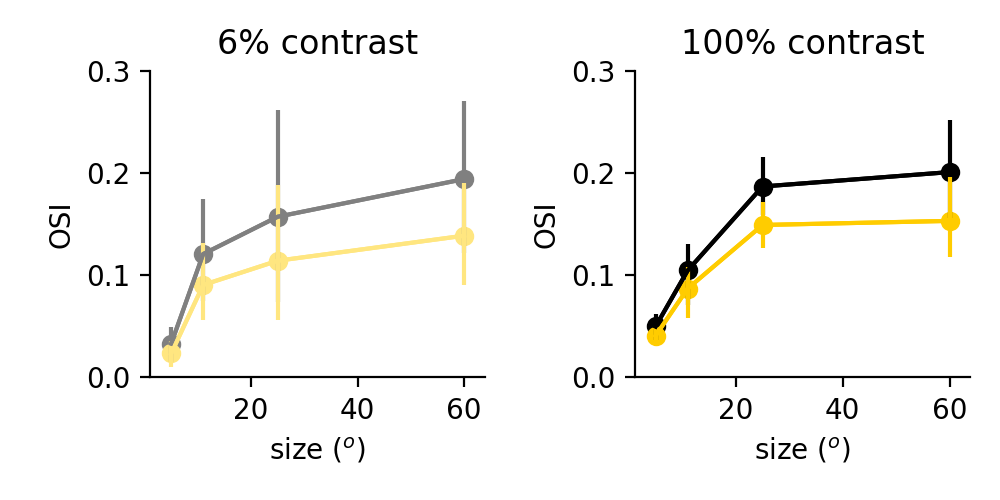

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.11812071622080982
0.15806322880984425


<IPython.core.display.Javascript object>


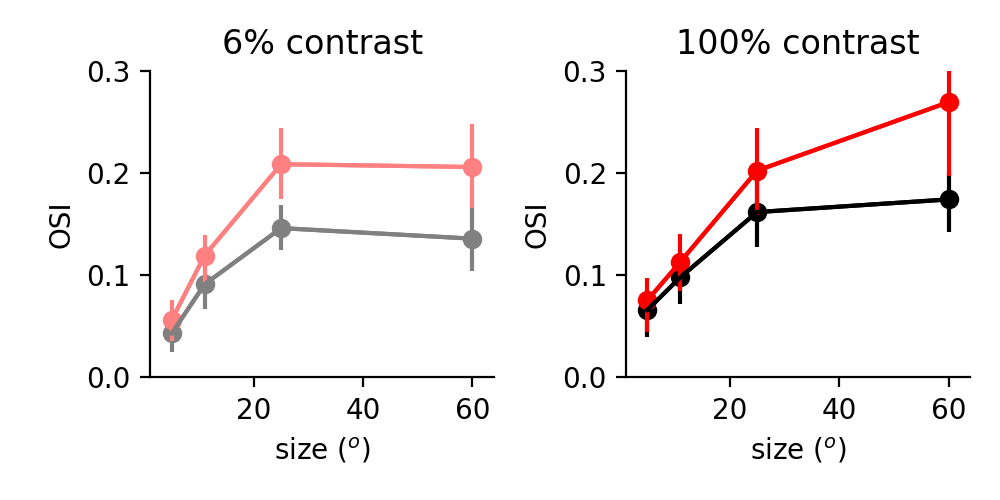

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.17273131487636206
0.21987182494723134


In [222]:
# colors = [np.array(((0.5,0.5,0.5),(1,0.9,0.5))),np.array(((0,0,0),(1,0.8,0)))]
colorses = [[np.array(((0.5,0.5,0.5),(1,0.9,0.5))),np.array(((0,0,0),(1,0.8,0)))],[np.array(((0.5,0.5,0.5),(1,0.5,0.5))),np.array(((0,0,0),(1,0,0)))]]
reload(ut)
# osi = osi_halo_sim
filenames = ['figures/osi_exp_pred_halo.eps','figures/osi_exp_pred_chrimson.eps']
osis = [osi_halo_sim,osi_chrimson_sim]
for osi,filename,colors in zip(osis,filenames,colorses):
    plt.figure(figsize=(5,2.5))
    usize = np.array((5,11,25,60))
    ucontrast = np.array((0,6,12,25,50,100))
    for iicontrast,icontrast in enumerate([1,5]):
        plt.subplot(1,2,iicontrast+1)
    #     ut.plot_bootstrapped_errorbars_hillel(usize,osi[np.newaxis,:,icontrast,:].transpose((0,2,1)),colors=colors[iicontrast])
        ut.plot_bootstrapped_errorbars_hillel(usize,osi[:,:,icontrast,:].transpose((0,2,1)),colors=colors[iicontrast])
        plt.xlabel('size ($^o$)')
        plt.ylabel('OSI')
        plt.tight_layout()
        plt.ylim((0,0.3))
        plt.title('%d%% contrast'%ucontrast[icontrast])
        ut.erase_top_right()
    plt.savefig(filename)

In [41]:
# colors = [np.array(((0.5,0.5,0.5),(1,0.9,0.5))),np.array(((0,0,0),(1,0.8,0)))]
colorses = [[np.array(((0.5,0.5,0.5),(1,0.9,0.5))),np.array(((0,0,0),(1,0.8,0)))],[np.array(((0.5,0.5,0.5),(1,0.5,0.5))),np.array(((0,0,0),(1,0,0)))]]
reload(ut)
# osi = osi_halo_sim
filenames = ['figures/osi_linear_pred_halo.eps','figures/osi_linear_pred_chrimson.eps']
osis = [osi_halo_sim,osi_chrimson_sim]
for osi,filename,colors in zip(osis,filenames,colorses):
    plt.figure(figsize=(5,2.5))
    usize = np.array((5,11,25,60))
    ucontrast = np.array((0,6,12,25,50,100))
    for iicontrast,icontrast in enumerate([1,5]):
        plt.subplot(1,2,iicontrast+1)
    #     ut.plot_bootstrapped_errorbars_hillel(usize,osi[np.newaxis,:,icontrast,:].transpose((0,2,1)),colors=colors[iicontrast])
        ut.plot_bootstrapped_errorbars_hillel(usize,osi[:,:,icontrast,:].transpose((0,2,1)),colors=colors[iicontrast])
        plt.xlabel('size ($^o$)')
        plt.ylabel('OSI')
        plt.tight_layout()
        plt.ylim((0,0.3))
        plt.title('%d%% contrast'%ucontrast[icontrast])
        ut.erase_top_right()
#     plt.savefig(filename)

NameError: name 'osi_halo_sim' is not defined

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


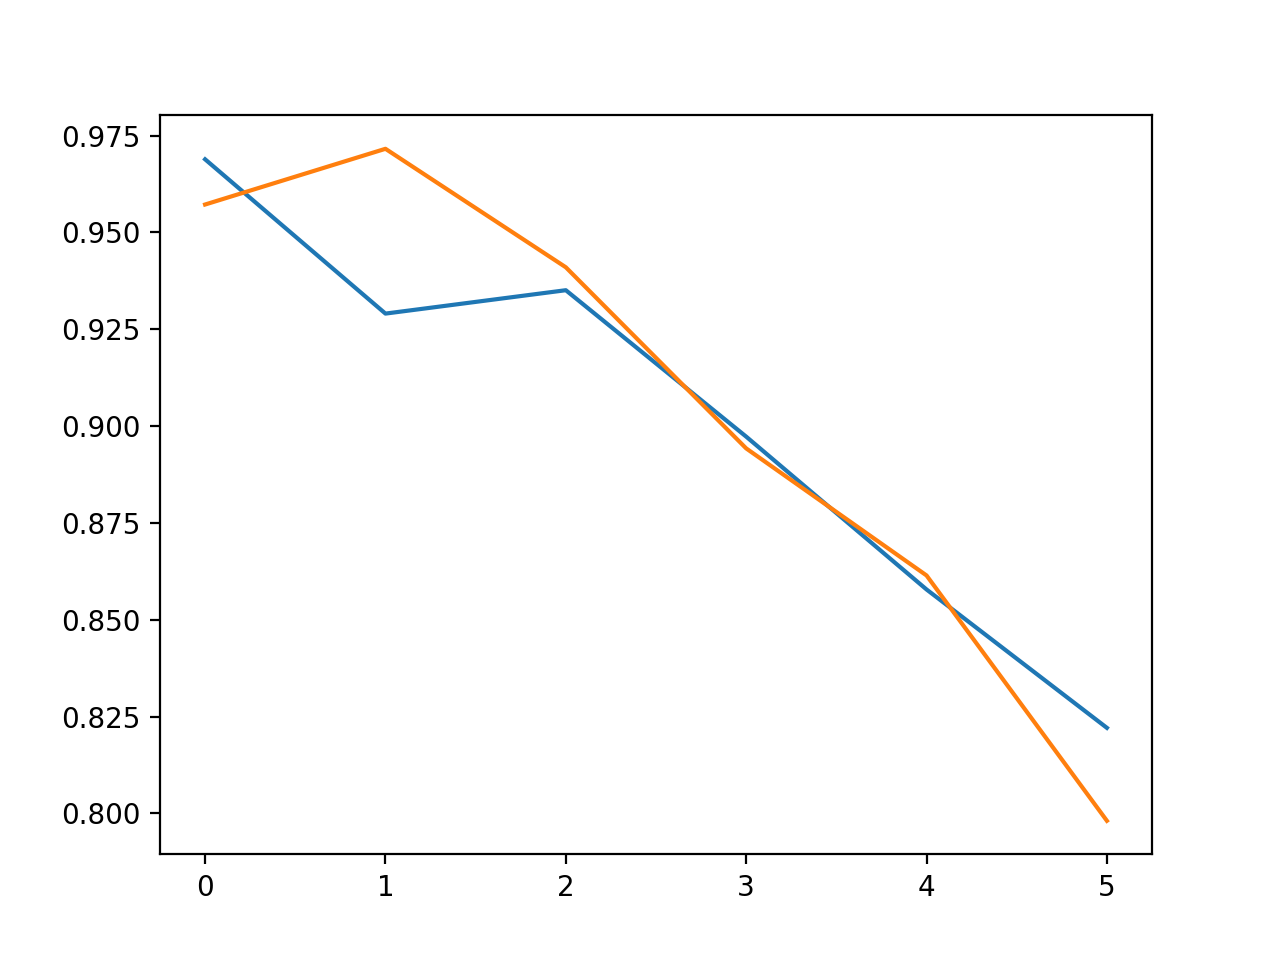

In [214]:
plt.figure()
plt.plot(np.nanmean(smi_chrimson_sim[:,:,:],0))

In [204]:
smi_chrimson_sim.shape

(89, 6, 2)

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


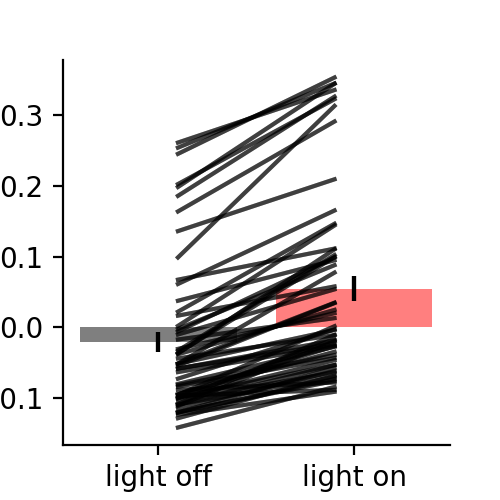

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


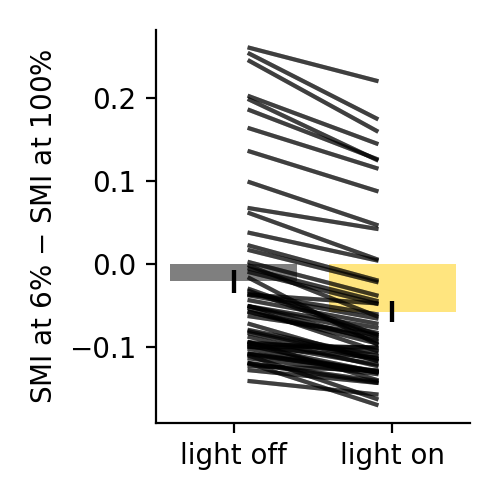

In [258]:
reload(ut)

lim = np.array((0,0.33))

smimi = smi_chrimson_sim[:,1,:] - smi_chrimson_sim[:,5,:]

top_smimi = np.ones((smimi.shape[0],),dtype='bool')
# top_smimi = (smimi[:,1] - smimi[:,0]) == np.max(smimi[:,1] - smimi[:,0])
# lkat = (smimi[:,1] - smimi[:,0]) > np.percentile(smimi[:,1] - smimi[:,0],90)

plt.figure(figsize=(2.5,2.5))
ut.plot_bars_with_lines(smimi,plot_lines=True,colors=['k','r'])
# plt.ylim(lim)
ut.erase_top_right()
plt.ylabel('SMI at 6% $-$ SMI at 100%')

smimi = smi_halo_sim[:,1,:] - smi_halo_sim[:,5,:]

plt.figure(figsize=(2.5,2.5))
ut.plot_bars_with_lines(smimi,plot_lines=True,colors=['k',np.array((1,0.8,0))])
# plt.ylim(lim)
ut.erase_top_right()
plt.ylabel('SMI at 6% $-$ SMI at 100%')
plt.tight_layout()


/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


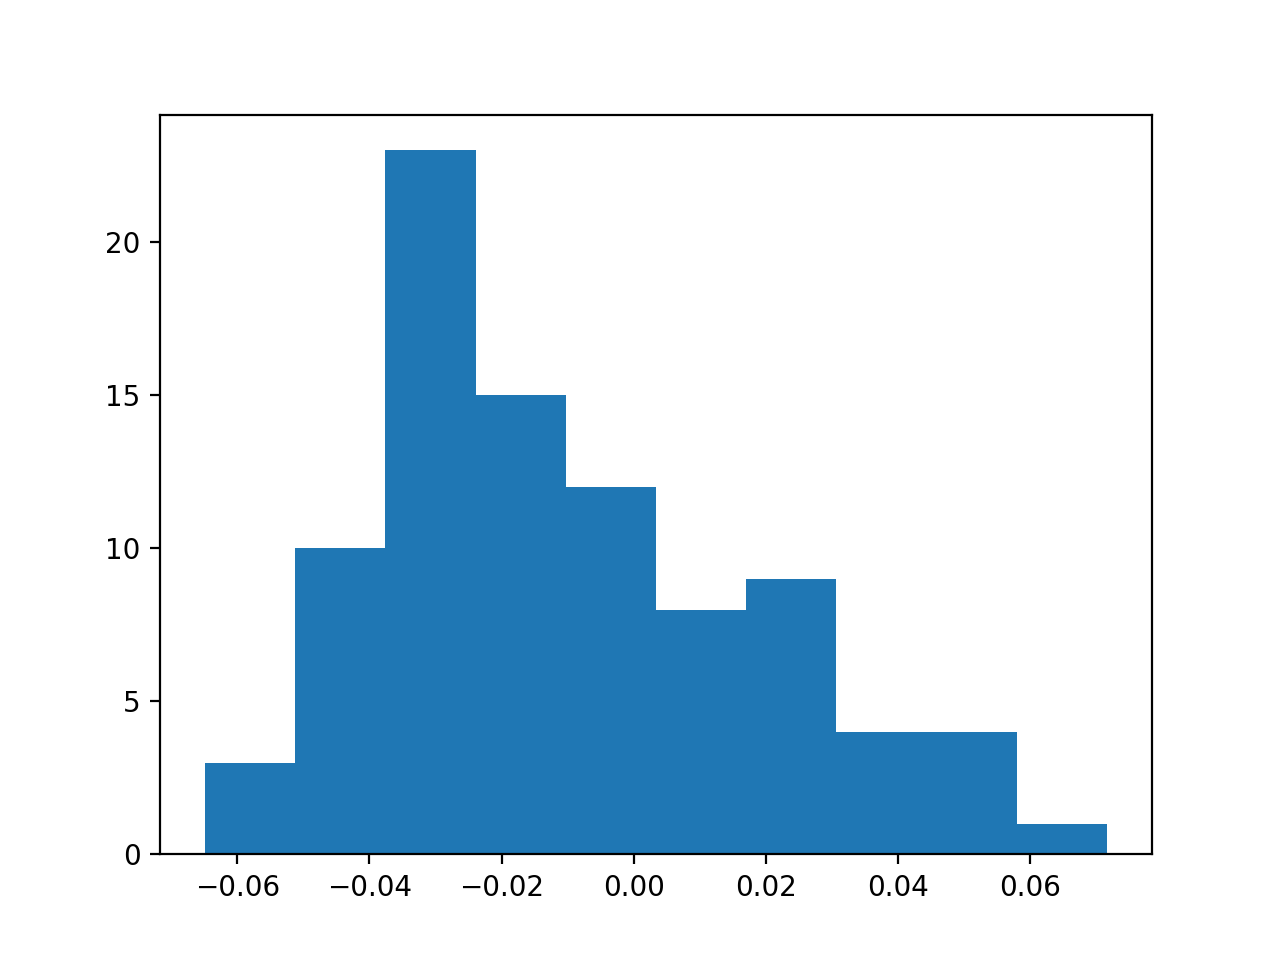

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


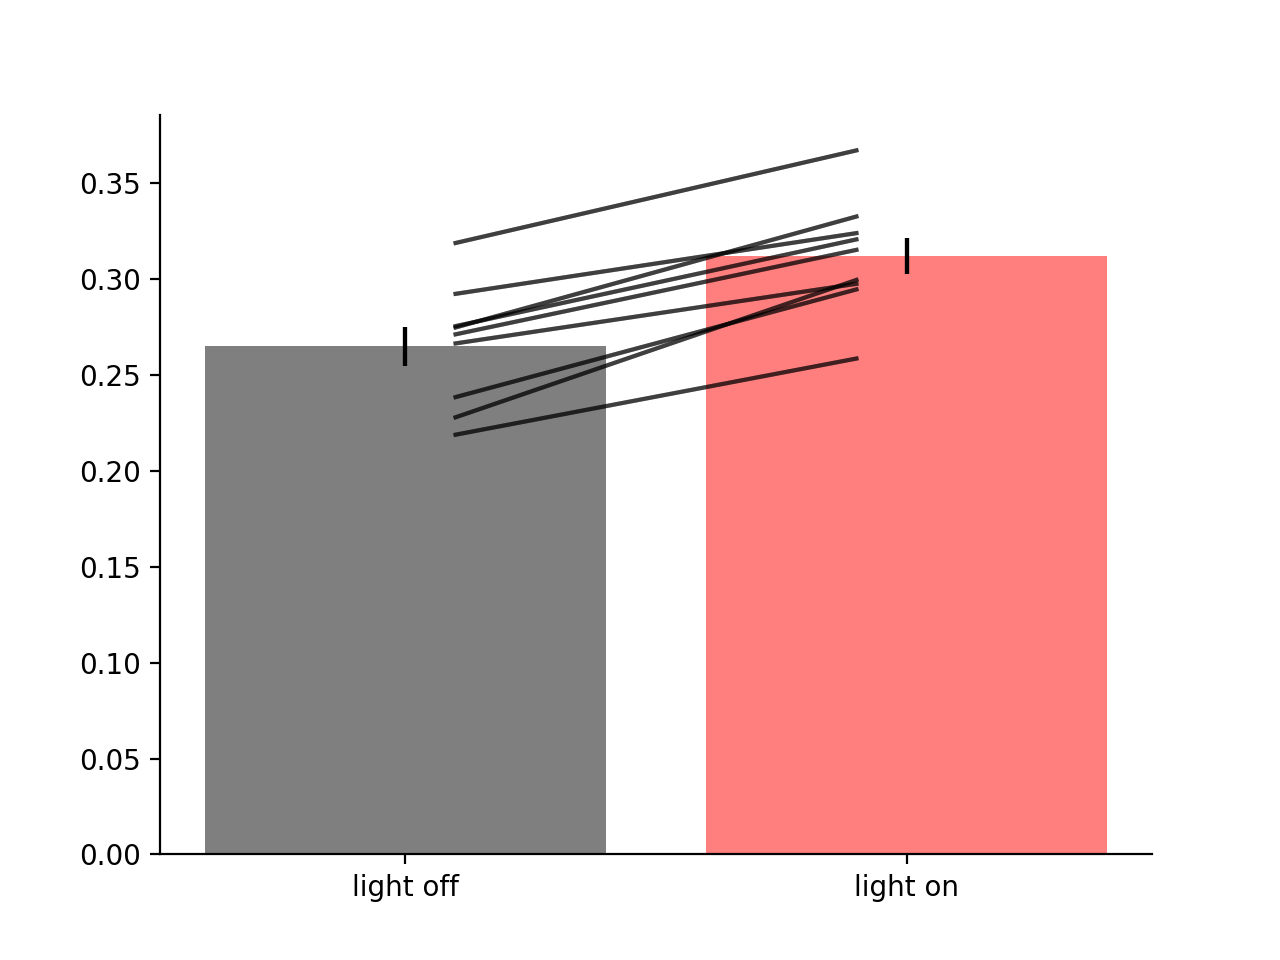

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


<IPython.core.display.Javascript object>


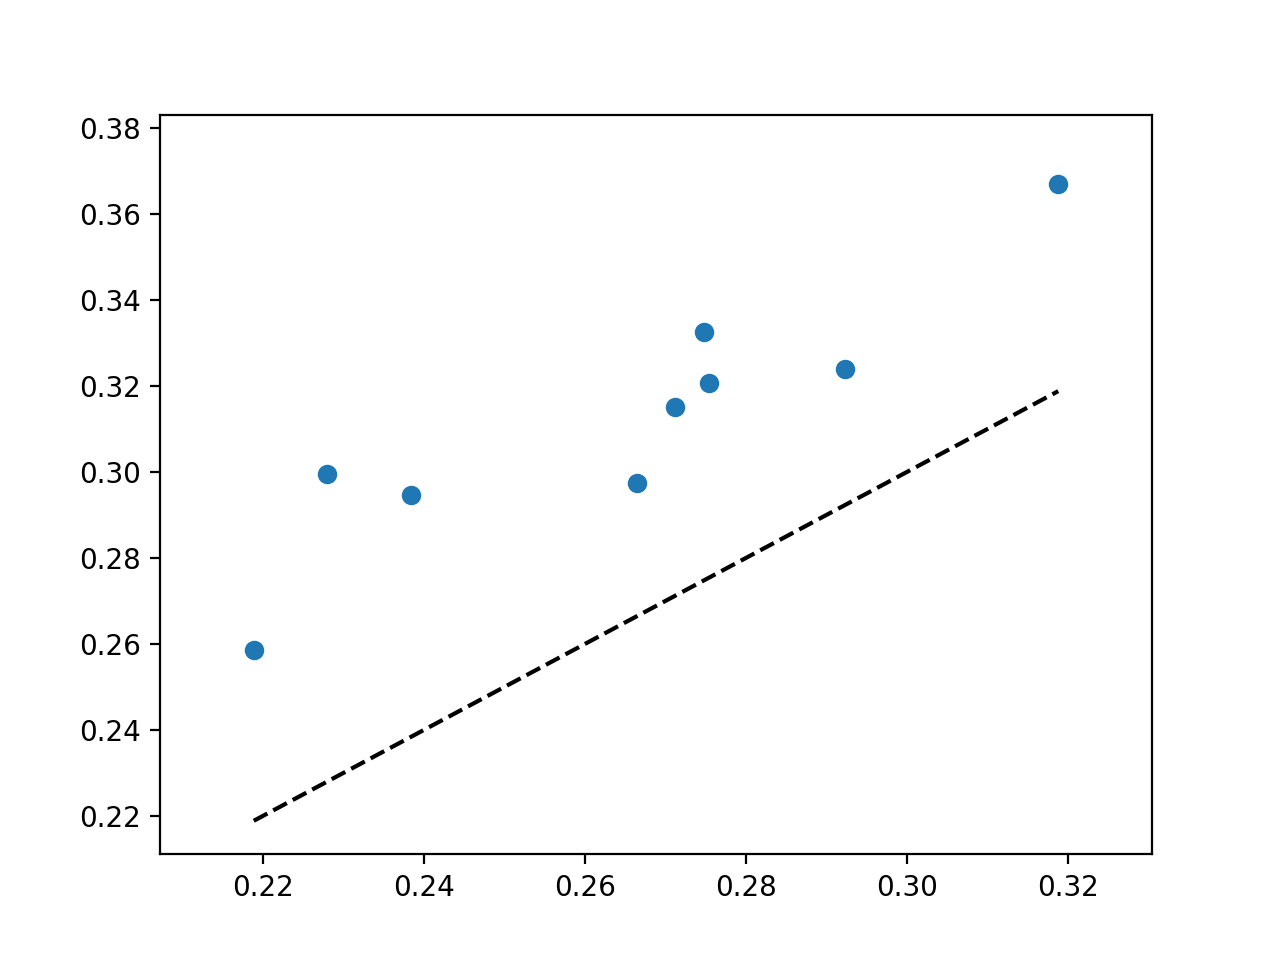

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


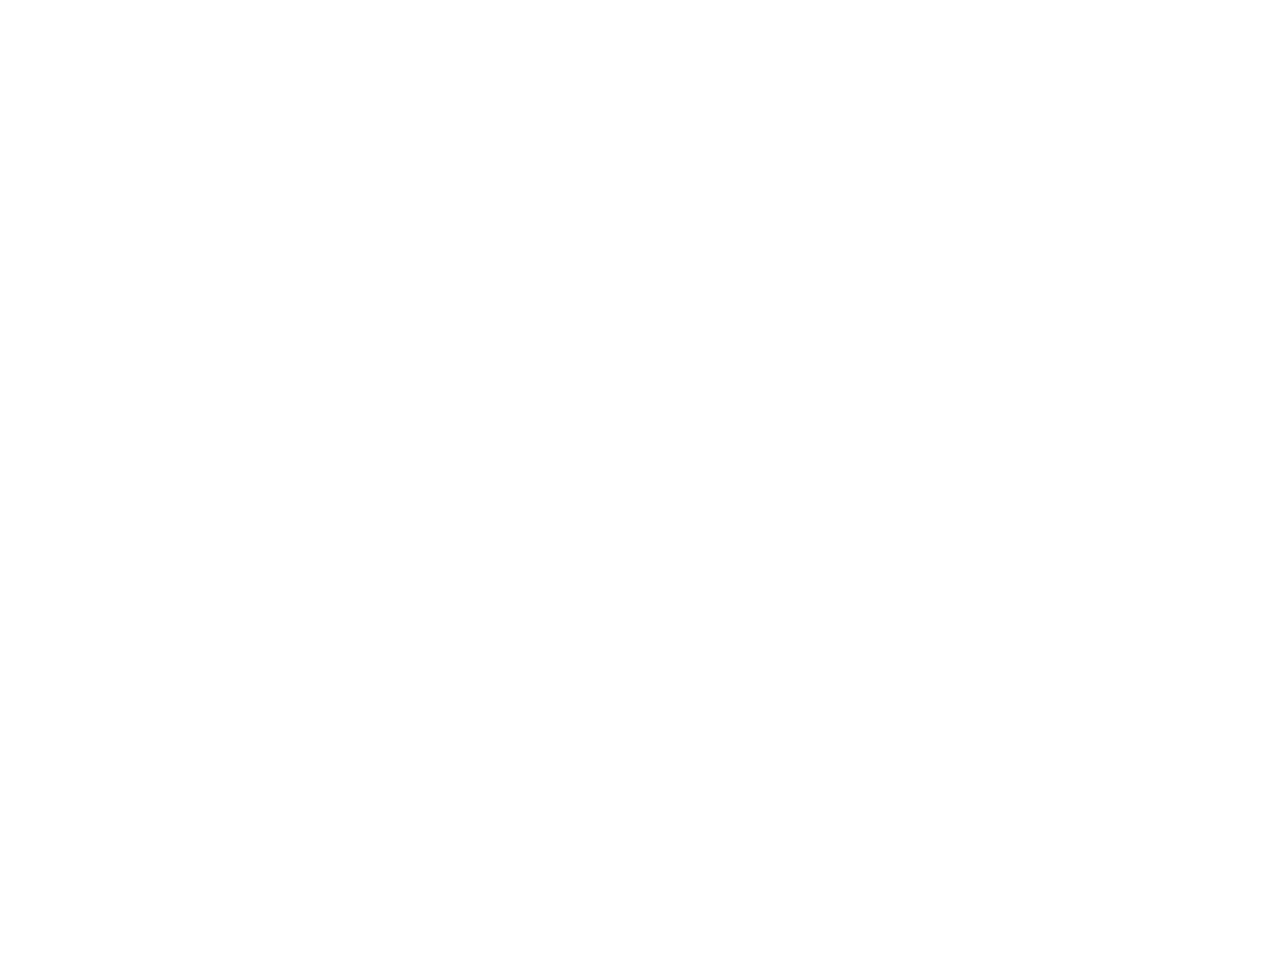

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


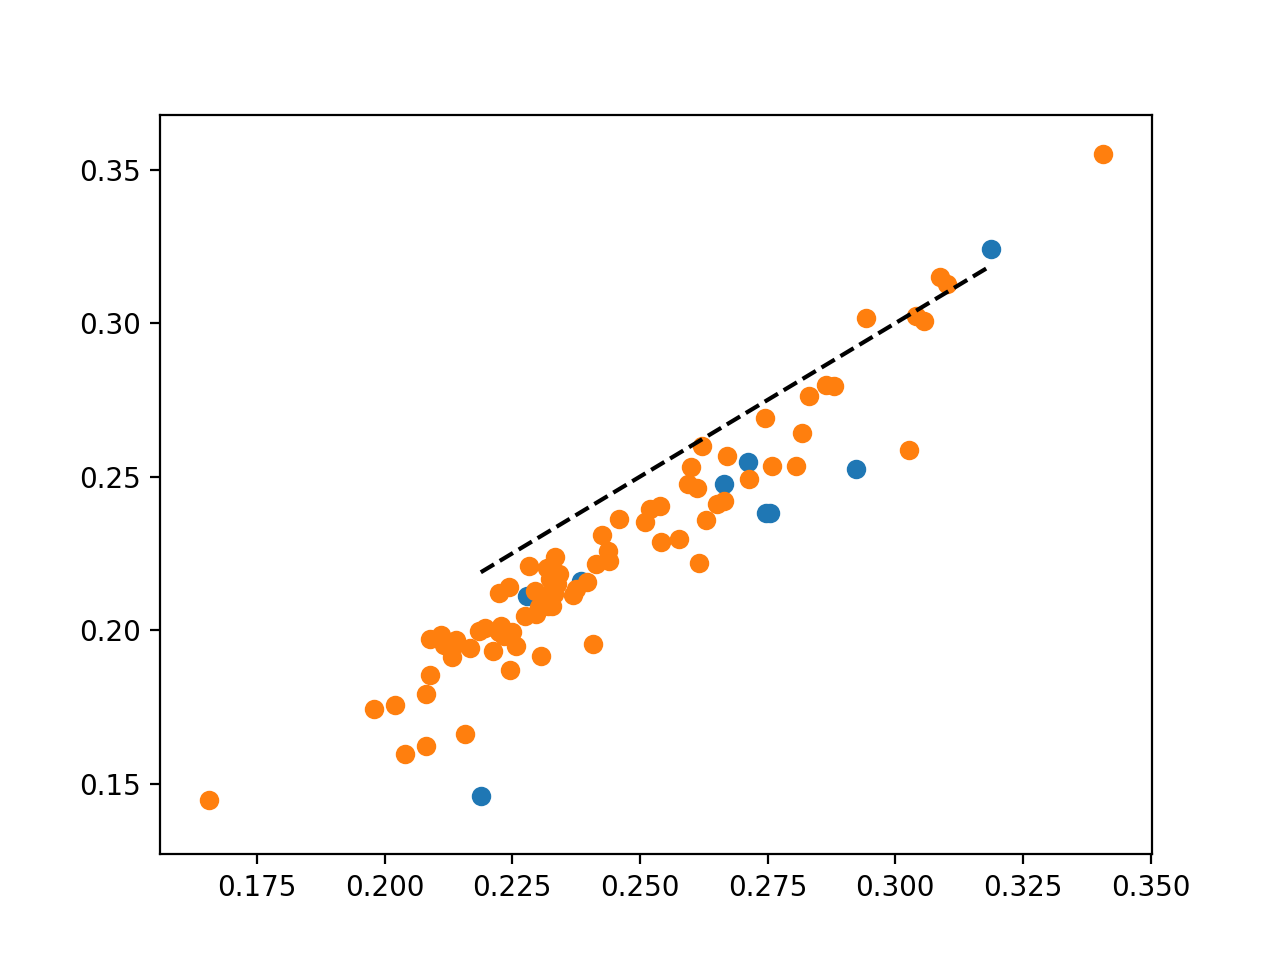

In [162]:
import pyute as ut
reload(ut)

smimi = smi_chrimson_sim[:,1,:] - smi_chrimson_sim[:,5,:]

# lkat = (smimi[:,1] - smimi[:,0]) == np.max(smimi[:,1] - smimi[:,0])
lkat = (smimi[:,1] - smimi[:,0]) > np.percentile(smimi[:,1] - smimi[:,0],90)

plt.figure()
plt.hist(smimi[:,1]-smimi[:,0])


plt.figure()
plt.scatter(smimi[lkat,0],smimi[lkat,1])
x = np.array((smimi[lkat,0].min(),smimi[lkat,0].max()))
plt.plot(x,x,c='k',linestyle='dashed')

plt.figure()


smimi = smi_halo_sim[:,1,:] - smi_halo_sim[:,5,:]

plt.figure()
plt.scatter(smimi[lkat,0],smimi[lkat,1])
plt.scatter(smimi[~lkat,0],smimi[~lkat,1])
x = np.array((smimi[lkat,0].min(),smimi[lkat,0].max()))
plt.plot(x,x,c='k',linestyle='dashed')

/Users/dan/Documents/code/adesnal/pyute.py:140: RuntimeWarning: Mean of empty slice
  stat = fn(resamp,axis=axis)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row 

0.8683669932923294
linewidth: 1
plotting
linewidth: 1
plotting
0.6324654177973366
linewidth: 1
plotting
linewidth: 1
plotting


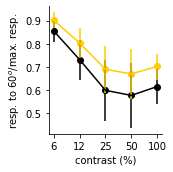

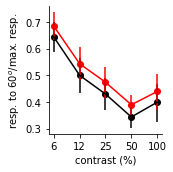

In [22]:
# colors = [np.array(((0.5,0.5,0.5),(1,0.9,0.5))),np.array(((0,0,0),(1,0.8,0)))]
colorses = [np.array(((0,0,0),(1,0.8,0))),np.array(((0,0,0),(1,0,0)))]*3
from importlib import reload
reload(ut)
# osi = osi_halo_sim
filenames = ['figures/smi_exp_pred_halo.eps','figures/smi_exp_pred_chrimson.eps','','','','']
smis = [smi_halo_exp,smi_chrimson_exp]#,smi_halo_sim[lkat],smi_chrimson_sim[lkat],smi_halo,smi_chrimson]
for smi,filename,colors in zip(smis,filenames,colorses):
    plt.figure(figsize=(2.5,2.5))
    ucontrast = [0,6,12,25,50,100]
    ut.plot_bootstrapped_errorbars_hillel(np.arange(1,6),smi[:,1:].transpose((0,2,1)),pct=(16,84),colors=colors)
    plt.xticks(np.arange(1,6),ucontrast[1:])
    # for icontrast in range(1,smi.shape[1]):
    #     _,p = sst.wilcoxon(smi[:,icontrast,0],smi[:,icontrast,1])
    #     plt.text(ucontrast[icontrast],0.8,'%.2f'%p)
    plt.xlabel('contrast (%)')
    plt.ylabel('resp. to 60$^o$/max. resp.')
    # plt.legend(['light off','light on'])
    plt.tight_layout()
    ut.erase_top_right()
#     plt.savefig(filename)
    

In [27]:
csis[0].shape

(6, 4, 2)

/Users/dan/Documents/code/adesnal/pyute.py:140: RuntimeWarning: Mean of empty slice
  stat = fn(resamp,axis=axis)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row 

0.7746674656461039
linewidth: 1
plotting
linewidth: 1
plotting
0.7397276006462762
linewidth: 1
plotting
linewidth: 1
plotting


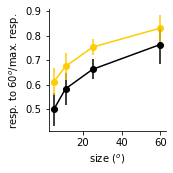

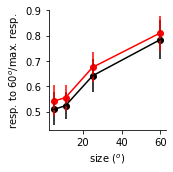

In [32]:
# colors = [np.array(((0.5,0.5,0.5),(1,0.9,0.5))),np.array(((0,0,0),(1,0.8,0)))]
colorses = [np.array(((0,0,0),(1,0.8,0))),np.array(((0,0,0),(1,0,0)))]*3
from importlib import reload
reload(ut)
# osi = osi_halo_sim
filenames = ['figures/csi_exp_pred_halo.eps','figures/csi_exp_pred_chrimson.eps','','','','']
csis = [csi_halo_exp,csi_chrimson_exp]#,smi_halo_sim[lkat],smi_chrimson_sim[lkat],smi_halo,smi_chrimson]
for csi,filename,colors in zip(csis,filenames,colorses):
    plt.figure(figsize=(2.5,2.5))
    usize = [5,11,25,60]#[0,6,12,25,50,100]
    ut.plot_bootstrapped_errorbars_hillel(usize,csi.transpose((0,2,1)),pct=(16,84),colors=colors)
    plt.xticks((20,40,60))
#     plt.xticks(np.arange(1,6),ucontrast[1:])
    # for icontrast in range(1,smi.shape[1]):
    #     _,p = sst.wilcoxon(smi[:,icontrast,0],smi[:,icontrast,1])
    #     plt.text(ucontrast[icontrast],0.8,'%.2f'%p)
    plt.xlabel('size ($^o$)')
    plt.ylabel('resp. to 60$^o$/max. resp.')
    # plt.legend(['light off','light on'])
    plt.tight_layout()
    ut.erase_top_right()
    plt.savefig(filename)
    

In [21]:
smi_halo_exp.shape

(6, 6, 2)

In [260]:
this_data. 

(56, 6, 6, 2)

In [261]:
hvals = [[h,h],[-1,-1]]

datas = [[scall_chrimson[:,:,:,iangle,:] for iangle in range(8)],[scall_halo[:,:,:,iangle,:] for iangle in range(8)]]
xs = [[xvals_chrimson[:,:,:,iangle,0] for iangle in range(8)],[xvals_halo[:,:,:,iangle,0] for iangle in range(8)]]
files = ['figures/vip_chrimson_effect_from_exponential.jpg','figures/vip_halo_effect_from_exponential.jpg']
xbds = np.array((-10,5))
# colors = ['k','k']
colors = [np.array((1,0,0)),np.array((1,0.8,0))]
alpha = [None,0.2,0.5]
for idata in range(2):
    plt.figure(figsize=(7.5,2.5))
    for ipanel in range(3):
        plt.subplot(1,3,ipanel+1)
        iangle = 0
        for data,this_h,xval in zip(datas[idata],hvals[idata],xs[idata]):
            this_data = data.copy()
            this_data[:,:,0] = np.nanmean(this_data[:,:,0],1)[:,np.newaxis]
            lkat = ~np.isnan(this_data.sum(1).sum(1).sum(1))
            if ipanel==0:
                sca.scatter_size_contrast_errorbar(xval[lkat],this_data[lkat,:,:,0],equality_line=False,equate_0=True,colormap=plt.cm.viridis)#plt.cm.gray_r)
                plt.ylabel('PC event rate/mean')
                plt.title('light off')
            if ipanel==1:
                sca.scatter_size_contrast_errorbar(xval[lkat]+this_h,this_data[lkat,:,:,1],equality_line=False,equate_0=True,colormap=plt.cm.viridis)#plt.cm.gray_r)
                plt.title('light on')
                if iangle==0:
                    base = np.nanmedian(xval)
                    plt.arrow(base,0.5,this_h,0,color=colors[idata],head_width=0.2)
            if ipanel==1 or ipanel==2:
                mean_data = np.nanmean(this_data[lkat],0).reshape((-1,2))
                xflat = np.nanmean(xval[lkat],0).flatten()[:,np.newaxis]
                mean_xval = np.concatenate((xflat,xflat+this_h*np.ones_like(xflat)),axis=1)
                for iline in range(mean_data.shape[0]):
                    plt.plot(mean_xval[iline,:],mean_data[iline,:],c=colors[idata],alpha=alpha[ipanel])
            if ipanel==2:
                plt.title('difference')
            xplot = np.linspace(*xbds,100)
            plt.plot(xplot,x0+np.exp((1-alpha_halo)*xplot),c='k',linestyle='dashed',alpha=0.1)
            plt.xlim(xbds)
            plt.ylim((0,4.5))
            plt.xlabel('pop. activity coordinate (a.u.)')
            iangle = iangle+1
            ut.erase_top_right()
    plt.tight_layout()
    plt.savefig(files[idata],dpi=300)


NameError: name 'h' is not defined

In [ ]:
sigma2 = sigma2
offset = offset
amplitude = amplitude
hvals = [[hs[0],hs[0]],[hs[1],hs[1]]]

datas = [[YY_chrimson_orig,YY_chrimson_orth],[YY_halo_orig,YY_halo_orth]]
files = ['figures/vip_chrimson_effect_from_nonlinearity.jpg','figures/vip_halo_effect_from_nonlinearity.jpg']
xbds = np.array((-5,3.5))
# colors = ['k','k']
colors = [np.array((1,0,0)),np.array((1,0.8,0))]
alpha = [None,0.2,0.5]
for idata in range(2):
    plt.figure(figsize=(7.5,2.5))
    for ipanel in range(3):
        plt.subplot(1,3,ipanel+1)
        iangle = 0
        for data,h in zip(datas[idata],hvals[idata]):
            this_data = data.copy()
            this_data[:,:,0] = np.nanmean(this_data[:,:,0],1)[:,np.newaxis]
            xval = invert_f_mt(this_data[:,:,:,0],sigma2=sigma2,offset=offset,amplitude=amplitude)
            if ipanel==0:
                sca.scatter_size_contrast_errorbar(xval,this_data[:,:,:,0],equality_line=False,equate_0=True,colormap=plt.cm.viridis)#plt.cm.gray_r)
                plt.ylabel('PC event rate/mean')
                plt.title('light off')
            if ipanel==1:
                sca.scatter_size_contrast_errorbar(xval+h,this_data[:,:,:,1],equality_line=False,equate_0=True,colormap=plt.cm.viridis)#plt.cm.gray_r)
                plt.title('light on')
                if iangle==0:
                    base = np.nanmedian(xval)
                    plt.arrow(base,0.5,h,0,color=colors[idata],head_width=0.2)
            if ipanel==1 or ipanel==2:
                mean_data = np.nanmean(this_data,0).reshape((-1,2))
                xflat = np.nanmean(xval,0).flatten()[:,np.newaxis]
                mean_xval = np.concatenate((xflat,xflat+h*np.ones_like(xflat)),axis=1)
                for iline in range(mean_data.shape[0]):
                    plt.plot(mean_xval[iline,:],mean_data[iline,:],c=colors[idata],alpha=alpha[ipanel])
            if ipanel==2:
                plt.title('difference')
            xplot = np.linspace(*xbds,100)
            plt.plot(xplot,f_mt(xplot,sigma2=sigma2,offset=offset,amplitude=amplitude),c='k',linestyle='dashed',alpha=0.1)
            plt.xlim(xbds)
            plt.ylim((0,4))
            plt.xlabel('pop. activity coordinate (a.u.)')
            iangle = iangle+1
            ut.erase_top_right()
    plt.tight_layout()
#     plt.savefig(files[idata],dpi=300)

In [582]:
datas = [[YY_chrimson_orig,YY_chrimson_orth],[YY_halo_orig,YY_halo_orth]]

In [583]:
nopto = len(datas)
added_data = [None for iopto in range(nopto)]
for iopto in range(nopto):
    nangle = len(datas[iopto])
    added_data[iopto] = [None for iangle in range(nangle)]
    for iangle in range(nangle):
        this_data = datas[iopto][iangle][:,:,1:,:]
        shp = this_data.shape
        added_data[iopto][iangle] = this_data.reshape((shp[0],-1,shp[3]))
    added_data[iopto] = np.concatenate(added_data[iopto],axis=1)


In [584]:
lkat = [np.isnan(ad).sum(1).sum(1)==0 for ad in added_data]
ranks = [np.argsort(ad[lk],axis=1) for ad,lk in zip(added_data,lkat)]
ranks_total = [np.argsort(np.nanmean(ad[lk],0),axis=0) for ad,lk in zip(added_data,lkat)]

In [585]:
iopto = 1
cc = [None for iopto in range(nopto)]
for iopto in range(nopto):
    nexpt = ranks[iopto].shape[0]
    cc[iopto] = np.zeros((nexpt,))
    for iexpt in range(nexpt):
        cc[iopto][iexpt] = np.corrcoef(ranks[iopto][iexpt,:,0],ranks[iopto][iexpt,:,1])[0,1]
cc_total = [None for iopto in range(nopto)]
for iopto in range(nopto):
    cc_total[iopto] = np.corrcoef(ranks_total[iopto][:,0],ranks_total[iopto][:,1])[0,1]

In [586]:
cc_total

[0.5225140712945592, 0.6609756097560976]

In [587]:
np.mean(cc[1])

0.41515009380863044

<IPython.core.display.Javascript object>


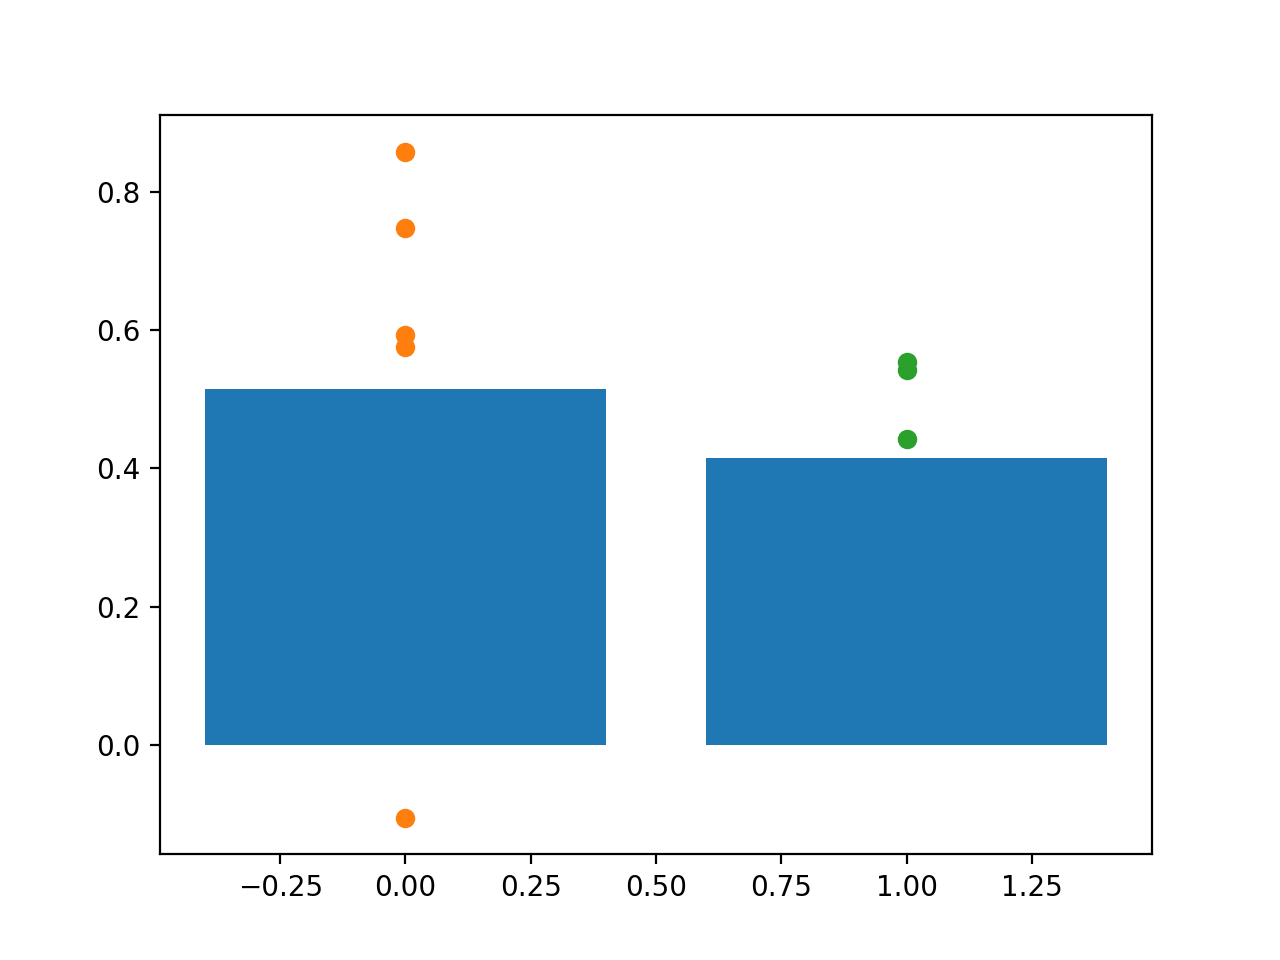

In [588]:
plt.figure()
plt.bar((0,1),(np.mean(cc[0]),np.mean(cc[1])))
for iopto in range(2):
    plt.scatter(iopto*np.ones_like(cc[iopto]),cc[iopto])

<IPython.core.display.Javascript object>


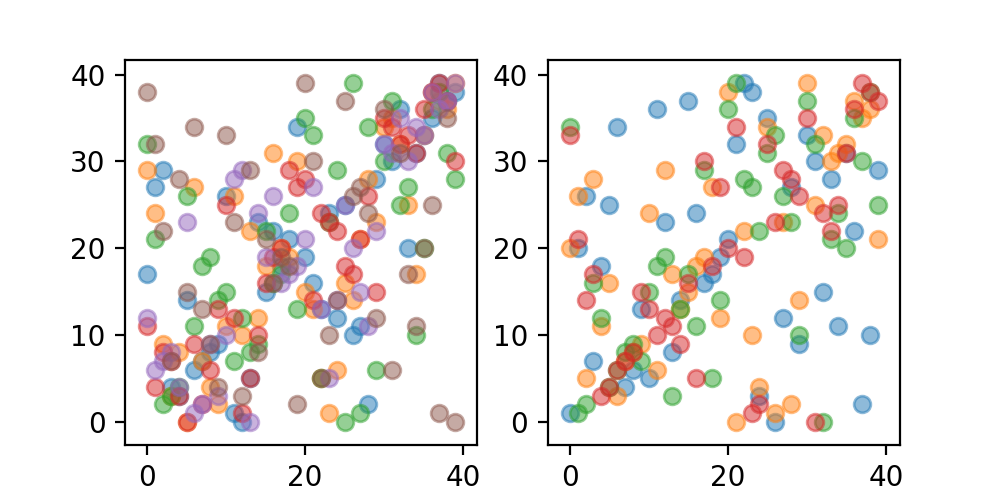

In [589]:
plt.figure(figsize=(5,2.5))
for iopto in range(nopto):
    plt.subplot(1,nopto,iopto+1)
    for iexpt in range(ranks[iopto].shape[0]):
        plt.scatter(ranks[iopto][iexpt,:,0],ranks[iopto][iexpt,:,1],alpha=0.5)

<IPython.core.display.Javascript object>


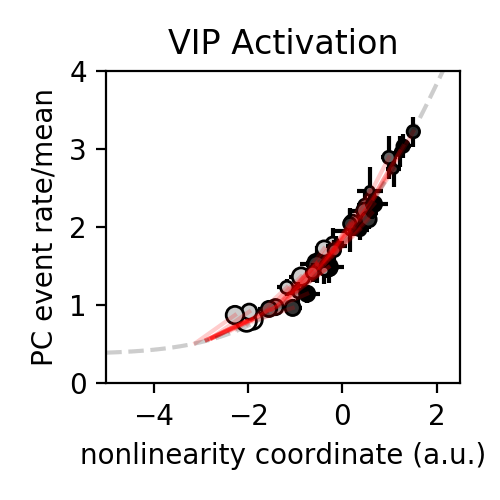

<IPython.core.display.Javascript object>


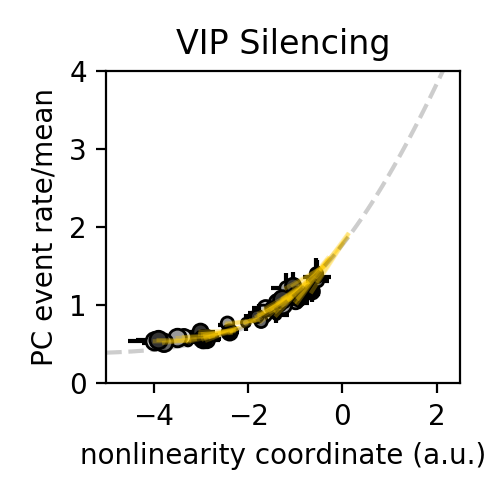

In [590]:
sigma2 = sigma2
offset = offset
amplitude = amplitude
hvals = [[hs[0],hs[0]],[hs[1],hs[1]]]

datas = [[YY_chrimson_orig,YY_chrimson_orth],[YY_halo_orig,YY_halo_orth]]
files = ['figures/vip_chrimson_effect_from_nonlinearity_one_plot.jpg','figures/vip_halo_effect_from_nonlinearity_one_plot.jpg']
xbds = np.array((-5,2.5))
# colors = ['k','k']
colors = [np.array((1,0,0)),np.array((1,0.8,0))]
alphas = [0.2,0.3]
titles = ['VIP Activation','VIP Silencing']
deviation = [None,None]
for idata in range(2):
    deviation[idata] = [None,None]
    plt.figure(figsize=(2.5,2.5))
    iangle = 0
    for data,h in zip(datas[idata],hvals[idata]):
        this_data = data.copy()
        this_data[:,:,0] = np.nanmean(this_data[:,:,0],1)[:,np.newaxis]
        xval = invert_f_mt(this_data[:,:,:,0],sigma2=sigma2,offset=offset,amplitude=amplitude)
        plt.ylabel('PC event rate/mean')
        sca.scatter_size_contrast_errorbar(xval+h,this_data[:,:,:,1],equality_line=False,equate_0=True,colormap=plt.cm.gray_r)
#         plt.title('light on')
        mean_data = np.nanmean(this_data,0).reshape((-1,2))
        xflat = np.nanmean(xval,0).flatten()[:,np.newaxis]
        mean_xval = np.concatenate((xflat,xflat+h*np.ones_like(xflat)),axis=1)
        deviation[idata][iangle] = mean_data - f_mt(mean_xval,sigma2=sigma2,offset=offset,amplitude=amplitude)
#         mean_xval[0::6] = np.mean(mean_xval[0::6],0)
#         this_mean_data
        for iline in range(mean_data.shape[0]):
            plt.plot(mean_xval[iline,:],mean_data[iline,:],c=colors[idata],alpha=alphas[idata],zorder=1)
#         plt.title('difference')
        xplot = np.linspace(*xbds,100)
        plt.plot(xplot,f_mt(xplot,sigma2=sigma2,offset=offset,amplitude=amplitude),c='k',linestyle='dashed',alpha=0.1)
        plt.xlim(xbds)
        plt.ylim((0,4))
        plt.xlabel('nonlinearity coordinate (a.u.)')
        plt.title(titles[idata])
        iangle = iangle+1
    plt.tight_layout()
    plt.savefig(files[idata],dpi=300)

<IPython.core.display.Javascript object>


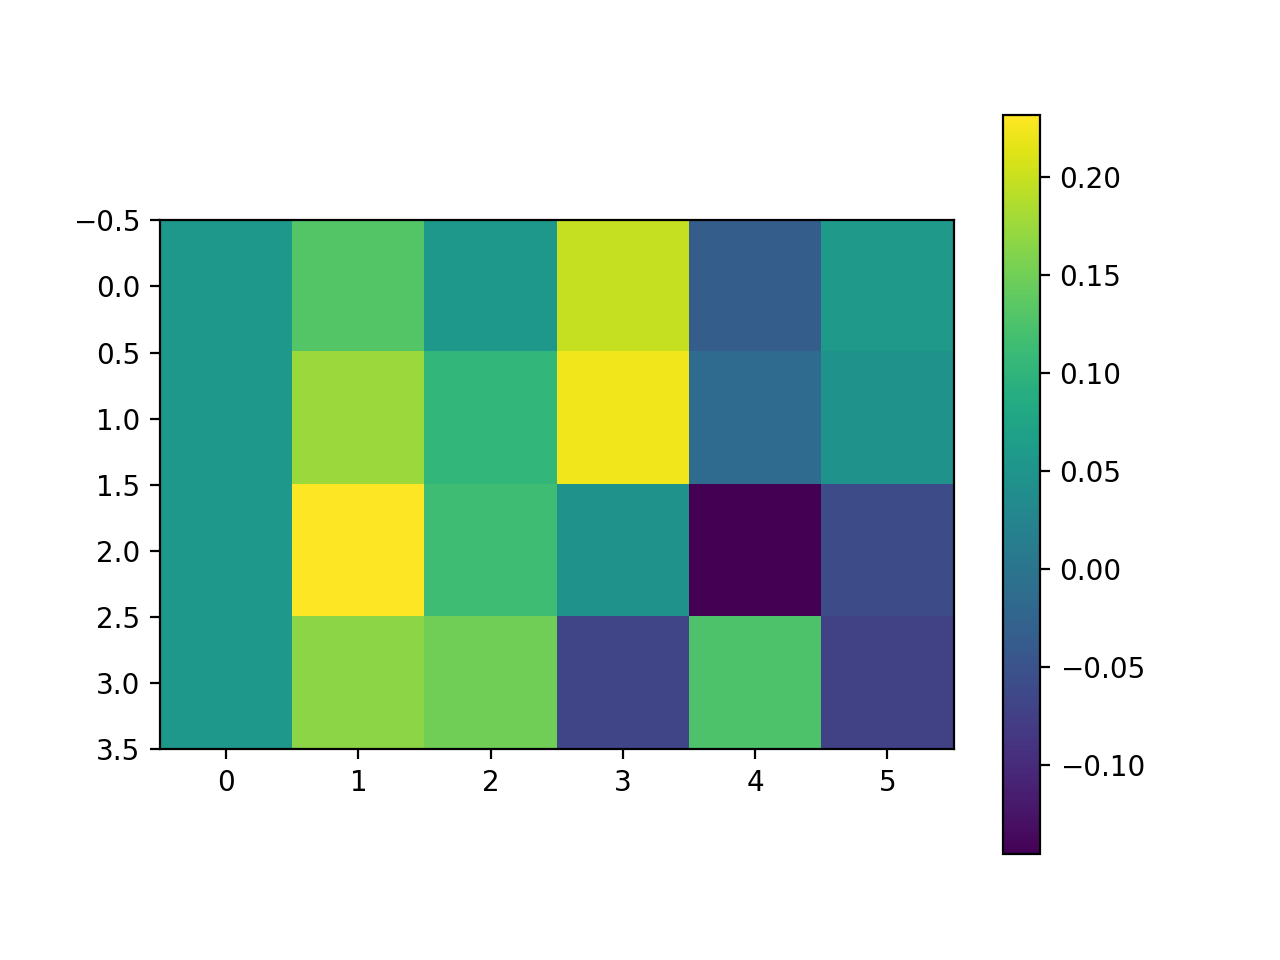

In [504]:
plt.figure()
plt.imshow(deviation[0][0][:,1].reshape((4,6)))
plt.colorbar()

In [489]:
offset

0.3770701959818846

In [432]:
cc

(24, 2)

<IPython.core.display.Javascript object>


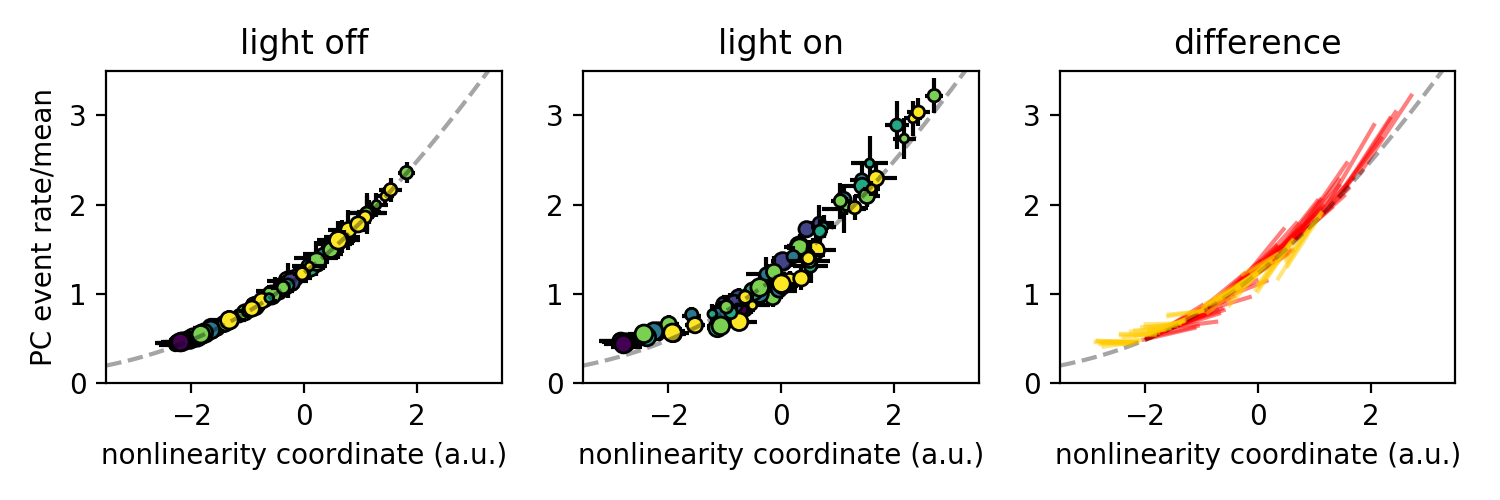

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


In [369]:
sigma2 = sigma2star
offset = 0

datas = [[YY_chrimson_orig,YY_chrimson_orth],[YY_halo_orig,YY_halo_orth]]
files = ['figures/vip_chrimson_effect_from_nonlinearity.jpg','figures/vip_halo_effect_from_nonlinearity.jpg']
hs = [[0.9,0.9],[-0.6,-0.6]]
colors = [np.array((1,0,0)),np.array((1,0.8,0))]
xbds = np.array((-3.5,3.5))
plt.figure(figsize=(7.5,2.5))
predicted = [None for idata in range(2)]
for idata in range(2):
    predicted[idata] = [None for iangle in range(2)]
    for ipanel in range(3):
        plt.subplot(1,3,ipanel+1)
        for data,h,iangle in zip(datas[idata],hs[idata],np.arange(2)):
            xval = invert_f_mt(data[:,:,:,0],sigma2=sigma2,offset=offset)
            if ipanel==0:
                sca.scatter_size_contrast_errorbar(xval,data[:,:,:,0],equality_line=False)
                plt.ylabel('PC event rate/mean')
                plt.title('light off')
            if ipanel==1:
                sca.scatter_size_contrast_errorbar(xval+h,data[:,:,:,1],equality_line=False)
                plt.title('light on')
            if ipanel==2:
                mean_data = np.nanmean(data,0).reshape((-1,2))
                xflat = np.nanmean(xval,0).flatten()[:,np.newaxis]
                mean_xval = np.concatenate((xflat,xflat+h*np.ones_like(xflat)),axis=1)
                predicted[idata][iangle] = f_mt(mean_xval,sigma2=sigma2,offset=offset)
                for iline in range(mean_data.shape[0]):
                    plt.plot(mean_xval[iline,:],mean_data[iline,:],c=colors[idata],alpha=0.5)
                plt.title('difference')
            xplot = np.linspace(*xbds,100)
            plt.plot(xplot,f_mt(xplot,sigma2=sigma2,offset=offset),c='k',linestyle='dashed',alpha=0.1)
            plt.xlim(xbds)
            plt.ylim((0,3.5))
            plt.xlabel('nonlinearity coordinate (a.u.)')
    plt.tight_layout()
#     plt.savefig(files[idata],dpi=300)

<IPython.core.display.Javascript object>


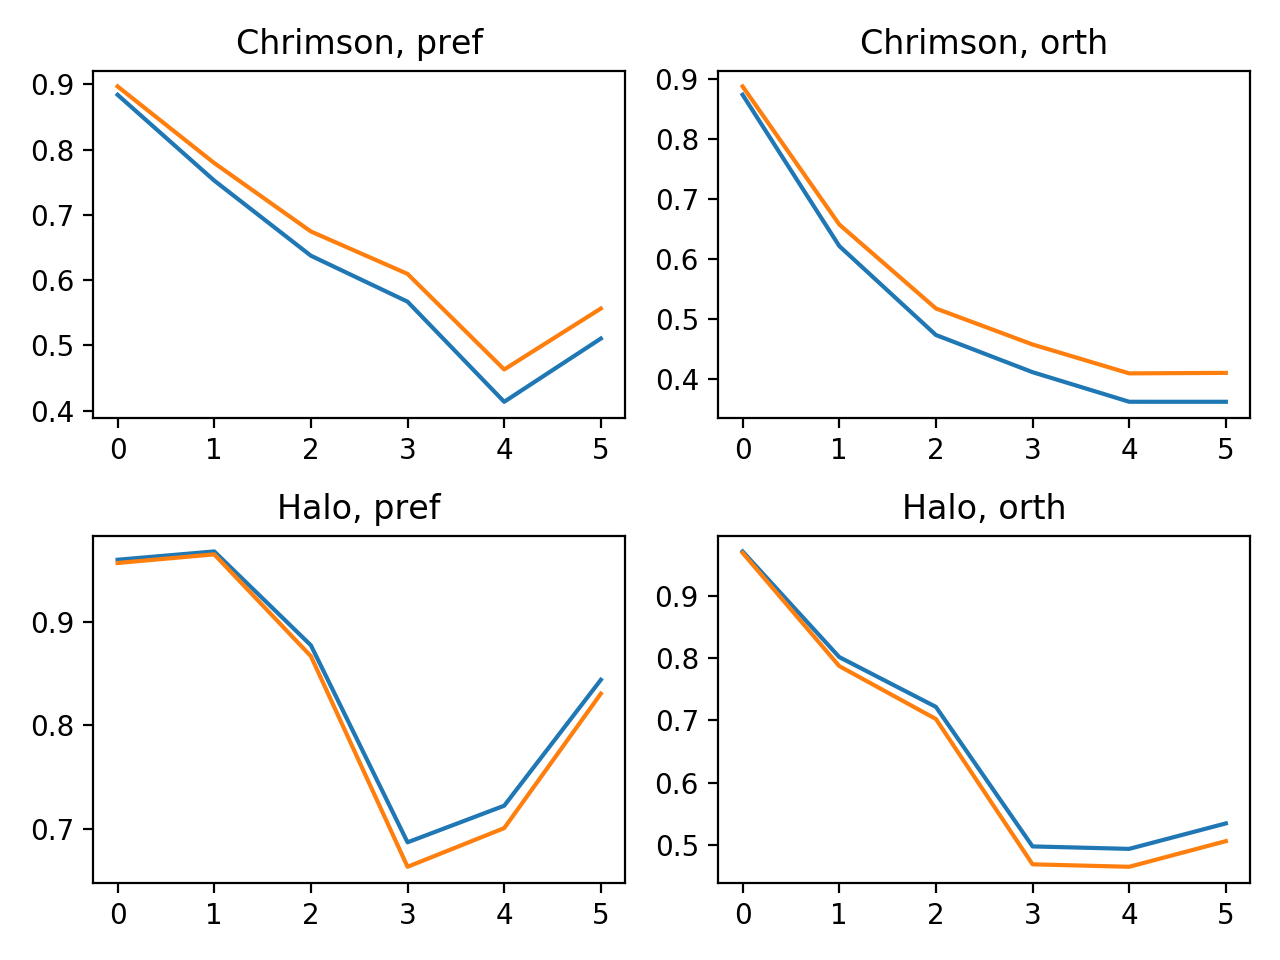

In [345]:
lbls = ['Chrimson','Halo']
angles = ['pref','orth']
plt.figure()
for idata in range(2):
    for iangle in range(2):
        plt.subplot(2,2,2*idata+iangle+1)
        data = predicted[idata][iangle].reshape((4,6,2))
        smi = data[-1]/np.max(data,0)
        plt.plot(smi)
        plt.title('%s, %s'%(lbls[idata],angles[iangle]))
plt.tight_layout()

In [335]:
predicted[0][0]

array([[0.6009089 , 0.9218574 ],
       [0.82936075, 1.2244867 ],
       [1.05322095, 1.51014734],
       [1.16696055, 1.6519856 ],
       [1.36809936, 1.8982485 ],
       [1.61994372, 2.19957394],
       [0.49412063, 0.77539183],
       [0.74866994, 1.11905135],
       [0.92557116, 1.3484065 ],
       [1.13547706, 1.61292445],
       [1.31468876, 1.83338159],
       [1.45120201, 1.99847742],
       [0.58920657, 0.90598352],
       [0.56414854, 0.87185315],
       [0.68465213, 1.03431741],
       [0.6545016 , 0.9940493 ],
       [0.78370062, 1.16500341],
       [0.8987861 , 1.31409135],
       [0.52461698, 0.81760308],
       [0.51507259, 0.80442714],
       [0.49794243, 0.78069969],
       [0.47942279, 0.75492942],
       [0.49461454, 0.77607809],
       [0.58561038, 0.90109715]])

<IPython.core.display.Javascript object>


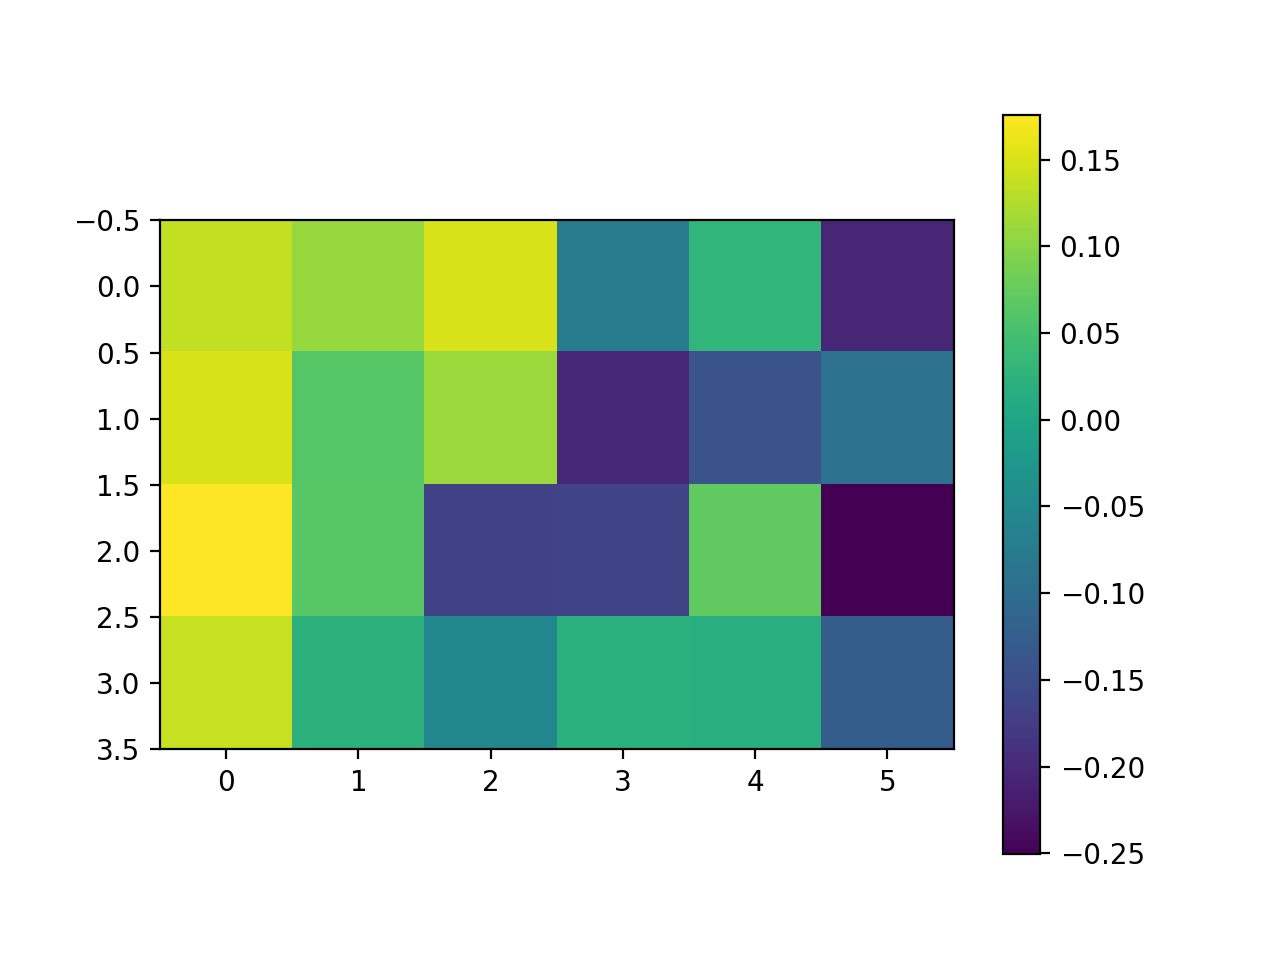

In [318]:
plt.figure()
plt.imshow(to_examine[:,1].reshape((4,6)))
plt.colorbar()

<IPython.core.display.Javascript object>


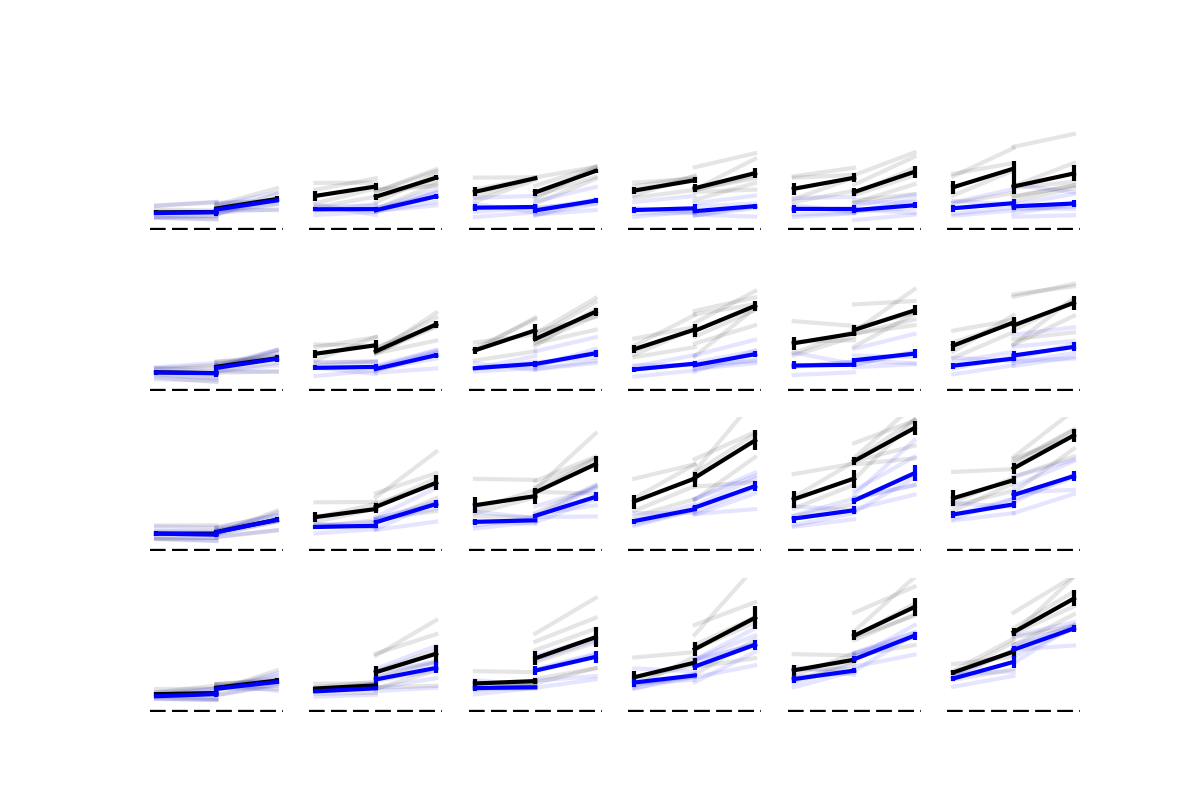

/opt/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [310]:
alpha = 0.1
nsize,ncontrast = YY_chrimson_orig.shape[1:3]
plt.figure(figsize=(ncontrast,nsize))
for i in range(nsize):
    for j in range(ncontrast):
        plt.subplot(nsize,ncontrast,ncontrast*(nsize-1-i)+j+1)
        data = YY_chrimson_orig[:,i,j]
        plot_bars_and_lines((0,1),data,alpha=alpha)
        data = YY_halo_orig[:,i,j]
        plot_bars_and_lines((0,-1),data,alpha=alpha)
        plt.axis('off')
        plt.ylim((0,3.5))
        plt.axhline(0,linestyle='dashed',c='k')
        
for i in range(nsize):
    for j in range(ncontrast):
        plt.subplot(nsize,ncontrast,ncontrast*(nsize-1-i)+j+1)
        data = YY_chrimson_orth[:,i,j]
        plot_bars_and_lines((0,1),data,alpha=alpha,c='b')
        data = YY_halo_orth[:,i,j]
        plot_bars_and_lines((0,-1),data,alpha=alpha,c='b')
        plt.axis('off')
        plt.ylim((0,3.5))
        plt.axhline(0,linestyle='dashed',c='k')
        
plt.savefig('figures/vip_bidi_master_plot_with_orth.jpg',dpi=300)

<IPython.core.display.Javascript object>


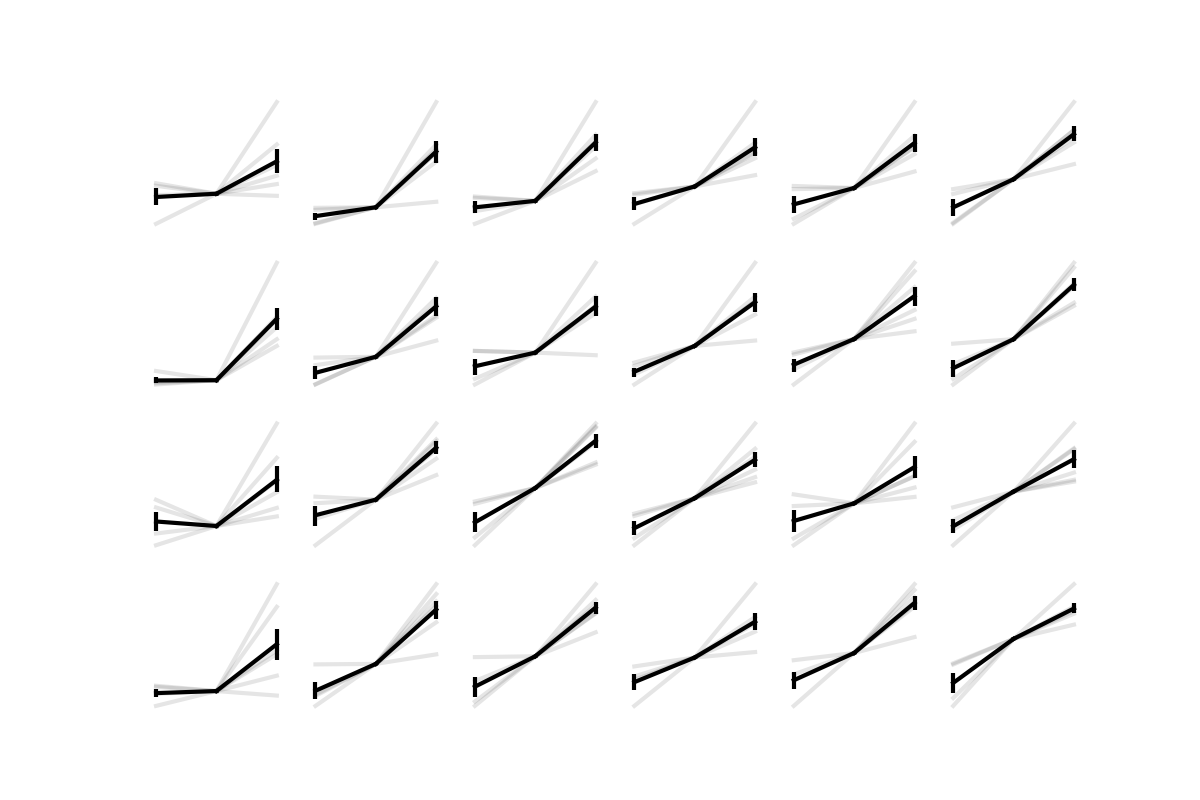

In [217]:
alpha = 0.1
plt.figure(figsize=(ncontrast,nsize))
for i in range(nsize):
    for j in range(ncontrast):
        plt.subplot(nsize,ncontrast,ncontrast*i+j+1)
        data = YY_chrimson_orig[:,i,j] - YY_chrimson_orig[:,i,j,0:1]
        plot_bars_and_lines((0,1),data,alpha=alpha)
        data = YY_halo_orig[:,i,j] - YY_halo_orig[:,i,j,0:1]
        plot_bars_and_lines((0,-1),data,alpha=alpha)
        plt.axis('off')

<IPython.core.display.Javascript object>


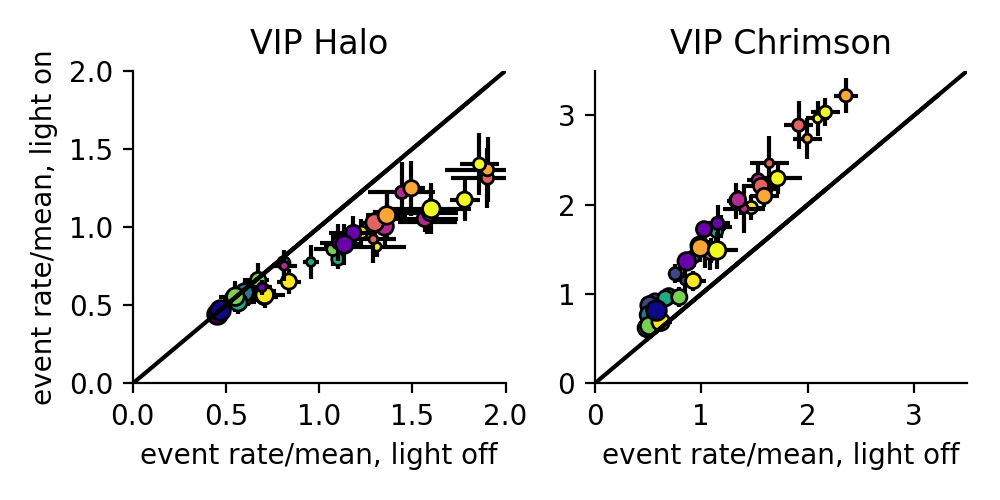

In [85]:
plt.figure(figsize=(5,2.5))
plt.subplot(1,2,1)
data = YY_halo_orth#np.nanmean(YY_halo_orth,0)
sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1],equate_0=True)
data = YY_halo_orig#np.nanmean(0)
sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1],equate_0=True,colormap=plt.cm.plasma)
ut.erase_top_right()
plt.xlabel('event rate/mean, light off')
plt.ylabel('event rate/mean, light on')
plt.title('VIP Halo')
lim = (0,2)
plt.plot(lim,lim,c='k')
plt.xlim(lim)
plt.ylim(lim)
plt.subplot(1,2,2)
data = YY_chrimson_orth#np.nanmean(,0)
sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1],equate_0=True)
data = YY_chrimson_orig#np.nanmean(,0)
sca.scatter_size_contrast_errorbar(data[:,:,:,0],data[:,:,:,1],equate_0=True,colormap=plt.cm.plasma)
ut.erase_top_right()
plt.xlabel('event rate/mean, light off')
plt.title('VIP Chrimson')
lim = (0,3.5)
plt.plot(lim,lim,c='k')
plt.xlim(lim)
plt.ylim(lim)
plt.tight_layout()
# plt.savefig('figures/vip_opto_angle_light_on_light_off_scatter_errorbar.eps')

In [181]:
data.shape

(6, 2)

In [139]:
import scipy.stats as sst
slope, intercept, r_value, p_value, std_err = sst.linregress(dYY_halo[:,itype].flatten(),dYY_chrimson[:,itype].flatten())

In [140]:
slope = (np.linalg.pinv(dYY_halo[:,itype:itype+1]) @ dYY_chrimson[:,itype:itype+1])[0,0]

<IPython.core.display.Javascript object>


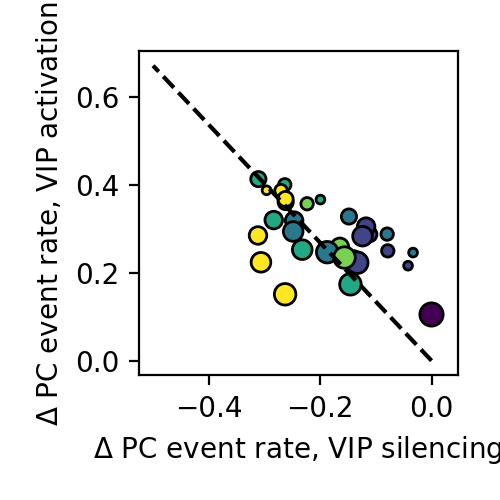

In [141]:
plt.figure(figsize=(2.5,2.5))
itype = 0
sca.scatter_size_contrast(dYY_halo[:,itype],dYY_chrimson[:,itype],nsize=6,ncontrast=6,equality_line=False,square=False,equate_0=True)
x = -np.array((0,0.5))
plt.plot(x,slope*x,c='k',linestyle='dashed')
plt.xlabel('$\Delta$ PC event rate, VIP silencing')
plt.ylabel('$\Delta$ PC event rate, VIP activation')
plt.tight_layout()

<IPython.core.display.Javascript object>


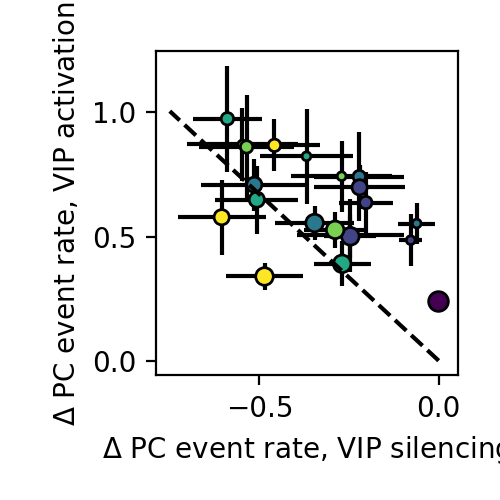

In [159]:
plt.figure(figsize=(2.5,2.5))
itype = 0
sca.scatter_size_contrast_errorbar(dYY_halo_orig,dYY_chrimson_orig,nsize=4,ncontrast=6,equality_line=False,square=False,equate_0=True)
x = -np.array((0,0.75))
plt.plot(x,slope*x,c='k',linestyle='dashed')
plt.xlabel('$\Delta$ PC event rate, VIP silencing')
plt.ylabel('$\Delta$ PC event rate, VIP activation')
plt.tight_layout()

In [162]:
data = (np.nanmean(dYY_chrimson_orig,0) - slope*np.nanmean(dYY_halo_orig,0))

In [163]:
plt.figure()
plt.plot

(6, 4, 6)

<IPython.core.display.Javascript object>


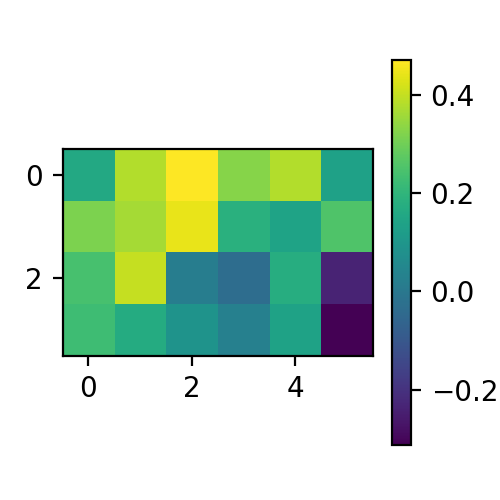

In [164]:
plt.figure(figsize=(2.5,2.5))
plt.imshow(data)
plt.colorbar()

<IPython.core.display.Javascript object>


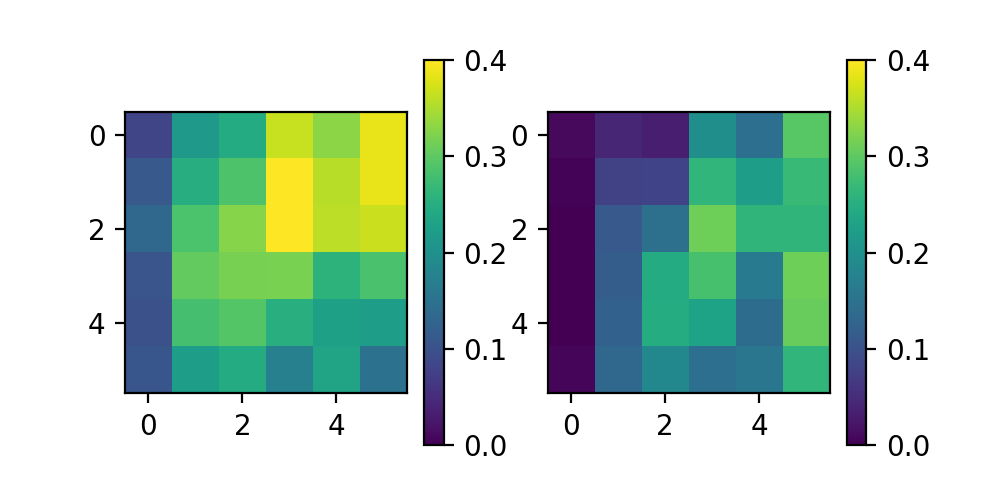

In [97]:
mn,mx = 0,0.4
plt.figure(figsize=(5,2.5))
plt.subplot(1,2,1)
plt.imshow(dYY_chrimson[:,itype].reshape((6,6)),vmin=mn,vmax=mx)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(-dYY_halo[:,itype].reshape((6,6)),vmin=mn,vmax=mx)
plt.colorbar()

<IPython.core.display.Javascript object>


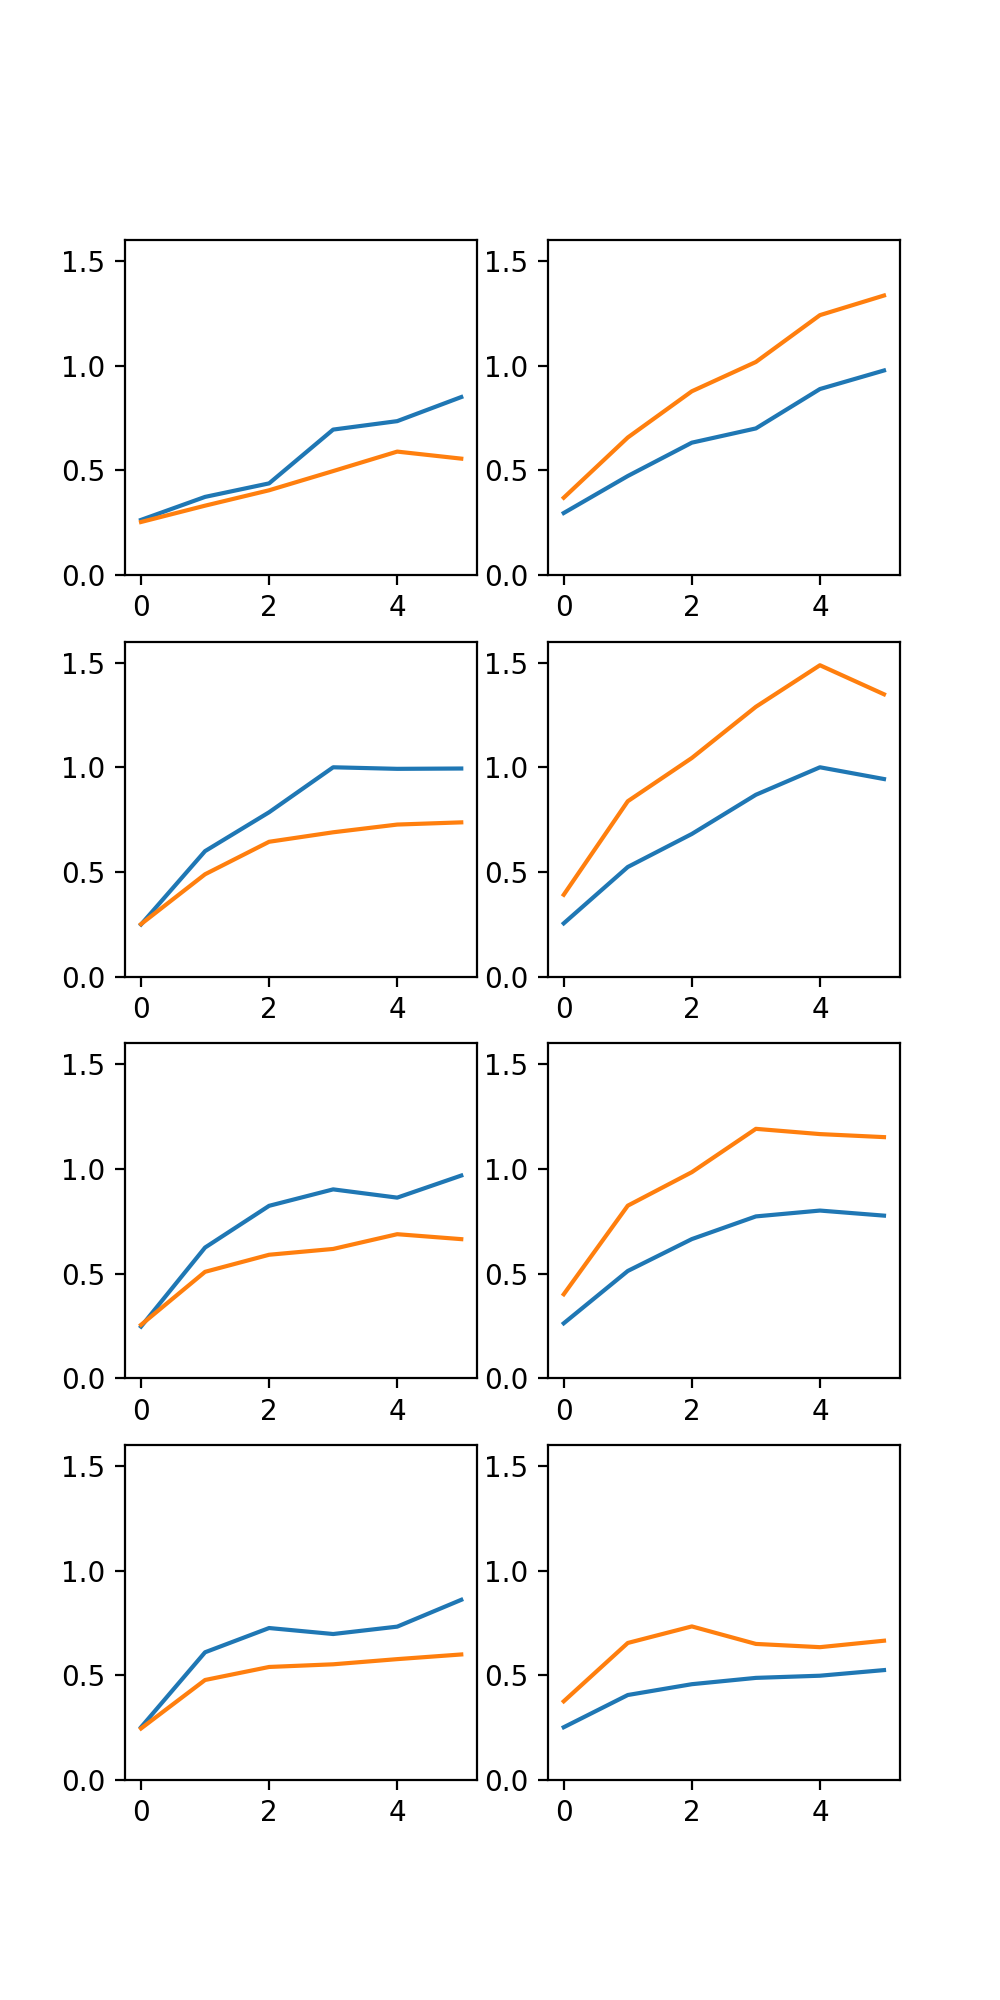

In [60]:
x = np.arange(6)
isize = 5
ylim = (0,1.6)
plt.figure(figsize=(5,10))
for iisize,isize in enumerate([0,2,3,5]):
    plt.subplot(4,2,2*iisize+1)
    plt.plot(x,Yhat_halo[0::2,0].reshape((6,6))[isize,:])
    plt.plot(x,Yhat_halo[1::2,0].reshape((6,6))[isize,:])
    plt.ylim(ylim)
    plt.subplot(4,2,2*iisize+2)
    plt.plot(x,Yhat_chrimson[0::2,0].reshape((6,6))[isize,:])
    plt.plot(x,Yhat_chrimson[1::2,0].reshape((6,6))[isize,:])
    plt.ylim(ylim)

In [ ]:
x = np.arange(6)
isize = 5
ylim = (0,1.6)
plt.figure(figsize=(5,10))
for iisize,isize in enumerate([0,2,3,5]):
    plt.subplot(4,2,2*iisize+1)
    plt.plot(x,Yhat_halo[0::2,0].reshape((6,6))[isize,:])
    plt.plot(x,Yhat_halo[1::2,0].reshape((6,6))[isize,:])
    plt.ylim(ylim)
    plt.subplot(4,2,2*iisize+2)
    plt.plot(x,Yhat_chrimson[0::2,0].reshape((6,6))[isize,:])
    plt.plot(x,Yhat_chrimson[1::2,0].reshape((6,6))[isize,:])
    plt.ylim(ylim)

<IPython.core.display.Javascript object>


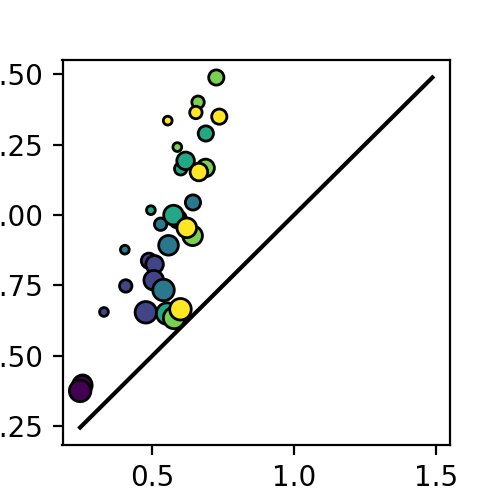

<IPython.core.display.Javascript object>


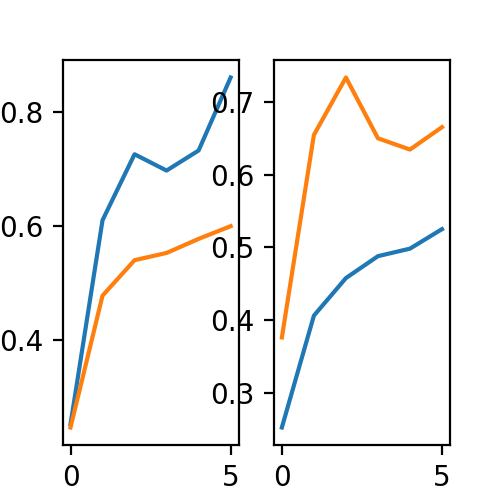

In [43]:
for itype in [0,2]:
    plt.figure(figsize=(2.5,2.5))
    sca.scatter_size_contrast(Yhat_halo[1::2,itype],Yhat_chrimson[1::2,itype],nsize=6,ncontrast=6)

<IPython.core.display.Javascript object>


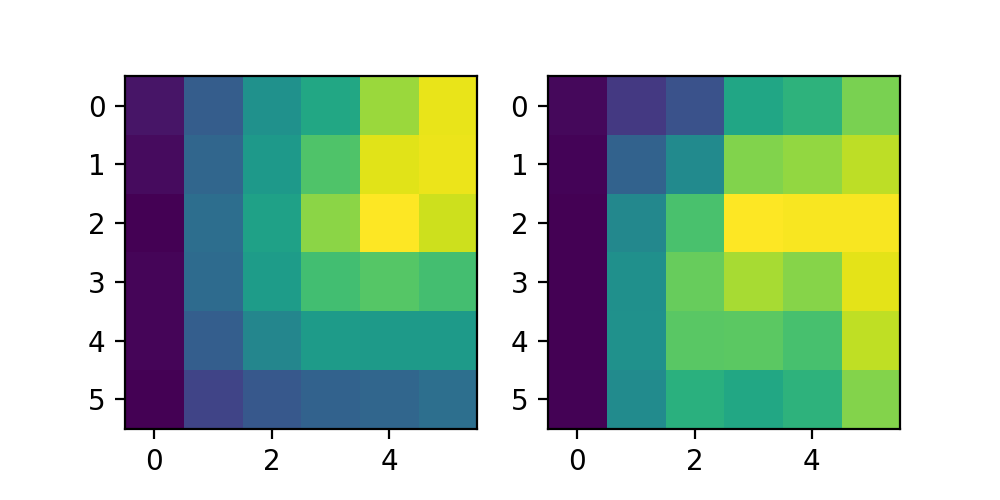

<IPython.core.display.Javascript object>


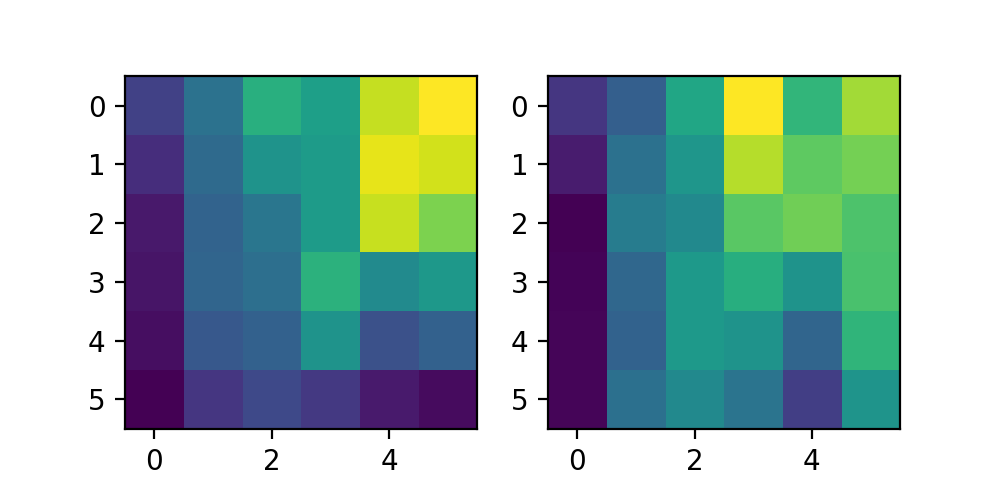

In [38]:
for itype in [0,2]:
    plt.figure(figsize=(5,2.5))
    plt.subplot(1,2,1)
    plt.imshow(Yhat_chrimson[0::2,itype].reshape((6,6)))
    plt.subplot(1,2,2)
    plt.imshow(Yhat_halo[0::2,itype].reshape((6,6)))